# Image_info.py

In [9]:
import numpy as np
import json
import os


class ImagesInfo:
    def __init__(self):
        self.__annotations_path = None
        self.__bbox_list = []
        self.__image_info = {}
        self.__pedestrian_count = None

    @staticmethod
    def filter_bboxes(coordinates, threshold_area=300):
        """This function is to discard any bounding boxes that have negative x,y coordinates and are below
        a certain area i.e., h*w"""

        x, y, w, h = coordinates
        if w * h >= threshold_area and x >= 0 and y >= 0 and x + w <= 2048 and y + h <= 1024:
            return True
        else:
            return False

    @staticmethod
    def read_annotation(filepath):
        """This is a static method to read in the annotation file"""

        with open(filepath) as jobject:
            bounding_box = json.load(jobject)
            return bounding_box

    @staticmethod
    def area_taken(coordinates):
        """this class level function calculates the area taken by a single bbox"""

        area = 0
        for coord in coordinates:
            h, w = coord[-2], coord[-1]
            a = h * w
            area += a
        return area

    def initialize(self, anno_path, bbox_parameter='bbox'):
        """This method reads in the annotation file for each image and stores the relevant information in
        the instance attribute, which can be retrieved using the method - get_image_info()"""

        self.__annotations_path = anno_path

        files = os.listdir(self.__annotations_path)

        count = []

        for file in files:
            imageinfo = {}
            filepath = os.path.join(self.__annotations_path, file)

            bounding_box = self.read_annotation(filepath)
            objects = bounding_box['objects']
            ped_coords = [obj[bbox_parameter] for obj in objects if obj['label'] != 'ignore']

            # populating the instance attribute with relevant information pertaining to each image
            n = len(ped_coords)
            count.append(n)
            imageinfo['count'] = n

            area = self.area_taken(ped_coords)
            imageinfo['area'] = area

            imageinfo['bboxes'] = ped_coords
            for ped_coord in ped_coords:
                if self.filter_bboxes(ped_coord):
                    self.__bbox_list.append(ped_coord)

            key = file.replace('_gtBboxCityPersons.json', '')
            self.__image_info[key] = imageinfo

        self.__pedestrian_count = np.array(list(count))

    def get_image_info(self):
        """This method retrieves the information pertaining to the pedestrians for each image in the dataset"""
        return self.__image_info

    def get_ped_count(self, filename=None):
        """This method return the total number of pedestrians in all images in the dataset if the filename
        parameter is not specified, if specified pedestrian count for that image will be returned"""

        count_list = {file: count['count'] for file, count in self.__image_info.items()}

        if filename is None:
            return count_list
        else:
            return count_list[filename]

    def get_area(self, filename=None, threshold=0):
        """This method returns a dictionary containing file name and the area taken by all pedestrian in that image."""

        area_list = {file: info['area'] for file, info in self.__image_info.items()}
        if filename is None:
            return area_list
        else:
            return area_list[filename]

    def get_bbox(self, filename=None):
        """This method returns a dictionary with filename and the bounding box information for the entire dataset
        if filename parameter is not specified. If specified returns a list of all coordinates for that particular image."""

        bbox_list = {file: count['bboxes'] for file, count in self.__image_info.items()}
        if filename is None:
            return bbox_list
        else:
            key = filename.replace('_leftImg8bit.png', '')
            return bbox_list[key]

    def max_count(self):
        return self.__pedestrian_count.max()

    def min_count(self):
        return self.__pedestrian_count.min()

    def total_count(self):
        return np.sum(self.__pedestrian_count)

    def average(self):
        return self.__pedestrian_count.mean()

    def count_above_theta(self, theta):
        """This method is to identify images having certain number(theta parameter) of pedestrians or more in it.
        The only purpose of the method is to investigate and identify certain parameters for cropping, if required """

        filt_list = {file: count['count'] for file, count in self.__image_info.items() if count['count'] > theta}
        if len(filt_list) > 0:
            print(f'There are {len(filt_list)} images with pedestrian count more than {theta}')
        else:
            print(f'There are no images in the dataset with pedestrian count more than {theta}')
        return filt_list

    def get_bbox_list(self):
        """This method return the list that holds all the bounding boxes that satisfied the required criterion"""

        return self.__bbox_list

In [10]:

bbox_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/annotations'

image_info = ImagesInfo()

image_info.initialize(bbox_path)

    

In [77]:
def get_coordinates(coord):
        x, y, w, h = coord
        coord[2] = x + w
        coord[3] = y + h
        return coord


def check_coords(coor):
    x, y, x2, y2 = coor
    if x < 0:
        return True
    else:
        return False

In [78]:
bbox = image_info.get_bbox_list()
bbox = [get_coordinates(cd) for cd in bbox]

In [79]:
# print(bbox)
print(len(bbox))

19129


In [80]:
filt_b = [box for box in bbox if check_coords(box)]
print(filt_b)


[]


In [71]:
def get_labels(fp):
    files = os.listdir(fp)
    anns = {}
    for image in files:
        file = os.path.join(fp,image)
        with open(file) as jobject:
            bounding_box = json.load(jobject)
            bbox = bounding_box['objects']
            for ann in bbox:
                    if ann['label'] in [ 'person group']:
                        anns[image] = bbox
            
    return anns

In [72]:
bboxes = get_labels(bbox_path)
bboxes 

{'cologne_000018_000019_gtBboxCityPersons.json': [{'instanceId': 24000,
   'bbox': [1932, 394, 30, 75],
   'bboxVis': [1932, 396, 30, 37],
   'label': 'pedestrian'},
  {'instanceId': 24001,
   'bbox': [1477, 378, 71, 173],
   'bboxVis': [1490, 378, 47, 108],
   'label': 'pedestrian'},
  {'instanceId': 24002,
   'bbox': [1332, 353, 81, 196],
   'bboxVis': [1344, 353, 58, 196],
   'label': 'pedestrian'},
  {'instanceId': 24003,
   'bbox': [1368, 372, 72, 175],
   'bboxVis': [1368, 372, 72, 175],
   'label': 'pedestrian'},
  {'instanceId': 24004,
   'bbox': [1165, 390, 66, 159],
   'bboxVis': [1181, 390, 50, 159],
   'label': 'pedestrian'},
  {'instanceId': 24005,
   'bbox': [1115, 370, 84, 204],
   'bboxVis': [1115, 370, 84, 204],
   'label': 'pedestrian'},
  {'instanceId': 24006,
   'bbox': [263, 436, 49, 120],
   'bboxVis': [265, 436, 47, 120],
   'label': 'pedestrian'},
  {'instanceId': 24007,
   'bbox': [124, 430, 55, 135],
   'bboxVis': [124, 548, 13, 14],
   'label': 'pedestrian'},

In [40]:
labels

array(['pedestrian', 'rider', 'ignore', 'sitting person',
       'person (other)', 'person group'], dtype=object)

______

# Crop.py

In [1]:
from PIL import Image
import json
import numpy as np
import cv2
import os
from image_info import ImagesInfo
import random
import time

ann_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/annotations'
original_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/original images'
translated_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/translated images/winter'
ped_save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/ped_crop'
random_save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/random_crop'


class Crop(ImagesInfo):
    def __init__(self):
        super().__init__()
        self.__original_image_path = None
        self.__translated_image_path = None
        self.__original_save_path = None
        self.__translated_save_path = None
        self.__original_dimension = None
        self.__translated_dimension = None

    @staticmethod
    def __get_coordinates(coord):
        x, y, w, h = coord
        x2 = x + w
        y2 = y + h
        _coord = [x,y,x2,y2]
        return _coord

    @staticmethod
    def __compute_area(coords):
        area = 0
        for coord in coords:
            w, h = coord[-2], coord[-1]
            _area = w * h
            area += _area
        return area

    @staticmethod
    def is_intersect(random_bbox, image_bboxes):
        rx, ry, rw, rh = random_bbox

        for bbox in image_bboxes:
            x, y, w, h = bbox

            rbbox_left_x = rx
            rbbox_right_x = rx + rw
            rbbox_top_y = ry
            rbbox_bottom_y = ry + rh

            ibbox_left_x = x
            ibbox_right_x = x + w
            ibbox_top_y = y
            ibbox_bottom_y = y + h

            if not (rbbox_right_x < ibbox_left_x or
                    rbbox_left_x > ibbox_right_x or
                    rbbox_top_y > ibbox_bottom_y or
                    rbbox_bottom_y < ibbox_top_y):
                return True

        return False

    def __area_in_percentage(self, area):
        h, w = self.__original_dimension
        image_area = h * w
        percent = ((area / image_area) * 100)
        return percent

    def initialize(self, original_img_path, translated_img_path, annotations_path):
        super().initialize(annotations_path)

        images = os.listdir(original_img_path)
        image = images[0]
        image = os.path.join(original_img_path, image)
        org_pil_image = Image.open(image)
        org_img_shape = org_pil_image.size

        translated_images = os.listdir(translated_img_path)
        translated_image = translated_images[0]
        translated_image = os.path.join(translated_img_path, translated_image)
        translated_pil_image = Image.open(translated_image)
        translated_img_shape = translated_pil_image.size

        self.__original_image_path = original_img_path
        self.__translated_image_path = translated_img_path
        self.__original_dimension = org_img_shape
        self.__translated_dimension = translated_img_shape

    def get_area(self, filename=None, lower_bound=0, upper_bound=100):
        if filename is None:
            bbox_area = super().get_area()

            h, w = self.__original_dimension
            org_area = h * w
            lower_bound = ((org_area / 100) * lower_bound)
            upper_bound = ((org_area / 100) * upper_bound)

            bbox_area = {_image: _area for _image, _area in bbox_area.items() if upper_bound >= _area >= lower_bound}

            return bbox_area

        else:
            bbox_area = super().get_area()
            return bbox_area

    def __area_available(self, image):
        area_taken = image['area']
        h, w = self.__original_dimension
        org_area = h * w
        area_available = org_area - area_taken
        return area_available

    def crop(self, crop_ped_save_path, random_crop_save_path, n=10, area_threshold=40, crop_random=True):
        """The function crops patches from images that contain pedestrians and random patches
        ped_crop_save_path parameter is the save path for cropped patches containing pedestrians
        random_crop_save_path for random patches,
        n is number of random patches to be cropped from an image, and
        area_threshold parameter is a threshold value above which no patches would be cropped"""

        images = os.listdir(self.__original_image_path)  # getting all the original images
        images = [image for image in images if '.png' in image]  # ignoring any files that's not an image
        images_info = self.get_image_info()  # getting information like ped_count, bbox_area, bbox_coord for all images
        bboxes = self.get_bbox_list()  # a list containing all the bbox coordinates with pedestrian in it

        for image in images:
            image_bbox = self.get_bbox(image)  # bbox coordinate for the particular image
            image_path = os.path.join(self.__original_image_path, image)  # absolute path of the image

            image_name = image.replace('_leftImg8bit.png','')  # image name with no extension, key to the image_info dict

            # crop pedestrians:
            # -----------------
            pil_image = Image.open(image_path)

            i = 1  # for saving each crop of an image
            for bbox in image_bbox:
                if not self.filter_bboxes(bbox):
                    continue
                coordinates = self.__get_coordinates(bbox)  # converts (x,y,w,h) -> (x,y,x1,y1)
                ped_crop = pil_image.crop(coordinates)  # crop the patch containing pedestrian
                cropped_image_name = image_name + f'_{i}.png'  # adding extension to the image name to save it
                crop_path = os.path.join(crop_ped_save_path, cropped_image_name)
                ped_crop.save(crop_path)  # saving the image
                i += 1

            if crop_random:
                # crop random patches:
                # --------------------
                image_info = images_info[
                    image_name]  # grabbing the image info for the particular image from images_info dict
                area_taken = image_info['area']  # area taken by pedestrian bboxes in the image
                percentage_area = self.__area_in_percentage(
                    area_taken)  # percentage of area taken by all ped bboxes in that image
                random_bboxes = []  # a list containing random bbox cropped from an image if it has ped area< threshold
                if percentage_area <= area_threshold:  # only crop random patch if area taken by ped bbox <= a threshold percentage
                    for i in range(n):
                        intersect = True
                        while intersect:
                            random_bbox = random.choice(bboxes)
                            print(f'The image being processed is {image_name}')
                            print(f'the random bbox before checking the intersection is {random_bbox}')
                            print(f'The bbox coordinated for this image is {image_bbox}')
                            print(f'The value of intersect variable before checking for intersection is {intersect}')
                            print()
                            if self.is_intersect(random_bbox, image_bbox):
                                intersect = True
                            else:
                                random_bboxes.append(random_bbox)
                                intersect = False
                            print(f'The value of intersect variable after checking for intersection is {intersect}')
                            print()

                if random_bboxes:  # for the cases where the ped area is less than threshold and random_bboxes is not empty
                    i = 1
                    for _random_bbox in random_bboxes:
                        _random_bbox = self.__get_coordinates(_random_bbox)
                        random_crop = pil_image.crop(_random_bbox)
                        random_crop_name = image_name + f'_{i}.png'  # adding extension to the image name to save it
                        crop_path = os.path.join(random_crop_save_path, random_crop_name)
                        random_crop.save(crop_path)  # saving the image
                        i += 1

from PIL import Image
import json
import numpy as np
import cv2
import os
from image_info import ImagesInfo
import random
import time

ann_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/annotations'
original_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/original images'
translated_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/translated images/winter'
ped_save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/ped_crop'
random_save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/random_crop'


#ann_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/quantitative analysis/binary classifier/crop_patch script/test images/annotations'
#original_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/quantitative analysis/binary classifier/crop_patch script/test images/images'


class Crop(ImagesInfo):
    def __init__(self):
        super().__init__()
        self.__original_image_path = None
        self.__translated_image_path = None
        self.__original_save_path = None
        self.__translated_save_path = None
        self.__original_dimension = None
        self.__translated_dimension = None
        # self.__ped_crop_save_path = None
        # self.__random_crop_save_path = None

    @staticmethod
    def __get_coordinates(coord):
        x, y, w, h = coord
        coord[2] = x + w
        coord[3] = y + h
        return coord

    @staticmethod
    def __compute_area(coords):
        area = 0
        for coord in coords:
            w, h = coord[-2], coord[-1]
            _area = w * h
            area += _area
        return area

    @staticmethod
    def is_intersect(random_bbox, image_bboxes):
        rx, ry, rw, rh = random_bbox

        for bbox in image_bboxes:
            x, y, w, h = bbox

            rbbox_left_x = rx
            rbbox_right_x = rx + rw
            rbbox_top_y = ry
            rbbox_bottom_y = ry + rh

            ibbox_left_x = x
            ibbox_right_x = x + w
            ibbox_top_y = y
            ibbox_bottom_y = y + h

            if not (rbbox_right_x < ibbox_left_x or
                    rbbox_left_x > ibbox_right_x or
                    rbbox_top_y > ibbox_bottom_y or
                    rbbox_bottom_y < ibbox_top_y):
                return True

        return False

    def __area_in_percentage(self, area):
        h, w = self.__original_dimension
        image_area = h * w
        percent = ((area / image_area) * 100)
        return percent

    def initialize(self, original_img_path, translated_img_path, annotations_path):
        super().initialize(annotations_path)

        images = os.listdir(original_img_path)
        image = images[0]
        image = os.path.join(original_img_path, image)
        org_pil_image = Image.open(image)
        org_img_shape = org_pil_image.size

        translated_images = os.listdir(translated_img_path)
        translated_image = translated_images[0]
        translated_image = os.path.join(translated_img_path, translated_image)
        translated_pil_image = Image.open(translated_image)
        translated_img_shape = translated_pil_image.size

        self.__original_image_path = original_img_path
        self.__translated_image_path = translated_img_path
        self.__original_dimension = org_img_shape
        self.__translated_dimension = translated_img_shape

    def get_area(self, filename=None, lower_bound=0, upper_bound=100):
        if filename is None:
            bbox_area = super().get_area()

            h, w = self.__original_dimension
            org_area = h * w
            lower_bound = ((org_area / 100) * lower_bound)
            upper_bound = ((org_area / 100) * upper_bound)

            bbox_area = {_image: _area for _image, _area in bbox_area.items() if upper_bound >= _area >= lower_bound}

            return bbox_area

        else:
            bbox_area = super().get_area()
            return bbox_area

    def __area_available(self, image):
        area_taken = image['area']
        h, w = self.__original_dimension
        org_area = h * w
        area_available = org_area - area_taken
        return area_available

    def crop(self, crop_ped_save_path, random_crop_save_path, n=10, area_threshold=40, crop_random=True):
        """The function crops patches from images that contain pedestrians and random patches
        ped_crop_save_path parameter is the save path for cropped patches containing pedestrians
        random_crop_save_path for random patches,
        n is number of random patches to be cropped from an image, and
        area_threshold parameter is a threshold value above which no patches would be cropped"""

        images = os.listdir(self.__original_image_path)  # getting all the original images
        images = [image for image in images if '.png' in image]  # ignoring any files that's not an image
        images_info = self.get_image_info()  # getting information like ped_count, bbox_area, bbox_coord for all images
        bboxes = self.get_bbox_list()  # a list containing all the bbox coordinates with pedestrian in it

        for image in images:
            image_bbox = self.get_bbox(image)  # bbox coordinate for the particular image
            image_path = os.path.join(self.__original_image_path, image)  # absolute path of the image

            image_name = image.replace('_leftImg8bit.png',
                                       '')  # image name with no extension, key to the image_info dict

            # crop pedestrians:
            # -----------------
            pil_image = Image.open(image_path)

            i = 1  # for saving each crop of an image
            for bbox in image_bbox:
                if not self.filter_bboxes(bbox):
                    continue
                coordinates = self.__get_coordinates(bbox)  # converts (x,y,w,h) -> (x,y,x1,y1)
                ped_crop = pil_image.crop(coordinates)  # crop the patch containing pedestrian
                cropped_image_name = image_name + f'_{i}.png'  # adding extension to the image name to save it
                crop_path = os.path.join(crop_ped_save_path, cropped_image_name)
                ped_crop.save(crop_path)  # saving the image
                i += 1

            time_keep = 0
            if crop_random:
                # crop random patches:
                # --------------------
                image_info = images_info[
                    image_name]  # grabbing the image info for the particular image from images_info dict
                area_taken = image_info['area']  # area taken by pedestrian bboxes in the image
                percentage_area = self.__area_in_percentage(
                    area_taken)  # percentage of area taken by all ped bboxes in that image
                random_bboxes = []  # a list containing random bbox cropped from an image if it has ped area< threshold
                if percentage_area <= area_threshold:  # only crop random patch if area taken by ped bbox <= a threshold percentage
                    for i in range(n):
                        intersect = True
                        while intersect:
                            random_bbox = random.choice(bboxes)
                            print(f'The image being processed is {image_name}')
                            print(f'the random bbox before checking the intersection is {random_bbox}')
                            print(f'The bbox coordinated for this image is {image_bbox}')
                            print(f'The value of intersect variable before checking for intersection is {intersect}')
                            print()
                            if self.is_intersect(random_bbox, image_bbox):
                                intersect = True
                            else:
                                random_bboxes.append(random_bbox)
                                intersect = False
                            print(f'The value of intersect variable after checking for intersection is {intersect}')
                            print()

                if random_bboxes:  # for the cases where the ped area is less than threshold and random_bboxes is not empty
                    i = 1
                    for _random_bbox in random_bboxes:
                        _random_bbox = self.__get_coordinates(_random_bbox)
                        random_crop = pil_image.crop(_random_bbox)
                        random_crop_name = image_name + f'_{i}.png'  # adding extension to the image name to save it
                        crop_path = os.path.join(random_crop_save_path, random_crop_name)
                        random_crop.save(crop_path)  # saving the image
                        i += 1
                time_keep += 1
                if time_keep == 40:
                    time.sleep(180)
                    time_keep = 0


if __name__ == '__main__':
    crop = Crop()
    crop.initialize(original_path, translated_path, ann_path)
    crop.crop(ped_save_path, random_save_path)


In [101]:
if __name__ == '__main__':
    crop = Crop()
    crop.initialize(original_path, translated_path, ann_path)
    crop.crop(ped_save_path, random_save_path)

The image being processed is bremen_000256_000019
the random bbox before checking the intersection is [1178, 394, 31, 75]
The bbox coordinated for this image is [[1067, 405, 10, 25], [1129, 407, 26, 62], [1124, 408, 25, 62], [1310, 366, 72, 175], [1360, 380, 66, 160], [1432, 382, 63, 154], [1557, 432, 34, 83], [1524, 357, 63, 154], [1514, 369, 69, 169], [1581, 369, 69, 168], [1621, 355, 71, 173], [164, 436, 32, 78], [1186, 419, 36, 71]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is bremen_000256_000019
the random bbox before checking the intersection is [622, 373, 35, 86]
The bbox coordinated for this image is [[1067, 405, 10, 25], [1129, 407, 26, 62], [1124, 408, 25, 62], [1310, 366, 72, 175], [1360, 380, 66, 160], [1432, 382, 63, 154], [1557, 432, 34, 83], [1524, 357, 63, 154], [1514, 369, 69, 169], [1581, 369, 69, 168], [1621, 355, 71, 173], [164, 436, 32

The image being processed is darmstadt_000022_000019
the random bbox before checking the intersection is [415, 441, 17, 18]
The bbox coordinated for this image is [[844, 356, 48, 117], [1914, 364, 44, 109], [1696, 414, 14, 34], [1110, 303, 133, 326], [2017, 381, 26, 89], [1967, 369, 43, 103], [844, 316, 142, 347]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is darmstadt_000022_000019
the random bbox before checking the intersection is [975, 441, 12, 31]
The bbox coordinated for this image is [[844, 356, 48, 117], [1914, 364, 44, 109], [1696, 414, 14, 34], [1110, 303, 133, 326], [2017, 381, 26, 89], [1967, 369, 43, 103], [844, 316, 142, 347]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is darmstadt_000022_000019
the random bbox befo

The image being processed is hamburg_000000_061790
the random bbox before checking the intersection is [1964, 373, 44, 107]
The bbox coordinated for this image is [[1191, 369, 19, 45], [1207, 370, 17, 43], [1225, 372, 19, 46], [1219, 367, 22, 53], [1242, 364, 22, 55], [1314, 361, 22, 53], [1301, 358, 24, 57], [1297, 369, 24, 59], [1284, 356, 34, 83], [1320, 353, 32, 78], [1329, 347, 36, 90], [1414, 358, 26, 62], [1621, 334, 30, 73], [1458, 339, 46, 114], [1425, 342, 51, 123], [1480, 350, 45, 111], [1564, 333, 47, 114], [1540, 341, 45, 110], [1786, 394, 16, 35], [1733, 315, 66, 160], [1682, 316, 66, 160], [1801, 405, 12, 14], [1806, 317, 67, 163], [1863, 295, 72, 176], [449, 404, 10, 26], [576, 397, 16, 39], [1163, 375, 17, 31], [1191, 381, 4, 20], [1198, 414, 2, 2], [1220, 377, 5, 2], [1221, 413, 4, 1], [1240, 375, 7, 16], [1260, 376, 11, 15], [1279, 358, 16, 58], [1279, 418, 15, 14], [1374, 352, 46, 39], [1513, 345, 29, 47]]
The value of intersect variable before checking for intersec

The image being processed is hamburg_000000_105123
the random bbox before checking the intersection is [1328, 373, 27, 64]
The bbox coordinated for this image is [[189, 329, 28, 45], [1131, 343, 18, 45], [1455, 326, 23, 23], [1490, 332, 34, 34], [1508, 336, 11, 18], [1519, 325, 20, 36], [1379, 306, 37, 88], [1438, 333, 21, 40], [1413, 331, 53, 81], [1452, 335, 46, 53], [1527, 343, 33, 34], [1586, 332, 34, 25], [1503, 340, 60, 89], [1553, 340, 44, 87], [1693, 335, 27, 18], [1683, 332, 11, 21], [1618, 339, 52, 89], [1657, 335, 48, 62], [1716, 347, 44, 23], [1717, 338, 39, 64], [1802, 328, 31, 53], [1826, 329, 39, 52], [1832, 341, 32, 88], [1851, 339, 47, 48], [2008, 347, 26, 32], [317, 368, 13, 20], [1276, 309, 56, 138], [-21, 326, 60, 146], [103, 343, 10, 23], [87, 343, 25, 53], [61, 343, 43, 52], [155, 305, 32, 79], [272, 378, 59, 70], [151, 347, 20, 64], [246, 303, 41, 100], [269, 335, 22, 20], [250, 336, 22, 32], [225, 338, 34, 46], [208, 349, 21, 19], [-9, 303, 85, 208], [154, 352, 

The image being processed is hamburg_000000_073758
the random bbox before checking the intersection is [1133, 427, 22, 54]
The bbox coordinated for this image is [[1109, 108, 20, 50], [1040, 124, 21, 52], [797, 248, 22, 54], [1048, 132, 17, 43], [816, 242, 25, 60], [967, 177, 19, 47], [981, 182, 18, 43], [911, 189, 19, 46], [926, 193, 18, 44], [521, 381, 34, 82], [662, 354, 65, 160], [552, 387, 32, 78], [807, 364, 59, 145], [962, 369, 36, 89], [770, 357, 61, 147], [782, 360, 64, 158], [845, 357, 67, 161], [809, 353, 70, 172], [856, 348, 70, 171], [931, 373, 59, 144], [904, 349, 72, 177], [982, 357, 63, 155], [718, 364, 64, 156], [1073, 334, 80, 194], [214, 376, 31, 75]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_073758
the random bbox before checking the intersection is [1480, 353, 17, 41]
The bbox coordinated for this image is [[1109, 108,

The image being processed is bremen_000297_000019
the random bbox before checking the intersection is [566, 420, 27, 65]
The bbox coordinated for this image is [[1448, 385, 25, 61]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000297_000019
the random bbox before checking the intersection is [826, 402, 33, 80]
The bbox coordinated for this image is [[1448, 385, 25, 61]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000297_000019
the random bbox before checking the intersection is [1183, 436, 11, 28]
The bbox coordinated for this image is [[1448, 385, 25, 61]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image

The image being processed is bremen_000102_000019
the random bbox before checking the intersection is [1320, 389, 26, 63]
The bbox coordinated for this image is [[1339, 413, 38, 92], [1305, 413, 40, 97], [1275, 417, 34, 83], [1282, 412, 48, 115], [1432, 416, 39, 98], [1449, 411, 43, 106], [1543, 398, 93, 228], [1017, 424, 21, 53], [779, 436, 43, 56], [743, 408, 33, 79], [706, 395, 47, 115], [525, 424, 23, 29], [509, 420, 24, 45], [551, 427, 62, 84], [348, 411, 62, 125], [324, 410, 64, 126], [-6, 322, 126, 307], [192, 337, 110, 267], [227, 287, 133, 326], [1310, 393, 68, 166], [1114, 388, 54, 130], [1176, 335, 109, 268], [959, 422, 17, 42], [624, 359, 83, 203]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is bremen_000102_000019
the random bbox before checking the intersection is [1757, 453, 40, 98]
The bbox coordinated for this image is [[1339, 413, 38, 92], [

The image being processed is strasbourg_000001_031582
the random bbox before checking the intersection is [1054, 383, 12, 31]
The bbox coordinated for this image is [[767, 418, 38, 30], [971, 393, 5, 13]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_031582
the random bbox before checking the intersection is [1796, 391, 46, 113]
The bbox coordinated for this image is [[767, 418, 38, 30], [971, 393, 5, 13]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_031582
the random bbox before checking the intersection is [925, 385, 13, 32]
The bbox coordinated for this image is [[767, 418, 38, 30], [971, 393, 5, 13]]
The value of intersect variable before checking for intersection is True

The value of in

The image being processed is hanover_000000_041232
the random bbox before checking the intersection is [48, 436, 25, 61]
The bbox coordinated for this image is [[1744, 303, 118, 288], [1453, 326, 71, 173]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_041232
the random bbox before checking the intersection is [1211, 246, 20, 48]
The bbox coordinated for this image is [[1744, 303, 118, 288], [1453, 326, 71, 173]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_041232
the random bbox before checking the intersection is [1487, 355, 41, 100]
The bbox coordinated for this image is [[1744, 303, 118, 288], [1453, 326, 71, 173]]
The value of intersect variable before checking for intersection is True

The val

The image being processed is dusseldorf_000174_000019
the random bbox before checking the intersection is [1170, 430, 20, 48]
The bbox coordinated for this image is [[878, 426, 25, 62]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000174_000019
the random bbox before checking the intersection is [1644, 360, 58, 140]
The bbox coordinated for this image is [[878, 426, 25, 62]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000174_000019
the random bbox before checking the intersection is [920, 390, 12, 29]
The bbox coordinated for this image is [[878, 426, 25, 62]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_020033
the random bbox before checking the intersection is [517, 398, 24, 59]
The bbox coordinated for this image is [[1211, 370, 34, 83], [1060, 417, 9, 9], [1034, 387, 21, 52], [1073, 387, 21, 52], [1101, 398, 17, 41], [1345, 345, 67, 164], [392, 368, 44, 109], [6, 379, 90, 42], [481, 379, 42, 19]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is krefeld_000000_020033
the random bbox before checking the intersection is [1448, 385, 25, 61]
The bbox coordinated for this image is [[1211, 370, 34, 83], [1060, 417, 9, 9], [1034, 387, 21, 52], [1073, 387, 21, 52], [1101, 398, 17, 41], [1345, 345, 67, 164], [392, 368, 44, 109], [6, 379, 90, 42], [481, 379, 42, 19]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image be

The image being processed is tubingen_000074_000019
the random bbox before checking the intersection is [603, 352, 62, 151]
The bbox coordinated for this image is [[1602, 443, 10, 26], [1673, 420, 34, 85], [1699, 411, 40, 98], [1631, 434, 15, 38], [1009, 411, 37, 92]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000074_000019
the random bbox before checking the intersection is [1153, 414, 32, 78]
The bbox coordinated for this image is [[1602, 443, 10, 26], [1673, 420, 34, 85], [1699, 411, 40, 98], [1631, 434, 15, 38], [1009, 411, 37, 92]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000074_000019
the random bbox before checking the intersection is [1097, 364, 73, 176]
The bbox coordinated for this image is [[

The image being processed is zurich_000069_000019
the random bbox before checking the intersection is [1082, 400, 25, 38]
The bbox coordinated for this image is [[1471, 387, 20, 29], [1436, 391, 24, 34], [1383, 393, 54, 52], [1573, 351, 58, 139], [1481, 376, 41, 99], [1630, 321, 105, 258], [1637, 287, 132, 320], [1909, 316, 117, 286], [1213, 355, 73, 177]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000069_000019
the random bbox before checking the intersection is [1170, 413, 14, 32]
The bbox coordinated for this image is [[1471, 387, 20, 29], [1436, 391, 24, 34], [1383, 393, 54, 52], [1573, 351, 58, 139], [1481, 376, 41, 99], [1630, 321, 105, 258], [1637, 287, 132, 320], [1909, 316, 117, 286], [1213, 355, 73, 177]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersect

The image being processed is strasbourg_000001_039446
the random bbox before checking the intersection is [1301, 340, 64, 158]
The bbox coordinated for this image is [[1652, 388, 31, 75], [1616, 387, 29, 72], [1433, 354, 53, 129], [1415, 348, 62, 152], [1240, 397, 21, 53], [1228, 396, 22, 55], [149, 368, 56, 135], [965, 381, 53, 129], [945, 375, 55, 136], [628, 351, 74, 181], [529, 329, 88, 215], [71, 338, 58, 142], [6, 371, 14, 70]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_039446
the random bbox before checking the intersection is [977, 370, 23, 56]
The bbox coordinated for this image is [[1652, 388, 31, 75], [1616, 387, 29, 72], [1433, 354, 53, 129], [1415, 348, 62, 152], [1240, 397, 21, 53], [1228, 396, 22, 55], [149, 368, 56, 135], [965, 381, 53, 129], [945, 375, 55, 136], [628, 351, 74, 181], [529, 329, 88, 215], [71, 338, 58, 14

The image being processed is strasbourg_000001_017844
the random bbox before checking the intersection is [1791, 335, 35, 87]
The bbox coordinated for this image is [[1228, 449, 21, 51], [1308, 452, 19, 47], [606, 436, 47, 116], [652, 432, 51, 124], [1243, 452, 20, 49], [1255, 448, 22, 54], [1265, 447, 22, 54], [1283, 449, 21, 51], [1269, 445, 27, 65], [1285, 448, 26, 62], [1313, 450, 20, 49]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_017844
the random bbox before checking the intersection is [1814, 381, 44, 108]
The bbox coordinated for this image is [[1228, 449, 21, 51], [1308, 452, 19, 47], [606, 436, 47, 116], [652, 432, 51, 124], [1243, 452, 20, 49], [1255, 448, 22, 54], [1265, 447, 22, 54], [1283, 449, 21, 51], [1269, 445, 27, 65], [1285, 448, 26, 62], [1313, 450, 20, 49]]
The value of intersect variable before checking for inter

The image being processed is bremen_000223_000019
the random bbox before checking the intersection is [446, 419, 18, 46]
The bbox coordinated for this image is [[1114, 446, 9, 23], [459, 418, 58, 140], [1217, 448, 7, 16], [1229, 419, 30, 73]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is bremen_000223_000019
the random bbox before checking the intersection is [1562, 381, 55, 134]
The bbox coordinated for this image is [[1114, 446, 9, 23], [459, 418, 58, 140], [1217, 448, 7, 16], [1229, 419, 30, 73]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000223_000019
the random bbox before checking the intersection is [453, 277, 118, 288]
The bbox coordinated for this image is [[1114, 446, 9, 23], [459, 418, 58, 140], [1217, 448, 7

The image being processed is krefeld_000000_020624
the random bbox before checking the intersection is [1658, 319, 122, 298]
The bbox coordinated for this image is [[1081, 312, 104, 254], [1005, 309, 114, 278]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_020624
the random bbox before checking the intersection is [167, 404, 31, 75]
The bbox coordinated for this image is [[1081, 312, 104, 254], [1005, 309, 114, 278]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_020624
the random bbox before checking the intersection is [396, 418, 43, 105]
The bbox coordinated for this image is [[1081, 312, 104, 254], [1005, 309, 114, 278]]
The value of intersect variable before checking for intersection is True

Th

The image being processed is weimar_000128_000019
the random bbox before checking the intersection is [723, 5, 48, 58]
The bbox coordinated for this image is [[484, 338, 76, 185], [425, 345, 71, 172], [1183, 404, 31, 75]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000128_000019
the random bbox before checking the intersection is [1534, 391, 84, 205]
The bbox coordinated for this image is [[484, 338, 76, 185], [425, 345, 71, 172], [1183, 404, 31, 75]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000128_000019
the random bbox before checking the intersection is [2, 389, 38, 93]
The bbox coordinated for this image is [[484, 338, 76, 185], [425, 345, 71, 172], [1183, 404, 31, 75]]
The value of intersect variable be

The image being processed is cologne_000025_000019
the random bbox before checking the intersection is [1140, 435, 18, 42]
The bbox coordinated for this image is [[896, 425, 20, 48], [517, 430, 53, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000025_000019
the random bbox before checking the intersection is [242, 385, 68, 165]
The bbox coordinated for this image is [[896, 425, 20, 48], [517, 430, 53, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000025_000019
the random bbox before checking the intersection is [977, 303, 144, 351]
The bbox coordinated for this image is [[896, 425, 20, 48], [517, 430, 53, 26]]
The value of intersect variable before checking for intersection is True

The value of interse

The image being processed is hamburg_000000_028608
the random bbox before checking the intersection is [1514, 394, 16, 37]
The bbox coordinated for this image is [[1435, 354, 54, 130], [1499, 321, 71, 172], [1642, 332, 69, 169], [1580, 333, 65, 157], [-7, 390, 46, 113], [359, 394, 32, 79], [350, 395, 33, 80], [385, 400, 31, 75], [589, 386, 33, 81], [563, 391, 32, 78], [707, 386, 29, 70], [753, 394, 21, 51], [770, 391, 23, 56], [961, 399, 14, 13], [900, 404, 15, 36], [807, 384, 32, 77], [866, 382, 32, 79], [1805, 211, 183, 447], [1148, 392, 21, 49], [1166, 334, 84, 207]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_028608
the random bbox before checking the intersection is [565, 389, 16, 38]
The bbox coordinated for this image is [[1435, 354, 54, 130], [1499, 321, 71, 172], [1642, 332, 69, 169], [1580, 333, 65, 157], [-7, 390, 46, 113], [359, 

The image being processed is zurich_000063_000019
the random bbox before checking the intersection is [1113, 438, 12, 28]
The bbox coordinated for this image is [[1072, 409, 32, 78], [1137, 420, 30, 74], [1114, 417, 32, 77], [1163, 413, 33, 78], [1004, 421, 24, 59], [1019, 411, 29, 70], [885, 401, 48, 117], [841, 387, 54, 132], [785, 395, 52, 125], [616, 351, 107, 260], [450, 330, 116, 284], [1773, 388, 65, 158], [1216, 422, 22, 54], [1223, 435, 19, 47], [1209, 432, 23, 57], [1236, 415, 27, 63]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is zurich_000063_000019
the random bbox before checking the intersection is [557, 387, 22, 21]
The bbox coordinated for this image is [[1072, 409, 32, 78], [1137, 420, 30, 74], [1114, 417, 32, 77], [1163, 413, 33, 78], [1004, 421, 24, 59], [1019, 411, 29, 70], [885, 401, 48, 117], [841, 387, 54, 132], [785, 395, 52, 125], [6

The image being processed is strasbourg_000001_031683
the random bbox before checking the intersection is [1467, 350, 29, 69]
The bbox coordinated for this image is [[962, 421, 10, 25]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_031683
the random bbox before checking the intersection is [520, 441, 23, 57]
The bbox coordinated for this image is [[962, 421, 10, 25]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_031683
the random bbox before checking the intersection is [1144, 399, 17, 41]
The bbox coordinated for this image is [[962, 421, 10, 25]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False


The image being processed is aachen_000073_000019
the random bbox before checking the intersection is [1534, 397, 25, 61]
The bbox coordinated for this image is [[1467, 459, 13, 31], [1505, 428, 34, 81], [1171, 444, 15, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is aachen_000073_000019
the random bbox before checking the intersection is [229, 357, 17, 41]
The bbox coordinated for this image is [[1467, 459, 13, 31], [1505, 428, 34, 81], [1171, 444, 15, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000073_000019
the random bbox before checking the intersection is [1169, 343, 58, 141]
The bbox coordinated for this image is [[1467, 459, 13, 31], [1505, 428, 34, 81], [1171, 444, 15, 38]]
The value of intersect variabl

The image being processed is strasbourg_000001_008576
the random bbox before checking the intersection is [895, 423, 30, 31]
The bbox coordinated for this image is [[1400, 369, 16, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_008576
the random bbox before checking the intersection is [1007, 423, 16, 39]
The bbox coordinated for this image is [[1400, 369, 16, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_008576
the random bbox before checking the intersection is [1360, 367, 40, 61]
The bbox coordinated for this image is [[1400, 369, 16, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is Tru

The image being processed is erfurt_000103_000019
the random bbox before checking the intersection is [1456, 371, 30, 74]
The bbox coordinated for this image is [[922, 425, 21, 51], [897, 426, 19, 48], [908, 426, 20, 51], [568, 365, 96, 233], [1693, 382, 93, 224]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000103_000019
the random bbox before checking the intersection is [1807, 423, 32, 78]
The bbox coordinated for this image is [[922, 425, 21, 51], [897, 426, 19, 48], [908, 426, 20, 51], [568, 365, 96, 233], [1693, 382, 93, 224]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000103_000019
the random bbox before checking the intersection is [1334, 226, 230, 562]
The bbox coordinated for this image is [[922, 425,

The image being processed is bremen_000229_000019
the random bbox before checking the intersection is [799, 408, 28, 67]
The bbox coordinated for this image is [[632, 401, 32, 78], [1444, 375, 41, 99], [580, 387, 52, 127]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000229_000019
the random bbox before checking the intersection is [401, 335, 107, 262]
The bbox coordinated for this image is [[632, 401, 32, 78], [1444, 375, 41, 99], [580, 387, 52, 127]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000229_000019
the random bbox before checking the intersection is [125, 459, 12, 30]
The bbox coordinated for this image is [[632, 401, 32, 78], [1444, 375, 41, 99], [580, 387, 52, 127]]
The value of intersect variable b

The image being processed is hamburg_000000_026675
the random bbox before checking the intersection is [1123, 387, 20, 50]
The bbox coordinated for this image is [[1543, 370, 12, 32], [1610, 373, 23, 28], [1556, 371, 14, 34], [1580, 371, 16, 40], [1570, 365, 17, 40], [1662, 334, 39, 95], [1694, 324, 62, 151], [1772, 295, 71, 174], [851, 327, 48, 138], [1740, 322, 53, 128], [1720, 320, 54, 131]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_026675
the random bbox before checking the intersection is [1004, 339, 14, 34]
The bbox coordinated for this image is [[1543, 370, 12, 32], [1610, 373, 23, 28], [1556, 371, 14, 34], [1580, 371, 16, 40], [1570, 365, 17, 40], [1662, 334, 39, 95], [1694, 324, 62, 151], [1772, 295, 71, 174], [851, 327, 48, 138], [1740, 322, 53, 128], [1720, 320, 54, 131]]
The value of intersect variable before checking for inte

The image being processed is weimar_000024_000019
the random bbox before checking the intersection is [1780, 374, 43, 105]
The bbox coordinated for this image is [[609, 382, 28, 68], [639, 390, 24, 58], [785, 401, 20, 48], [766, 394, 22, 54], [1053, 435, 9, 23], [1038, 436, 9, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000024_000019
the random bbox before checking the intersection is [1477, 406, 49, 120]
The bbox coordinated for this image is [[609, 382, 28, 68], [639, 390, 24, 58], [785, 401, 20, 48], [766, 394, 22, 54], [1053, 435, 9, 23], [1038, 436, 9, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000024_000019
the random bbox before checking the intersection is [1722, 360, 35, 86]
The bbox coordin

The image being processed is strasbourg_000001_016481
the random bbox before checking the intersection is [1674, 352, 62, 150]
The bbox coordinated for this image is [[1796, 305, 35, 41], [711, 365, 14, 22], [696, 363, 16, 24], [746, 366, 14, 35], [790, 369, 27, 65], [775, 363, 30, 72], [875, 373, 27, 64], [874, 365, 31, 74], [1224, 366, 17, 42], [1216, 362, 16, 39], [1214, 369, 19, 45], [1921, 341, 25, 36], [1971, 307, 26, 34], [1954, 309, 35, 31], [1994, 302, 23, 53], [1197, 355, 17, 64]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_016481
the random bbox before checking the intersection is [688, 353, 211, 514]
The bbox coordinated for this image is [[1796, 305, 35, 41], [711, 365, 14, 22], [696, 363, 16, 24], [746, 366, 14, 35], [790, 369, 27, 65], [775, 363, 30, 72], [875, 373, 27, 64], [874, 365, 31, 74], [1224, 366, 17, 42], [1216, 

The image being processed is strasbourg_000001_001722
the random bbox before checking the intersection is [756, 379, 30, 71]
The bbox coordinated for this image is [[1018, 399, 11, 25], [875, 422, 17, 43], [849, 406, 26, 61], [831, 400, 34, 81], [758, 367, 54, 133], [677, 342, 77, 189], [1463, 306, 77, 188], [1509, 301, 85, 206], [821, 402, 18, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000001_001722
the random bbox before checking the intersection is [1670, 301, 34, 83]
The bbox coordinated for this image is [[1018, 399, 11, 25], [875, 422, 17, 43], [849, 406, 26, 61], [831, 400, 34, 81], [758, 367, 54, 133], [677, 342, 77, 189], [1463, 306, 77, 188], [1509, 301, 85, 206], [821, 402, 18, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False



The image being processed is hamburg_000000_020563
the random bbox before checking the intersection is [446, 424, 22, 53]
The bbox coordinated for this image is [[1782, 394, 20, 48], [2015, 378, 40, 98]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_020563
the random bbox before checking the intersection is [1322, 351, 38, 92]
The bbox coordinated for this image is [[1782, 394, 20, 48], [2015, 378, 40, 98]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_020563
the random bbox before checking the intersection is [1247, 205, 22, 55]
The bbox coordinated for this image is [[1782, 394, 20, 48], [2015, 378, 40, 98]]
The value of intersect variable before checking for intersection is True

The value of int

The image being processed is bremen_000108_000019
the random bbox before checking the intersection is [445, 422, 28, 70]
The bbox coordinated for this image is [[1444, 405, 24, 59], [1474, 405, 27, 68]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000108_000019
the random bbox before checking the intersection is [890, 328, 33, 80]
The bbox coordinated for this image is [[1444, 405, 24, 59], [1474, 405, 27, 68]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000108_000019
the random bbox before checking the intersection is [1377, 433, 24, 37]
The bbox coordinated for this image is [[1444, 405, 24, 59], [1474, 405, 27, 68]]
The value of intersect variable before checking for intersection is True

The value of interse

The image being processed is ulm_000000_000019
the random bbox before checking the intersection is [485, 386, 38, 69]
The bbox coordinated for this image is [[962, 431, 9, 20], [1026, 381, 59, 144]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is ulm_000000_000019
the random bbox before checking the intersection is [458, 388, 17, 42]
The bbox coordinated for this image is [[962, 431, 9, 20], [1026, 381, 59, 144]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is ulm_000000_000019
the random bbox before checking the intersection is [1172, 409, 23, 56]
The bbox coordinated for this image is [[962, 431, 9, 20], [1026, 381, 59, 144]]
The value of intersect variable before checking for intersection is True

The value of intersect variable 

The image being processed is erfurt_000034_000019
the random bbox before checking the intersection is [1043, 313, 149, 363]
The bbox coordinated for this image is [[41, 460, 15, 35], [849, 447, 28, 70], [81, 453, 17, 42], [1205, 453, 33, 80], [806, 434, 27, 66]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000034_000019
the random bbox before checking the intersection is [966, 349, 94, 229]
The bbox coordinated for this image is [[41, 460, 15, 35], [849, 447, 28, 70], [81, 453, 17, 42], [1205, 453, 33, 80], [806, 434, 27, 66]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000034_000019
the random bbox before checking the intersection is [986, 394, 22, 55]
The bbox coordinated for this image is [[41, 460, 15, 35], 

The image being processed is strasbourg_000001_056330
the random bbox before checking the intersection is [119, 378, 32, 79]
The bbox coordinated for this image is [[297, 368, 36, 88], [53, 315, 113, 275], [1059, 327, 47, 115], [1104, 325, 48, 118], [1076, 328, 48, 115], [1191, 314, 67, 162], [720, 374, 22, 53], [784, 359, 25, 60]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000001_056330
the random bbox before checking the intersection is [602, 413, 60, 146]
The bbox coordinated for this image is [[297, 368, 36, 88], [53, 315, 113, 275], [1059, 327, 47, 115], [1104, 325, 48, 118], [1076, 328, 48, 115], [1191, 314, 67, 162], [720, 374, 22, 53], [784, 359, 25, 60]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbo

The image being processed is krefeld_000000_032614
the random bbox before checking the intersection is [584, 364, 51, 124]
The bbox coordinated for this image is [[816, 363, 80, 194], [747, 383, 72, 177], [1288, 360, 71, 196]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_032614
the random bbox before checking the intersection is [1421, 367, 46, 113]
The bbox coordinated for this image is [[816, 363, 80, 194], [747, 383, 72, 177], [1288, 360, 71, 196]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_032614
the random bbox before checking the intersection is [794, 441, 24, 60]
The bbox coordinated for this image is [[816, 363, 80, 194], [747, 383, 72, 177], [1288, 360, 71, 196]]
The value of intersect 

The image being processed is darmstadt_000019_000019
the random bbox before checking the intersection is [931, 405, 17, 43]
The bbox coordinated for this image is [[453, 385, 30, 73]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is darmstadt_000019_000019
the random bbox before checking the intersection is [1724, 332, 81, 198]
The bbox coordinated for this image is [[453, 385, 30, 73]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is darmstadt_000019_000019
the random bbox before checking the intersection is [975, 431, 25, 60]
The bbox coordinated for this image is [[453, 385, 30, 73]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

Th

The image being processed is strasbourg_000001_011617
the random bbox before checking the intersection is [1361, 362, 44, 107]
The bbox coordinated for this image is [[560, 431, 12, 30], [571, 422, 16, 40], [608, 435, 13, 17], [623, 435, 15, 15], [643, 430, 15, 19], [941, 397, 21, 52], [923, 398, 23, 56], [945, 400, 20, 50], [1357, 287, 70, 171], [463, 437, 10, 25], [471, 435, 12, 30]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000001_011617
the random bbox before checking the intersection is [993, 387, 15, 37]
The bbox coordinated for this image is [[560, 431, 12, 30], [571, 422, 16, 40], [608, 435, 13, 17], [623, 435, 15, 15], [643, 430, 15, 19], [941, 397, 21, 52], [923, 398, 23, 56], [945, 400, 20, 50], [1357, 287, 70, 171], [463, 437, 10, 25], [471, 435, 12, 30]]
The value of intersect variable before checking for intersection is True

The

The image being processed is ulm_000031_000019
the random bbox before checking the intersection is [742, 396, 11, 28]
The bbox coordinated for this image is [[898, 393, 19, 45]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is ulm_000031_000019
the random bbox before checking the intersection is [1261, 416, 23, 58]
The bbox coordinated for this image is [[898, 393, 19, 45]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is ulm_000031_000019
the random bbox before checking the intersection is [1027, 371, 30, 75]
The bbox coordinated for this image is [[898, 393, 19, 45]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being proc

The image being processed is zurich_000027_000019
the random bbox before checking the intersection is [1867, 291, 69, 168]
The bbox coordinated for this image is [[1445, 398, 19, 46], [1604, 381, 32, 77], [195, 417, 36, 86], [1071, 392, 35, 87], [1121, 395, 35, 84], [530, 417, 29, 72], [1047, 419, 13, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000027_000019
the random bbox before checking the intersection is [122, 328, 23, 55]
The bbox coordinated for this image is [[1445, 398, 19, 46], [1604, 381, 32, 77], [195, 417, 36, 86], [1071, 392, 35, 87], [1121, 395, 35, 84], [530, 417, 29, 72], [1047, 419, 13, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000027_000019
the random bbox before checking the inte

The image being processed is hanover_000000_046398
the random bbox before checking the intersection is [1028, 406, 15, 36]
The bbox coordinated for this image is [[784, 361, 25, 60], [851, 366, 18, 45], [348, 368, 55, 134], [431, 359, 50, 121], [1872, 343, 63, 155], [1375, 351, 25, 61], [1216, 363, 1, 23], [1212, 364, 14, 33], [479, 350, 73, 178], [984, 363, 20, 50], [962, 365, 27, 65], [1103, 366, 8, 18], [1195, 365, 8, 20]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_046398
the random bbox before checking the intersection is [1492, 395, 48, 119]
The bbox coordinated for this image is [[784, 361, 25, 60], [851, 366, 18, 45], [348, 368, 55, 134], [431, 359, 50, 121], [1872, 343, 63, 155], [1375, 351, 25, 61], [1216, 363, 1, 23], [1212, 364, 14, 33], [479, 350, 73, 178], [984, 363, 20, 50], [962, 365, 27, 65], [1103, 366, 8, 18], [1195, 365,

The image being processed is erfurt_000080_000019
the random bbox before checking the intersection is [1011, 339, 21, 50]
The bbox coordinated for this image is [[680, 407, 17, 42], [1499, 365, 89, 217]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000080_000019
the random bbox before checking the intersection is [374, 396, 22, 55]
The bbox coordinated for this image is [[680, 407, 17, 42], [1499, 365, 89, 217]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000080_000019
the random bbox before checking the intersection is [962, 388, 21, 50]
The bbox coordinated for this image is [[680, 407, 17, 42], [1499, 365, 89, 217]]
The value of intersect variable before checking for intersection is True

The value of interse

The image being processed is hanover_000000_005599
the random bbox before checking the intersection is [1356, 395, 96, 235]
The bbox coordinated for this image is [[1808, 342, 49, 120], [1133, 388, 13, 34], [1986, 330, 51, 124]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_005599
the random bbox before checking the intersection is [1134, 418, 48, 119]
The bbox coordinated for this image is [[1808, 342, 49, 120], [1133, 388, 13, 34], [1986, 330, 51, 124]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hanover_000000_005599
the random bbox before checking the intersection is [281, 381, 89, 216]
The bbox coordinated for this image is [[1808, 342, 49, 120], [1133, 388, 13, 34], [1986, 330, 51, 124]]
The value of inters

The image being processed is zurich_000052_000019
the random bbox before checking the intersection is [1111, 338, 33, 81]
The bbox coordinated for this image is [[342, 464, 9, 23], [355, 460, 10, 25], [1226, 405, 35, 84], [1198, 398, 38, 92], [563, 418, 56, 137], [874, 410, 56, 137], [1042, 396, 61, 148], [1437, 388, 42, 103], [1818, 381, 36, 90], [157, 473, 18, 44]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000052_000019
the random bbox before checking the intersection is [1677, 359, 36, 88]
The bbox coordinated for this image is [[342, 464, 9, 23], [355, 460, 10, 25], [1226, 405, 35, 84], [1198, 398, 38, 92], [563, 418, 56, 137], [874, 410, 56, 137], [1042, 396, 61, 148], [1437, 388, 42, 103], [1818, 381, 36, 90], [157, 473, 18, 44]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after 

The image being processed is erfurt_000041_000019
the random bbox before checking the intersection is [1381, 320, 89, 218]
The bbox coordinated for this image is [[851, 417, 37, 89], [799, 416, 31, 75], [762, 409, 33, 81], [1425, 394, 69, 169], [1860, 338, 131, 317], [-57, 307, 167, 406], [148, 325, 166, 405], [1549, 451, 49, 118]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is erfurt_000041_000019
the random bbox before checking the intersection is [1280, 324, 36, 88]
The bbox coordinated for this image is [[851, 417, 37, 89], [799, 416, 31, 75], [762, 409, 33, 81], [1425, 394, 69, 169], [1860, 338, 131, 317], [-57, 307, 167, 406], [148, 325, 166, 405], [1549, 451, 49, 118]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_00

The image being processed is aachen_000083_000019
the random bbox before checking the intersection is [134, 425, 24, 30]
The bbox coordinated for this image is [[812, 413, 13, 34], [786, 418, 13, 30], [825, 413, 17, 40], [1270, 406, 29, 70]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000083_000019
the random bbox before checking the intersection is [841, 455, 17, 41]
The bbox coordinated for this image is [[812, 413, 13, 34], [786, 418, 13, 30], [825, 413, 17, 40], [1270, 406, 29, 70]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000083_000019
the random bbox before checking the intersection is [1529, 367, 58, 139]
The bbox coordinated for this image is [[812, 413, 13, 34], [786, 418, 13, 30], [825, 413, 17, 40

The image being processed is weimar_000113_000019
the random bbox before checking the intersection is [1803, 372, 33, 80]
The bbox coordinated for this image is [[942, 406, 18, 44], [925, 404, 19, 46], [856, 415, 35, 83]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000113_000019
the random bbox before checking the intersection is [1297, 369, 24, 59]
The bbox coordinated for this image is [[942, 406, 18, 44], [925, 404, 19, 46], [856, 415, 35, 83]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000113_000019
the random bbox before checking the intersection is [20, 365, 21, 35]
The bbox coordinated for this image is [[942, 406, 18, 44], [925, 404, 19, 46], [856, 415, 35, 83]]
The value of intersect variable before c

The image being processed is bremen_000218_000019
the random bbox before checking the intersection is [1688, 375, 28, 67]
The bbox coordinated for this image is [[1040, 414, 8, 19], [1238, 403, 25, 59], [1443, 386, 43, 105], [1546, 376, 66, 160], [1981, 410, 56, 56], [858, 417, 15, 36], [893, 391, 47, 114], [554, 358, 87, 213], [1045, 416, 9, 23], [574, 454, 36, 52]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000218_000019
the random bbox before checking the intersection is [463, 373, 65, 158]
The bbox coordinated for this image is [[1040, 414, 8, 19], [1238, 403, 25, 59], [1443, 386, 43, 105], [1546, 376, 66, 160], [1981, 410, 56, 56], [858, 417, 15, 36], [893, 391, 47, 114], [554, 358, 87, 213], [1045, 416, 9, 23], [574, 454, 36, 52]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after 

The image being processed is stuttgart_000007_000019
the random bbox before checking the intersection is [1184, 377, 19, 45]
The bbox coordinated for this image is [[941, 227, 7, 18]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000007_000019
the random bbox before checking the intersection is [340, 401, 56, 138]
The bbox coordinated for this image is [[941, 227, 7, 18]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000007_000019
the random bbox before checking the intersection is [136, 409, 38, 92]
The bbox coordinated for this image is [[941, 227, 7, 18]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The i

The image being processed is strasbourg_000001_018155
the random bbox before checking the intersection is [1952, 343, 84, 203]
The bbox coordinated for this image is [[439, 502, 14, 35], [422, 504, 18, 43], [1203, 432, 86, 211], [853, 431, 92, 225], [979, 443, 85, 208], [951, 418, 98, 239], [1151, 419, 94, 230], [1096, 433, 94, 229], [1075, 425, 100, 243], [1220, 425, 103, 250], [1432, 438, 95, 230], [1382, 426, 99, 243], [1525, 406, 115, 279], [1448, 388, 130, 316], [1685, 418, 104, 253], [1603, 391, 121, 294], [1767, 400, 124, 301], [1963, 361, 132, 322], [1886, 370, 131, 321], [1835, 375, 133, 323], [2020, 472, 23, 101], [503, 500, 14, 35], [455, 503, 9, 34], [467, 510, 14, 27]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000001_018155
the random bbox before checking the intersection is [307, 402, 31, 77]
The bbox coordinated for this image i

The image being processed is bremen_000146_000019
the random bbox before checking the intersection is [1832, 377, 62, 151]
The bbox coordinated for this image is [[481, 365, 50, 121]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000146_000019
the random bbox before checking the intersection is [557, 439, 21, 42]
The bbox coordinated for this image is [[481, 365, 50, 121]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000146_000019
the random bbox before checking the intersection is [1336, 363, 17, 42]
The bbox coordinated for this image is [[481, 365, 50, 121]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The ima

The image being processed is monchengladbach_000000_013228
the random bbox before checking the intersection is [1452, 368, 126, 307]
The bbox coordinated for this image is [[509, 383, 28, 69], [885, 390, 21, 35], [913, 390, 28, 42]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000000_013228
the random bbox before checking the intersection is [1909, 380, 12, 28]
The bbox coordinated for this image is [[509, 383, 28, 69], [885, 390, 21, 35], [913, 390, 28, 42]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000000_013228
the random bbox before checking the intersection is [895, 390, 24, 58]
The bbox coordinated for this image is [[509, 383, 28, 69], [885, 390, 21, 35], [913, 390, 28, 42]]
The value 

The image being processed is bremen_000212_000019
the random bbox before checking the intersection is [1173, 390, 35, 86]
The bbox coordinated for this image is [[594, 401, 40, 83], [6, 363, 37, 142]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000212_000019
the random bbox before checking the intersection is [369, 240, 185, 452]
The bbox coordinated for this image is [[594, 401, 40, 83], [6, 363, 37, 142]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000212_000019
the random bbox before checking the intersection is [1133, 370, 103, 250]
The bbox coordinated for this image is [[594, 401, 40, 83], [6, 363, 37, 142]]
The value of intersect variable before checking for intersection is True

The value of intersect v

The image being processed is zurich_000099_000019
the random bbox before checking the intersection is [48, 373, 49, 46]
The bbox coordinated for this image is [[716, 389, 38, 91]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000099_000019
the random bbox before checking the intersection is [466, 355, 72, 176]
The bbox coordinated for this image is [[716, 389, 38, 91]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000099_000019
the random bbox before checking the intersection is [1524, 415, 68, 64]
The bbox coordinated for this image is [[716, 389, 38, 91]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image be

The image being processed is dusseldorf_000082_000019
the random bbox before checking the intersection is [496, 407, 17, 21]
The bbox coordinated for this image is [[1216, 418, 18, 42], [723, 354, 77, 187], [843, 368, 66, 161], [103, 227, 240, 585], [742, 302, 110, 269]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000082_000019
the random bbox before checking the intersection is [909, 410, 21, 51]
The bbox coordinated for this image is [[1216, 418, 18, 42], [723, 354, 77, 187], [843, 368, 66, 161], [103, 227, 240, 585], [742, 302, 110, 269]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is dusseldorf_000082_000019
the random bbox before checking the intersection is [1341, 376, 84, 204]
The bbox coordinated for this imag

The image being processed is strasbourg_000000_025268
the random bbox before checking the intersection is [777, 426, 19, 27]
The bbox coordinated for this image is [[1401, 397, 25, 62], [1383, 404, 22, 52], [1887, 363, 40, 97], [1251, 415, 24, 59], [761, 415, 42, 103]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000000_025268
the random bbox before checking the intersection is [399, 355, 33, 83]
The bbox coordinated for this image is [[1401, 397, 25, 62], [1383, 404, 22, 52], [1887, 363, 40, 97], [1251, 415, 24, 59], [761, 415, 42, 103]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_025268
the random bbox before checking the intersection is [433, 404, 43, 103]
The bbox coordinated for this image is 

The image being processed is strasbourg_000001_016253
the random bbox before checking the intersection is [1638, 401, 47, 114]
The bbox coordinated for this image is [[1189, 362, 47, 114], [1214, 371, 39, 96], [1233, 375, 39, 97], [207, 391, 52, 126], [726, 412, 48, 95], [772, 401, 49, 106], [1161, 373, 41, 99], [1178, 361, 47, 115]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_016253
the random bbox before checking the intersection is [776, 391, 22, 53]
The bbox coordinated for this image is [[1189, 362, 47, 114], [1214, 371, 39, 96], [1233, 375, 39, 97], [207, 391, 52, 126], [726, 412, 48, 95], [772, 401, 49, 106], [1161, 373, 41, 99], [1178, 361, 47, 115]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasb

The image being processed is dusseldorf_000211_000019
the random bbox before checking the intersection is [289, 380, 78, 191]
The bbox coordinated for this image is [[742, 394, 58, 141], [400, 342, 104, 253], [14, 257, 237, 577], [1560, 378, 62, 152], [1216, 356, 117, 284], [1110, 373, 109, 267], [1026, 403, 41, 99]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000211_000019
the random bbox before checking the intersection is [381, 382, 28, 67]
The bbox coordinated for this image is [[742, 394, 58, 141], [400, 342, 104, 253], [14, 257, 237, 577], [1560, 378, 62, 152], [1216, 356, 117, 284], [1110, 373, 109, 267], [1026, 403, 41, 99]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is dusseldorf_000211_000019
the random bbo

The image being processed is stuttgart_000072_000019
the random bbox before checking the intersection is [54, 426, 69, 169]
The bbox coordinated for this image is [[1866, 344, 76, 186], [1661, 350, 67, 164], [1737, 341, 71, 174], [1748, 375, 90, 155], [1105, 409, 11, 27], [990, 404, 14, 36], [372, 389, 48, 118], [1485, 365, 55, 134]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000072_000019
the random bbox before checking the intersection is [1687, 358, 79, 192]
The bbox coordinated for this image is [[1866, 344, 76, 186], [1661, 350, 67, 164], [1737, 341, 71, 174], [1748, 375, 90, 155], [1105, 409, 11, 27], [990, 404, 14, 36], [372, 389, 48, 118], [1485, 365, 55, 134]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is st

The image being processed is strasbourg_000001_061384
the random bbox before checking the intersection is [1428, 391, 32, 77]
The bbox coordinated for this image is [[1216, 434, 27, 64], [1201, 428, 30, 75], [1177, 428, 33, 82], [1125, 399, 46, 111], [1026, 410, 42, 102], [931, 391, 55, 133], [702, 351, 81, 198], [646, 352, 76, 186], [623, 346, 82, 200], [599, 322, 92, 225], [1369, 348, 73, 179], [1158, 429, 29, 76]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000001_061384
the random bbox before checking the intersection is [811, 380, 35, 86]
The bbox coordinated for this image is [[1216, 434, 27, 64], [1201, 428, 30, 75], [1177, 428, 33, 82], [1125, 399, 46, 111], [1026, 410, 42, 102], [931, 391, 55, 133], [702, 351, 81, 198], [646, 352, 76, 186], [623, 346, 82, 200], [599, 322, 92, 225], [1369, 348, 73, 179], [1158, 429, 29, 76]]
The value of

The image being processed is bremen_000040_000019
the random bbox before checking the intersection is [1722, 360, 35, 86]
The bbox coordinated for this image is [[110, 380, 22, 53], [193, 384, 21, 52]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000040_000019
the random bbox before checking the intersection is [615, 179, 28, 68]
The bbox coordinated for this image is [[110, 380, 22, 53], [193, 384, 21, 52]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000040_000019
the random bbox before checking the intersection is [517, 380, 171, 418]
The bbox coordinated for this image is [[110, 380, 22, 53], [193, 384, 21, 52]]
The value of intersect variable before checking for intersection is True

The value of intersect v

The image being processed is hanover_000000_042382
the random bbox before checking the intersection is [1015, 394, 15, 30]
The bbox coordinated for this image is [[1256, 385, 13, 31], [1543, 346, 45, 111], [1488, 349, 45, 110], [1437, 342, 63, 153], [1381, 347, 63, 153], [1236, 380, 16, 37], [1212, 368, 25, 62], [1093, 378, 16, 37], [925, 375, 23, 56], [683, 347, 68, 167], [381, 329, 75, 183]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_042382
the random bbox before checking the intersection is [668, 339, 64, 155]
The bbox coordinated for this image is [[1256, 385, 13, 31], [1543, 346, 45, 111], [1488, 349, 45, 110], [1437, 342, 63, 153], [1381, 347, 63, 153], [1236, 380, 16, 37], [1212, 368, 25, 62], [1093, 378, 16, 37], [925, 375, 23, 56], [683, 347, 68, 167], [381, 329, 75, 183]]
The value of intersect variable before checking for inters

The image being processed is dusseldorf_000036_000019
the random bbox before checking the intersection is [885, 372, 42, 101]
The bbox coordinated for this image is [[396, 486, 31, 76], [389, 491, 29, 72], [680, 485, 27, 68], [576, 483, 27, 66], [558, 483, 27, 66], [929, 479, 24, 58], [1059, 482, 20, 50], [1180, 483, 23, 57], [1379, 485, 18, 45], [1411, 484, 19, 47], [1254, 485, 22, 54], [1523, 464, 31, 75], [1539, 470, 27, 66], [1853, 415, 50, 122], [1763, 419, 49, 121], [1613, 441, 42, 102], [1931, 404, 53, 128], [480, 488, 28, 66], [669, 485, 27, 64], [1120, 477, 29, 72], [1655, 458, 30, 75], [981, 474, 78, 29]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000036_000019
the random bbox before checking the intersection is [1264, 393, 69, 167]
The bbox coordinated for this image is [[396, 486, 31, 76], [389, 491, 29, 72], [680, 485, 27, 68], [5

The image being processed is jena_000089_000019
the random bbox before checking the intersection is [274, 379, 24, 58]
The bbox coordinated for this image is [[280, 480, 25, 62], [301, 475, 28, 67], [537, 502, 19, 47], [229, 426, 61, 147], [423, 436, 60, 146], [977, 460, 33, 79], [934, 430, 59, 145], [1296, 463, 32, 78], [1350, 442, 55, 133], [1680, 468, 15, 35], [1694, 468, 16, 38], [1845, 464, 22, 53], [1918, 466, 20, 47], [1861, 455, 35, 84], [1822, 458, 31, 77], [1757, 453, 40, 98], [1784, 447, 42, 103], [1172, 376, 85, 208], [1698, 487, 36, 58]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is jena_000089_000019
the random bbox before checking the intersection is [302, 403, 30, 74]
The bbox coordinated for this image is [[280, 480, 25, 62], [301, 475, 28, 67], [537, 502, 19, 47], [229, 426, 61, 147], [423, 436, 60, 146], [977, 460, 33, 79], [934, 430, 59, 

The image being processed is stuttgart_000085_000019
the random bbox before checking the intersection is [406, 360, 40, 96]
The bbox coordinated for this image is [[725, 539, 28, 66], [465, 496, 55, 135], [1579, 362, 110, 269], [1811, 344, 113, 276], [1713, 349, 112, 274]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000085_000019
the random bbox before checking the intersection is [955, 402, 26, 65]
The bbox coordinated for this image is [[725, 539, 28, 66], [465, 496, 55, 135], [1579, 362, 110, 269], [1811, 344, 113, 276], [1713, 349, 112, 274]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000085_000019
the random bbox before checking the intersection is [963, 398, 19, 46]
The bbox coordinated for this im

The image being processed is cologne_000057_000019
the random bbox before checking the intersection is [1805, 372, 20, 124]
The bbox coordinated for this image is [[1509, 419, 15, 37], [1777, 387, 32, 80], [1802, 391, 31, 75], [902, 414, 34, 81], [937, 414, 32, 78], [851, 408, 43, 105], [813, 400, 46, 112], [786, 401, 47, 114], [1101, 423, 22, 54]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is cologne_000057_000019
the random bbox before checking the intersection is [1198, 392, 36, 86]
The bbox coordinated for this image is [[1509, 419, 15, 37], [1777, 387, 32, 80], [1802, 391, 31, 75], [902, 414, 34, 81], [937, 414, 32, 78], [851, 408, 43, 105], [813, 400, 46, 112], [786, 401, 47, 114], [1101, 423, 22, 54]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The 

The image being processed is erfurt_000008_000019
the random bbox before checking the intersection is [1747, 334, 64, 158]
The bbox coordinated for this image is [[1216, 387, 30, 74], [1246, 385, 30, 73], [512, 411, 44, 108], [456, 374, 54, 132], [742, 371, 50, 123]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000008_000019
the random bbox before checking the intersection is [1863, 295, 72, 176]
The bbox coordinated for this image is [[1216, 387, 30, 74], [1246, 385, 30, 73], [512, 411, 44, 108], [456, 374, 54, 132], [742, 371, 50, 123]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000008_000019
the random bbox before checking the intersection is [497, 341, 85, 206]
The bbox coordinated for this image is [[1216,

The image being processed is bremen_000290_000019
the random bbox before checking the intersection is [47, 387, 25, 60]
The bbox coordinated for this image is [[633, 440, 16, 40], [147, 439, 75, 101]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000290_000019
the random bbox before checking the intersection is [1287, 421, 13, 33]
The bbox coordinated for this image is [[633, 440, 16, 40], [147, 439, 75, 101]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000290_000019
the random bbox before checking the intersection is [667, 474, 36, 87]
The bbox coordinated for this image is [[633, 440, 16, 40], [147, 439, 75, 101]]
The value of intersect variable before checking for intersection is True

The value of intersect v

The image being processed is bremen_000105_000019
the random bbox before checking the intersection is [202, 315, 113, 275]
The bbox coordinated for this image is [[1336, 389, 45, 110], [1339, 383, 51, 122], [625, 442, 13, 30], [145, 372, 84, 206], [769, 436, 15, 37], [896, 428, 26, 63], [1375, 376, 56, 138]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is bremen_000105_000019
the random bbox before checking the intersection is [1267, 382, 19, 46]
The bbox coordinated for this image is [[1336, 389, 45, 110], [1339, 383, 51, 122], [625, 442, 13, 30], [145, 372, 84, 206], [769, 436, 15, 37], [896, 428, 26, 63], [1375, 376, 56, 138]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000105_000019
the random bbox before checking the 

The image being processed is bochum_000000_020673
the random bbox before checking the intersection is [156, 404, 29, 71]
The bbox coordinated for this image is [[232, 355, 38, 92], [186, 354, 44, 107]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bochum_000000_020673
the random bbox before checking the intersection is [851, 310, 114, 278]
The bbox coordinated for this image is [[232, 355, 38, 92], [186, 354, 44, 107]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bochum_000000_020673
the random bbox before checking the intersection is [1536, 368, 42, 100]
The bbox coordinated for this image is [[232, 355, 38, 92], [186, 354, 44, 107]]
The value of intersect variable before checking for intersection is True

The value of interse

The image being processed is jena_000048_000019
the random bbox before checking the intersection is [92, 363, 61, 150]
The bbox coordinated for this image is [[1972, 241, 71, 469], [1330, 424, 22, 54], [1356, 420, 23, 56]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000048_000019
the random bbox before checking the intersection is [1292, 365, 76, 185]
The bbox coordinated for this image is [[1972, 241, 71, 469], [1330, 424, 22, 54], [1356, 420, 23, 56]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is jena_000048_000019
the random bbox before checking the intersection is [778, 442, 24, 57]
The bbox coordinated for this image is [[1972, 241, 71, 469], [1330, 424, 22, 54], [1356, 420, 23, 56]]
The value of intersect variable be

The image being processed is bochum_000000_011255
the random bbox before checking the intersection is [1466, 279, 87, 210]
The bbox coordinated for this image is [[928, 407, 28, 67], [1003, 425, 16, 39], [1746, 354, 55, 136]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bochum_000000_011255
the random bbox before checking the intersection is [1012, 419, 39, 34]
The bbox coordinated for this image is [[928, 407, 28, 67], [1003, 425, 16, 39], [1746, 354, 55, 136]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is bochum_000000_011255
the random bbox before checking the intersection is [143, 359, 41, 101]
The bbox coordinated for this image is [[928, 407, 28, 67], [1003, 425, 16, 39], [1746, 354, 55, 136]]
The value of intersect variab

The image being processed is strasbourg_000000_031223
the random bbox before checking the intersection is [1789, 371, 53, 29]
The bbox coordinated for this image is [[1417, 380, 12, 29], [1434, 372, 15, 38], [1412, 383, 21, 52]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_031223
the random bbox before checking the intersection is [903, 370, 39, 95]
The bbox coordinated for this image is [[1417, 380, 12, 29], [1434, 372, 15, 38], [1412, 383, 21, 52]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_031223
the random bbox before checking the intersection is [1499, 374, 23, 55]
The bbox coordinated for this image is [[1417, 380, 12, 29], [1434, 372, 15, 38], [1412, 383, 21, 52]]
The value of inter

The image being processed is hamburg_000000_042885
the random bbox before checking the intersection is [331, 342, 96, 234]
The bbox coordinated for this image is [[1095, 376, 4, 11], [1746, 393, 46, 112], [1759, 390, 49, 119]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_042885
the random bbox before checking the intersection is [1093, 357, 98, 239]
The bbox coordinated for this image is [[1095, 376, 4, 11], [1746, 393, 46, 112], [1759, 390, 49, 119]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_042885
the random bbox before checking the intersection is [1264, 333, 143, 349]
The bbox coordinated for this image is [[1095, 376, 4, 11], [1746, 393, 46, 112], [1759, 390, 49, 119]]
The value of intersec

The image being processed is hanover_000000_027650
the random bbox before checking the intersection is [1085, 403, 28, 68]
The bbox coordinated for this image is [[797, 379, 21, 52], [536, 363, 39, 95], [1749, 346, 33, 80], [1670, 367, 68, 77], [1655, 345, 34, 84], [1629, 349, 32, 80], [1423, 382, 16, 32], [1602, 353, 29, 71], [1947, 237, 197, 480], [1496, 346, 37, 90], [1328, 362, 23, 57], [1311, 357, 42, 101], [1347, 357, 30, 74], [1367, 350, 45, 109], [1159, 382, 19, 47], [926, 389, 11, 26], [1151, 379, 14, 32], [1265, 359, 16, 41], [1250, 367, 16, 38], [856, 374, 30, 75], [1181, 354, 45, 108], [1117, 353, 50, 122], [1195, 333, 63, 153], [1169, 381, 23, 25], [1252, 370, 41, 47], [1429, 374, 34, 46]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_027650
the random bbox before checking the intersection is [515, 451, 10, 32]
The bbox coordinat

The image being processed is stuttgart_000031_000019
the random bbox before checking the intersection is [856, 390, 65, 161]
The bbox coordinated for this image is [[1289, 397, 23, 57], [1380, 383, 16, 40], [1455, 390, 24, 60], [1544, 383, 27, 67], [2000, 379, 53, 130], [291, 244, 206, 503]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000031_000019
the random bbox before checking the intersection is [324, 216, 24, 59]
The bbox coordinated for this image is [[1289, 397, 23, 57], [1380, 383, 16, 40], [1455, 390, 24, 60], [1544, 383, 27, 67], [2000, 379, 53, 130], [291, 244, 206, 503]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is stuttgart_000031_000019
the random bbox before checking the intersection is [1104, 325, 48,

The image being processed is hamburg_000000_091155
the random bbox before checking the intersection is [560, 392, 38, 94]
The bbox coordinated for this image is [[1040, 323, 17, 41], [1725, 258, 92, 224], [1705, 276, 89, 219], [1888, 238, 106, 260], [887, 325, 18, 44], [896, 325, 22, 53], [870, 327, 18, 45], [725, 335, 22, 55], [101, 357, 33, 81], [123, 353, 36, 87], [1365, 283, 115, 281], [1122, 297, 119, 290], [396, 333, 216, 77], [664, 351, 4, 14], [672, 351, 7, 38], [689, 340, 44, 58], [737, 385, 3, 3], [744, 343, 26, 34]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_091155
the random bbox before checking the intersection is [1221, 409, 33, 82]
The bbox coordinated for this image is [[1040, 323, 17, 41], [1725, 258, 92, 224], [1705, 276, 89, 219], [1888, 238, 106, 260], [887, 325, 18, 44], [896, 325, 22, 53], [870, 327, 18, 45], [725, 335

The image being processed is monchengladbach_000000_023856
the random bbox before checking the intersection is [933, 366, 34, 84]
The bbox coordinated for this image is [[1370, 394, 26, 63], [1274, 388, 33, 81], [1301, 445, 21, 24], [1432, 384, 42, 103], [1276, 439, 20, 29]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000000_023856
the random bbox before checking the intersection is [1211, 345, 77, 189]
The bbox coordinated for this image is [[1370, 394, 26, 63], [1274, 388, 33, 81], [1301, 445, 21, 24], [1432, 384, 42, 103], [1276, 439, 20, 29]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is monchengladbach_000000_023856
the random bbox before checking the intersection is [5, 431, 32, 80]
The bbox coordinated fo

The image being processed is dusseldorf_000075_000019
the random bbox before checking the intersection is [1478, 371, 40, 73]
The bbox coordinated for this image is [[141, 453, 44, 109], [1662, 362, 69, 167], [1589, 353, 71, 172], [691, 458, 6, 31], [700, 449, 18, 50]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000075_000019
the random bbox before checking the intersection is [1185, 352, 27, 67]
The bbox coordinated for this image is [[141, 453, 44, 109], [1662, 362, 69, 167], [1589, 353, 71, 172], [691, 458, 6, 31], [700, 449, 18, 50]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000075_000019
the random bbox before checking the intersection is [1401, 397, 25, 62]
The bbox coordinated for this image is

The image being processed is strasbourg_000001_003676
the random bbox before checking the intersection is [68, 425, 33, 80]
The bbox coordinated for this image is [[1046, 330, 16, 39]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_003676
the random bbox before checking the intersection is [253, 390, 12, 31]
The bbox coordinated for this image is [[1046, 330, 16, 39]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_003676
the random bbox before checking the intersection is [944, 357, 95, 232]
The bbox coordinated for this image is [[1046, 330, 16, 39]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000183_000019
the random bbox before checking the intersection is [1713, 421, 40, 88]
The bbox coordinated for this image is [[1809, 352, 95, 232], [526, 410, 12, 29], [503, 413, 12, 29], [335, 329, 159, 387], [313, 321, 170, 415], [772, 302, 161, 393], [746, 277, 183, 447]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000183_000019
the random bbox before checking the intersection is [996, 450, 25, 60]
The bbox coordinated for this image is [[1809, 352, 95, 232], [526, 410, 12, 29], [503, 413, 12, 29], [335, 329, 159, 387], [313, 321, 170, 415], [772, 302, 161, 393], [746, 277, 183, 447]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000183_000019
the random bbox before

The image being processed is cologne_000022_000019
the random bbox before checking the intersection is [841, 400, 21, 52]
The bbox coordinated for this image is [[928, 408, 51, 123], [937, 411, 50, 122], [986, 426, 40, 99], [1000, 399, 57, 139], [1139, 403, 45, 111], [1111, 403, 52, 128], [1190, 397, 54, 131], [1182, 407, 51, 123], [1417, 375, 68, 164], [1303, 404, 49, 119], [1861, 415, 44, 108], [1534, 377, 70, 170], [453, 417, 56, 134], [386, 407, 53, 130], [856, 390, 65, 161], [111, 465, 36, 42], [245, 395, 108, 111], [1713, 360, 61, 85], [1778, 376, 121, 216]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is cologne_000022_000019
the random bbox before checking the intersection is [507, 400, 93, 136]
The bbox coordinated for this image is [[928, 408, 51, 123], [937, 411, 50, 122], [986, 426, 40, 99], [1000, 399, 57, 139], [1139, 403, 45, 111], [1111, 403, 5

The image being processed is hanover_000000_035491
the random bbox before checking the intersection is [183, 410, 32, 77]
The bbox coordinated for this image is [[881, 422, 9, 23], [903, 417, 9, 23], [909, 416, 11, 27], [919, 414, 12, 29], [928, 414, 13, 32], [941, 414, 13, 32], [1012, 414, 13, 30], [1037, 415, 4, 8], [1038, 399, 23, 55], [1057, 414, 18, 42], [1076, 403, 23, 58], [1251, 381, 60, 145], [1229, 366, 70, 172], [1351, 359, 65, 158], [1512, 353, 78, 190], [1883, 385, 47, 115], [1956, 359, 61, 149], [484, 398, 25, 63], [466, 399, 24, 57], [189, 380, 36, 89], [209, 379, 37, 90], [226, 381, 51, 124], [236, 386, 59, 144], [344, 386, 59, 144], [401, 389, 53, 128], [889, 416, 9, 22], [1429, 376, 63, 153], [1603, 323, 87, 212], [1801, 350, 60, 147]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hanover_000000_035491
the random bbox before checking the in

The image being processed is bremen_000009_000019
the random bbox before checking the intersection is [1310, 401, 43, 104]
The bbox coordinated for this image is [[685, 433, 12, 29], [640, 429, 18, 45], [441, 437, 14, 34], [428, 436, 13, 34], [407, 432, 16, 39], [390, 431, 16, 39], [324, 425, 19, 44], [310, 426, 18, 43], [333, 425, 19, 47], [125, 417, 21, 51], [140, 416, 20, 47], [108, 410, 23, 56], [94, 413, 22, 54]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000009_000019
the random bbox before checking the intersection is [582, 261, 95, 231]
The bbox coordinated for this image is [[685, 433, 12, 29], [640, 429, 18, 45], [441, 437, 14, 34], [428, 436, 13, 34], [407, 432, 16, 39], [390, 431, 16, 39], [324, 425, 19, 44], [310, 426, 18, 43], [333, 425, 19, 47], [125, 417, 21, 51], [140, 416, 20, 47], [108, 410, 23, 56], [94, 413, 22, 54]]
The value

The image being processed is zurich_000117_000019
the random bbox before checking the intersection is [1188, 391, 23, 58]
The bbox coordinated for this image is [[1015, 419, 12, 29]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000117_000019
the random bbox before checking the intersection is [459, 375, 70, 171]
The bbox coordinated for this image is [[1015, 419, 12, 29]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000117_000019
the random bbox before checking the intersection is [1445, 402, 39, 97]
The bbox coordinated for this image is [[1015, 419, 12, 29]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The ima

The image being processed is weimar_000097_000019
the random bbox before checking the intersection is [1244, 425, 14, 41]
The bbox coordinated for this image is [[1142, 477, 41, 23], [1189, 480, 17, 17]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000097_000019
the random bbox before checking the intersection is [1430, 351, 64, 154]
The bbox coordinated for this image is [[1142, 477, 41, 23], [1189, 480, 17, 17]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000097_000019
the random bbox before checking the intersection is [1290, 324, 63, 153]
The bbox coordinated for this image is [[1142, 477, 41, 23], [1189, 480, 17, 17]]
The value of intersect variable before checking for intersection is True

The value of int

The image being processed is aachen_000107_000019
the random bbox before checking the intersection is [224, 411, 67, 93]
The bbox coordinated for this image is [[1197, 411, 22, 55], [1765, 390, 29, 69], [1697, 389, 35, 85], [1666, 394, 34, 81], [1677, 390, 45, 111], [1615, 385, 47, 115], [1327, 403, 18, 43], [920, 414, 26, 65], [599, 415, 33, 80], [1290, 406, 21, 50], [562, 398, 43, 107], [485, 404, 44, 109], [409, 409, 43, 104], [2000, 396, 12, 30], [167, 384, 58, 142], [1044, 414, 72, 174], [787, 412, 30, 73], [997, 409, 70, 173], [1859, 388, 22, 56], [167, 378, 71, 173], [2021, 396, 15, 29]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is aachen_000107_000019
the random bbox before checking the intersection is [858, 402, 12, 29]
The bbox coordinated for this image is [[1197, 411, 22, 55], [1765, 390, 29, 69], [1697, 389, 35, 85], [1666, 394, 34, 81], [1677,

The image being processed is hamburg_000000_038915
the random bbox before checking the intersection is [1170, 430, 20, 48]
The bbox coordinated for this image is [[1322, 356, 22, 53], [1339, 361, 20, 49], [1354, 344, 24, 58], [1350, 349, 25, 61], [1223, 345, 28, 68], [1156, 341, 29, 71], [1098, 302, 80, 194], [1157, 286, 90, 220], [1230, 302, 80, 195], [1374, 286, 81, 197], [1432, 285, 83, 204], [1731, 287, 82, 200], [1771, 289, 83, 202], [902, 322, 56, 137], [872, 303, 64, 156], [843, 312, 64, 155], [902, 290, 73, 177], [750, 316, 61, 149], [790, 305, 64, 158], [337, 374, 22, 55], [362, 370, 25, 59], [648, 375, 18, 33], [126, 376, 23, 57], [51, 377, 23, 56], [68, 380, 22, 53], [157, 284, 91, 222], [-26, 313, 81, 199], [1319, 344, 14, 69]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_038915
the random bbox before checking the intersection is 

The image being processed is stuttgart_000189_000019
the random bbox before checking the intersection is [1628, 345, 36, 88]
The bbox coordinated for this image is [[1017, 424, 7, 15], [971, 438, 12, 34], [981, 430, 19, 45], [998, 429, 18, 45], [1004, 429, 21, 49], [1039, 430, 17, 40], [1042, 434, 17, 41], [1058, 427, 21, 50], [1067, 424, 22, 53], [837, 424, 24, 57], [855, 427, 12, 20], [863, 422, 18, 46], [819, 436, 6, 14], [809, 427, 10, 23], [796, 421, 22, 29], [768, 420, 37, 37], [744, 422, 26, 34], [733, 419, 25, 38], [660, 418, 31, 23], [660, 415, 35, 62], [639, 419, 31, 57], [605, 429, 40, 32], [536, 419, 30, 40], [528, 359, 82, 200], [509, 400, 56, 99], [440, 399, 56, 35], [482, 410, 60, 91], [392, 382, 44, 107], [402, 406, 37, 40], [407, 387, 99, 105], [343, 397, 33, 56], [363, 390, 44, 105], [217, 388, 32, 60], [277, 381, 51, 124], [288, 385, 85, 81], [217, 392, 104, 74], [156, 389, 13, 24], [88, 389, 27, 43], [104, 376, 103, 104], [44, 378, 95, 124], [649, 374, 81, 197], [11

The image being processed is strasbourg_000000_017159
the random bbox before checking the intersection is [1707, 291, 40, 98]
The bbox coordinated for this image is [[597, 407, 29, 70], [126, 420, 29, 73], [101, 415, 32, 78], [115, 419, 31, 76], [656, 414, 25, 62], [1246, 394, 18, 45], [1262, 401, 15, 36], [1140, 398, 24, 60], [1528, 341, 68, 167]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_017159
the random bbox before checking the intersection is [1121, 429, 32, 77]
The bbox coordinated for this image is [[597, 407, 29, 70], [126, 420, 29, 73], [101, 415, 32, 78], [115, 419, 31, 76], [656, 414, 25, 62], [1246, 394, 18, 45], [1262, 401, 15, 36], [1140, 398, 24, 60], [1528, 341, 68, 167]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The

The image being processed is jena_000083_000019
the random bbox before checking the intersection is [496, 407, 17, 21]
The bbox coordinated for this image is [[909, 454, 27, 66], [891, 461, 25, 60], [823, 426, 43, 105], [6, 425, 82, 363], [272, 360, 88, 214], [1023, 442, 11, 26], [1034, 441, 12, 28], [1043, 443, 11, 27], [1125, 450, 29, 71], [1265, 380, 68, 166], [1353, 387, 63, 154], [958, 465, 21, 48], [514, 346, 104, 252]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000083_000019
the random bbox before checking the intersection is [1113, 396, 32, 79]
The bbox coordinated for this image is [[909, 454, 27, 66], [891, 461, 25, 60], [823, 426, 43, 105], [6, 425, 82, 363], [272, 360, 88, 214], [1023, 442, 11, 26], [1034, 441, 12, 28], [1043, 443, 11, 27], [1125, 450, 29, 71], [1265, 380, 68, 166], [1353, 387, 63, 154], [958, 465, 21, 48], [514, 346, 10

The image being processed is hamburg_000000_029378
the random bbox before checking the intersection is [628, 285, 120, 293]
The bbox coordinated for this image is [[975, 358, 46, 77], [918, 354, 41, 99], [936, 330, 49, 121], [1062, 341, 39, 95], [1095, 334, 43, 105], [1160, 363, 24, 59], [1139, 346, 32, 77], [1233, 324, 51, 124], [1318, 334, 50, 124], [1416, 334, 53, 127], [1449, 365, 39, 97], [1562, 345, 64, 157], [-1, 344, 34, 84], [170, 358, 23, 58], [154, 354, 24, 58], [1762, 327, 63, 152], [1475, 327, 55, 134], [896, 347, 42, 104], [1768, 328, 60, 147]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_029378
the random bbox before checking the intersection is [1135, 393, 15, 36]
The bbox coordinated for this image is [[975, 358, 46, 77], [918, 354, 41, 99], [936, 330, 49, 121], [1062, 341, 39, 95], [1095, 334, 43, 105], [1160, 363, 24, 59],

The image being processed is aachen_000172_000019
the random bbox before checking the intersection is [339, 405, 20, 46]
The bbox coordinated for this image is [[684, 355, 13, 31], [684, 378, 20, 50], [1467, 377, 63, 154]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000172_000019
the random bbox before checking the intersection is [1273, 375, 33, 80]
The bbox coordinated for this image is [[684, 355, 13, 31], [684, 378, 20, 50], [1467, 377, 63, 154]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000172_000019
the random bbox before checking the intersection is [641, 432, 16, 40]
The bbox coordinated for this image is [[684, 355, 13, 31], [684, 378, 20, 50], [1467, 377, 63, 154]]
The value of intersect variable be

The image being processed is jena_000042_000019
the random bbox before checking the intersection is [748, 409, 19, 40]
The bbox coordinated for this image is [[257, 366, 53, 130], [24, 355, 50, 122], [112, 354, 52, 128], [148, 350, 54, 133], [63, 349, 56, 137], [125, 366, 51, 123], [176, 356, 53, 129], [310, 368, 53, 131], [411, 411, 29, 70], [1796, 360, 58, 140], [1757, 408, 87, 104], [58, 368, 23, 30], [104, 363, 22, 28]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000042_000019
the random bbox before checking the intersection is [1157, 413, 28, 68]
The bbox coordinated for this image is [[257, 366, 53, 130], [24, 355, 50, 122], [112, 354, 52, 128], [148, 350, 54, 133], [63, 349, 56, 137], [125, 366, 51, 123], [176, 356, 53, 129], [310, 368, 53, 131], [411, 411, 29, 70], [1796, 360, 58, 140], [1757, 408, 87, 104], [58, 368, 23, 30], [104, 363, 22, 

The image being processed is hanover_000000_037516
the random bbox before checking the intersection is [1368, 427, 25, 61]
The bbox coordinated for this image is [[1920, 278, 142, 346], [1577, 294, 151, 368], [975, 204, 223, 544], [626, 349, 36, 88], [1491, 322, 92, 225]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_037516
the random bbox before checking the intersection is [1076, 355, 38, 91]
The bbox coordinated for this image is [[1920, 278, 142, 346], [1577, 294, 151, 368], [975, 204, 223, 544], [626, 349, 36, 88], [1491, 322, 92, 225]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hanover_000000_037516
the random bbox before checking the intersection is [1630, 382, 61, 174]
The bbox coordinated for this image

The image being processed is hamburg_000000_070334
the random bbox before checking the intersection is [484, 385, 21, 50]
The bbox coordinated for this image is [[314, 359, 23, 55], [-4, 344, 34, 83], [1928, 26, 41, 60], [2012, 28, 31, 44], [1974, 26, 46, 49], [1171, 272, 13, 32], [1755, 94, 21, 24], [1697, 86, 23, 24], [1806, 43, 38, 49], [1833, 40, 40, 47], [1945, 245, 127, 310], [1634, 75, 28, 62], [1656, 75, 42, 59], [1613, 84, 24, 58], [1768, 294, 98, 241], [1548, 297, 109, 264], [1457, 314, 113, 274], [1324, 310, 110, 269], [69, 333, 102, 249], [21, 312, 111, 271], [339, 330, 101, 248], [370, 330, 100, 245], [160, 332, 110, 268], [656, 288, 116, 283], [672, 321, 104, 254], [737, 233, 11, 27], [746, 234, 10, 24], [856, 282, 128, 311], [989, 331, 105, 256], [1683, 233, 118, 287], [1759, 220, 161, 392], [720, 265, 10, 8], [721, 240, 15, 12]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is Fa

The image being processed is krefeld_000000_015116
the random bbox before checking the intersection is [1420, 396, 12, 31]
The bbox coordinated for this image is [[622, 396, 27, 65], [591, 387, 30, 73], [366, 379, 149, 138], [1225, 390, 60, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_015116
the random bbox before checking the intersection is [1174, 365, 30, 74]
The bbox coordinated for this image is [[622, 396, 27, 65], [591, 387, 30, 73], [366, 379, 149, 138], [1225, 390, 60, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_015116
the random bbox before checking the intersection is [650, 402, 27, 67]
The bbox coordinated for this image is [[622, 396, 27, 65], [591, 387, 30, 73], [366, 379,

The image being processed is strasbourg_000001_063808
the random bbox before checking the intersection is [1397, 391, 16, 39]
The bbox coordinated for this image is [[472, 392, 45, 111], [419, 372, 71, 172], [399, 381, 74, 180], [676, 399, 35, 86], [750, 398, 22, 52], [731, 400, 35, 84], [1833, 345, 60, 147], [1517, 371, 27, 66], [1287, 360, 64, 155], [1962, 320, 68, 164]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_063808
the random bbox before checking the intersection is [592, 392, 25, 63]
The bbox coordinated for this image is [[472, 392, 45, 111], [419, 372, 71, 172], [399, 381, 74, 180], [676, 399, 35, 86], [750, 398, 22, 52], [731, 400, 35, 84], [1833, 345, 60, 147], [1517, 371, 27, 66], [1287, 360, 64, 155], [1962, 320, 68, 164]]
The value of intersect variable before checking for intersection is True

The value of intersect vari

The image being processed is zurich_000020_000019
the random bbox before checking the intersection is [780, 369, 32, 37]
The bbox coordinated for this image is [[822, 398, 23, 56], [687, 398, 25, 61], [611, 389, 30, 71], [461, 361, 50, 122], [416, 361, 49, 121], [914, 411, 23, 21]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000020_000019
the random bbox before checking the intersection is [1482, 403, 38, 91]
The bbox coordinated for this image is [[822, 398, 23, 56], [687, 398, 25, 61], [611, 389, 30, 71], [461, 361, 50, 122], [416, 361, 49, 121], [914, 411, 23, 21]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000020_000019
the random bbox before checking the intersection is [1203, 401, 32, 33]
The bbox coordi

The image being processed is erfurt_000087_000019
the random bbox before checking the intersection is [1841, 294, 78, 189]
The bbox coordinated for this image is [[1412, 258, 178, 433]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000087_000019
the random bbox before checking the intersection is [293, 361, 26, 64]
The bbox coordinated for this image is [[1412, 258, 178, 433]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000087_000019
the random bbox before checking the intersection is [343, 420, 16, 39]
The bbox coordinated for this image is [[1412, 258, 178, 433]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

Th

The image being processed is aachen_000045_000019
the random bbox before checking the intersection is [1830, 361, 68, 166]
The bbox coordinated for this image is [[843, 449, 46, 114], [1841, 452, 52, 125], [1924, 459, 45, 110], [967, 479, 24, 58], [1913, 467, 43, 104], [6, 453, 13, 79], [1961, 465, 43, 105], [2010, 472, 39, 97], [938, 463, 32, 78], [332, 466, 25, 61], [487, 476, 19, 46], [154, 475, 19, 18]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is aachen_000045_000019
the random bbox before checking the intersection is [183, 396, 36, 84]
The bbox coordinated for this image is [[843, 449, 46, 114], [1841, 452, 52, 125], [1924, 459, 45, 110], [967, 479, 24, 58], [1913, 467, 43, 104], [6, 453, 13, 79], [1961, 465, 43, 105], [2010, 472, 39, 97], [938, 463, 32, 78], [332, 466, 25, 61], [487, 476, 19, 46], [154, 475, 19, 18]]
The value of intersect variable b

The image being processed is aachen_000136_000019
the random bbox before checking the intersection is [1233, 353, 54, 131]
The bbox coordinated for this image is [[1253, 381, 73, 178], [1091, 437, 14, 35], [1107, 434, 15, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is aachen_000136_000019
the random bbox before checking the intersection is [754, 375, 22, 52]
The bbox coordinated for this image is [[1253, 381, 73, 178], [1091, 437, 14, 35], [1107, 434, 15, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000136_000019
the random bbox before checking the intersection is [1098, 371, 29, 72]
The bbox coordinated for this image is [[1253, 381, 73, 178], [1091, 437, 14, 35], [1107, 434, 15, 38]]
The value of intersect vari

The image being processed is tubingen_000048_000019
the random bbox before checking the intersection is [384, 388, 53, 129]
The bbox coordinated for this image is [[1051, 440, 14, 34], [1067, 443, 13, 32], [1377, 380, 58, 141], [1208, 365, 66, 160], [1138, 337, 99, 241], [690, 363, 70, 172]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000048_000019
the random bbox before checking the intersection is [69, 365, 71, 172]
The bbox coordinated for this image is [[1051, 440, 14, 34], [1067, 443, 13, 32], [1377, 380, 58, 141], [1208, 365, 66, 160], [1138, 337, 99, 241], [690, 363, 70, 172]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000048_000019
the random bbox before checking the intersection is [1630, 401, 30,

The image being processed is strasbourg_000000_003846
the random bbox before checking the intersection is [692, 413, 15, 37]
The bbox coordinated for this image is [[1666, 364, 51, 72], [1229, 369, 22, 54], [1216, 364, 27, 64]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_003846
the random bbox before checking the intersection is [168, 412, 32, 76]
The bbox coordinated for this image is [[1666, 364, 51, 72], [1229, 369, 22, 54], [1216, 364, 27, 64]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_003846
the random bbox before checking the intersection is [1071, 355, 49, 118]
The bbox coordinated for this image is [[1666, 364, 51, 72], [1229, 369, 22, 54], [1216, 364, 27, 64]]
The value of inter

The image being processed is aachen_000084_000019
the random bbox before checking the intersection is [1283, 360, 27, 67]
The bbox coordinated for this image is [[960, 354, 67, 163], [971, 377, 60, 147], [1475, 370, 20, 48], [1497, 378, 20, 50], [1472, 375, 34, 82], [1641, 370, 33, 81], [1615, 372, 32, 81], [1622, 376, 33, 81], [1656, 387, 31, 77], [1810, 399, 32, 79], [1521, 379, 32, 78], [66, 342, 40, 100], [1121, 354, 13, 14]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000084_000019
the random bbox before checking the intersection is [743, 412, 34, 85]
The bbox coordinated for this image is [[960, 354, 67, 163], [971, 377, 60, 147], [1475, 370, 20, 48], [1497, 378, 20, 50], [1472, 375, 34, 82], [1641, 370, 33, 81], [1615, 372, 32, 81], [1622, 376, 33, 81], [1656, 387, 31, 77], [1810, 399, 32, 79], [1521, 379, 32, 78], [66, 342, 40, 100], [1121,

The image being processed is weimar_000114_000019
the random bbox before checking the intersection is [499, 396, 17, 43]
The bbox coordinated for this image is [[325, 417, 51, 123], [1017, 408, 15, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000114_000019
the random bbox before checking the intersection is [420, 403, 40, 99]
The bbox coordinated for this image is [[325, 417, 51, 123], [1017, 408, 15, 38]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000114_000019
the random bbox before checking the intersection is [310, 408, 40, 98]
The bbox coordinated for this image is [[325, 417, 51, 123], [1017, 408, 15, 38]]
The value of intersect variable before checking for intersection is True

The value of intersec

The image being processed is strasbourg_000001_025833
the random bbox before checking the intersection is [1204, 404, 23, 55]
The bbox coordinated for this image is [[1602, 375, 70, 171], [1673, 340, 84, 205]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_025833
the random bbox before checking the intersection is [1625, 212, 276, 673]
The bbox coordinated for this image is [[1602, 375, 70, 171], [1673, 340, 84, 205]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000001_025833
the random bbox before checking the intersection is [391, 414, 68, 43]
The bbox coordinated for this image is [[1602, 375, 70, 171], [1673, 340, 84, 205]]
The value of intersect variable before checking for intersection is True



The image being processed is hamburg_000000_018592
the random bbox before checking the intersection is [50, 330, 99, 242]
The bbox coordinated for this image is [[1433, 375, 68, 167], [371, 426, 51, 123], [392, 429, 44, 108], [1525, 345, 105, 255]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_018592
the random bbox before checking the intersection is [1455, 354, 38, 92]
The bbox coordinated for this image is [[1433, 375, 68, 167], [371, 426, 51, 123], [392, 429, 44, 108], [1525, 345, 105, 255]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_018592
the random bbox before checking the intersection is [418, 334, 20, 47]
The bbox coordinated for this image is [[1433, 375, 68, 167], [371, 426, 51, 123], [

The image being processed is bremen_000032_000019
the random bbox before checking the intersection is [1717, 215, 190, 463]
The bbox coordinated for this image is [[755, 395, 23, 57], [724, 392, 25, 61]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000032_000019
the random bbox before checking the intersection is [1642, 318, 92, 225]
The bbox coordinated for this image is [[755, 395, 23, 57], [724, 392, 25, 61]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000032_000019
the random bbox before checking the intersection is [1171, 382, 56, 136]
The bbox coordinated for this image is [[755, 395, 23, 57], [724, 392, 25, 61]]
The value of intersect variable before checking for intersection is True

The value of interse

The image being processed is tubingen_000042_000019
the random bbox before checking the intersection is [1079, 372, 40, 96]
The bbox coordinated for this image is [[687, 408, 18, 44], [704, 404, 21, 50], [1215, 379, 73, 179]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000042_000019
the random bbox before checking the intersection is [1744, 409, 37, 64]
The bbox coordinated for this image is [[687, 408, 18, 44], [704, 404, 21, 50], [1215, 379, 73, 179]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000042_000019
the random bbox before checking the intersection is [1106, 394, 20, 50]
The bbox coordinated for this image is [[687, 408, 18, 44], [704, 404, 21, 50], [1215, 379, 73, 179]]
The value of intersect var

The image being processed is dusseldorf_000137_000019
the random bbox before checking the intersection is [1717, 302, 79, 190]
The bbox coordinated for this image is [[1871, 384, 77, 187]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000137_000019
the random bbox before checking the intersection is [1458, 396, 14, 34]
The bbox coordinated for this image is [[1871, 384, 77, 187]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000137_000019
the random bbox before checking the intersection is [388, 309, 127, 308]
The bbox coordinated for this image is [[1871, 384, 77, 187]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection 

The image being processed is darmstadt_000061_000019
the random bbox before checking the intersection is [247, 409, 41, 102]
The bbox coordinated for this image is [[913, 396, 33, 79], [1028, 387, 66, 162], [984, 385, 58, 142]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is darmstadt_000061_000019
the random bbox before checking the intersection is [858, 406, 16, 37]
The bbox coordinated for this image is [[913, 396, 33, 79], [1028, 387, 66, 162], [984, 385, 58, 142]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is darmstadt_000061_000019
the random bbox before checking the intersection is [347, 390, 53, 130]
The bbox coordinated for this image is [[913, 396, 33, 79], [1028, 387, 66, 162], [984, 385, 58, 142]]
The value of intersec

The image being processed is krefeld_000000_000316
the random bbox before checking the intersection is [1150, 413, 21, 52]
The bbox coordinated for this image is [[978, 374, 23, 57]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_000316
the random bbox before checking the intersection is [902, 368, 50, 123]
The bbox coordinated for this image is [[978, 374, 23, 57]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_000316
the random bbox before checking the intersection is [1532, 337, 108, 265]
The bbox coordinated for this image is [[978, 374, 23, 57]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The i

The image being processed is bremen_000180_000019
the random bbox before checking the intersection is [657, 474, 35, 84]
The bbox coordinated for this image is [[583, 393, 12, 30]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000180_000019
the random bbox before checking the intersection is [558, 483, 27, 66]
The bbox coordinated for this image is [[583, 393, 12, 30]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000180_000019
the random bbox before checking the intersection is [1685, 198, 270, 660]
The bbox coordinated for this image is [[583, 393, 12, 30]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image 

The image being processed is weimar_000018_000019
the random bbox before checking the intersection is [1172, 401, 17, 43]
The bbox coordinated for this image is [[1110, 481, 12, 29], [1056, 455, 38, 91], [1066, 440, 51, 124], [634, 335, 153, 375], [498, 297, 184, 448], [1130, 459, 38, 91], [1447, 346, 150, 366]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000018_000019
the random bbox before checking the intersection is [654, 415, 41, 101]
The bbox coordinated for this image is [[1110, 481, 12, 29], [1056, 455, 38, 91], [1066, 440, 51, 124], [634, 335, 153, 375], [498, 297, 184, 448], [1130, 459, 38, 91], [1447, 346, 150, 366]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is weimar_000018_000019
the random bbox before chec

The image being processed is bremen_000086_000019
the random bbox before checking the intersection is [2017, 408, 26, 237]
The bbox coordinated for this image is [[361, 479, 14, 34], [256, 477, 15, 36], [244, 478, 15, 36], [504, 479, 24, 32]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000086_000019
the random bbox before checking the intersection is [929, 393, 17, 22]
The bbox coordinated for this image is [[361, 479, 14, 34], [256, 477, 15, 36], [244, 478, 15, 36], [504, 479, 24, 32]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000086_000019
the random bbox before checking the intersection is [1095, 397, 36, 88]
The bbox coordinated for this image is [[361, 479, 14, 34], [256, 477, 15, 36], [244, 478, 15, 36]

The image being processed is bremen_000313_000019
the random bbox before checking the intersection is [164, 349, 116, 284]
The bbox coordinated for this image is [[1329, 367, 70, 171], [1384, 376, 66, 162], [1697, 364, 79, 193]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000313_000019
the random bbox before checking the intersection is [1066, 411, 28, 67]
The bbox coordinated for this image is [[1329, 367, 70, 171], [1384, 376, 66, 162], [1697, 364, 79, 193]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000313_000019
the random bbox before checking the intersection is [183, 396, 36, 84]
The bbox coordinated for this image is [[1329, 367, 70, 171], [1384, 376, 66, 162], [1697, 364, 79, 193]]
The value of interse

The image being processed is cologne_000066_000019
the random bbox before checking the intersection is [1113, 384, 12, 28]
The bbox coordinated for this image is [[770, 383, 13, 32], [655, 371, 21, 50], [1472, 382, 31, 75], [1519, 375, 32, 79], [1546, 386, 27, 66], [1554, 385, 28, 69], [824, 372, 7, 41], [844, 379, 25, 35]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000066_000019
the random bbox before checking the intersection is [1432, 312, 128, 311]
The bbox coordinated for this image is [[770, 383, 13, 32], [655, 371, 21, 50], [1472, 382, 31, 75], [1519, 375, 32, 79], [1546, 386, 27, 66], [1554, 385, 28, 69], [824, 372, 7, 41], [844, 379, 25, 35]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is cologne_000066_000019


The image being processed is jena_000079_000019
the random bbox before checking the intersection is [1588, 355, 77, 187]
The bbox coordinated for this image is [[1021, 417, 26, 62], [877, 408, 31, 76], [829, 400, 60, 145], [687, 426, 37, 90], [305, 414, 42, 104], [87, 402, 78, 190], [142, 417, 72, 175], [1762, 383, 73, 179], [1815, 352, 108, 263], [1341, 376, 84, 204], [1300, 312, 163, 399], [152, 412, 59, 144]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000079_000019
the random bbox before checking the intersection is [1116, 315, 14, 35]
The bbox coordinated for this image is [[1021, 417, 26, 62], [877, 408, 31, 76], [829, 400, 60, 145], [687, 426, 37, 90], [305, 414, 42, 104], [87, 402, 78, 190], [142, 417, 72, 175], [1762, 383, 73, 179], [1815, 352, 108, 263], [1341, 376, 84, 204], [1300, 312, 163, 399], [152, 412, 59, 144]]
The value of intersec

The image being processed is hamburg_000000_099368
the random bbox before checking the intersection is [138, 392, 67, 85]
The bbox coordinated for this image is [[184, 307, 15, 14], [574, 376, 8, 20], [585, 369, 18, 42], [587, 374, 16, 39], [650, 372, 17, 41], [590, 369, 31, 76], [594, 376, 53, 129], [567, 371, 9, 22], [-8, 352, 61, 149]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_099368
the random bbox before checking the intersection is [1379, 306, 37, 88]
The bbox coordinated for this image is [[184, 307, 15, 14], [574, 376, 8, 20], [585, 369, 18, 42], [587, 374, 16, 39], [650, 372, 17, 41], [590, 369, 31, 76], [594, 376, 53, 129], [567, 371, 9, 22], [-8, 352, 61, 149]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being proce

The image being processed is bremen_000047_000019
the random bbox before checking the intersection is [1119, 420, 30, 73]
The bbox coordinated for this image is [[1252, 413, 21, 50], [1236, 418, 19, 45], [1230, 414, 20, 49]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000047_000019
the random bbox before checking the intersection is [1093, 445, 16, 37]
The bbox coordinated for this image is [[1252, 413, 21, 50], [1236, 418, 19, 45], [1230, 414, 20, 49]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000047_000019
the random bbox before checking the intersection is [1274, 417, 47, 115]
The bbox coordinated for this image is [[1252, 413, 21, 50], [1236, 418, 19, 45], [1230, 414, 20, 49]]
The value of intersect varia

The image being processed is dusseldorf_000031_000019
the random bbox before checking the intersection is [926, 373, 32, 78]
The bbox coordinated for this image is [[927, 395, 26, 65]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is dusseldorf_000031_000019
the random bbox before checking the intersection is [287, 395, 27, 65]
The bbox coordinated for this image is [[927, 395, 26, 65]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000031_000019
the random bbox before checking the intersection is [118, 370, 22, 55]
The bbox coordinated for this image is [[927, 395, 26, 65]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

Th

The image being processed is weimar_000020_000019
the random bbox before checking the intersection is [577, 422, 19, 47]
The bbox coordinated for this image is [[753, 318, 11, 26], [668, 333, 81, 198], [566, 355, 72, 177]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is weimar_000020_000019
the random bbox before checking the intersection is [609, 330, 24, 57]
The bbox coordinated for this image is [[753, 318, 11, 26], [668, 333, 81, 198], [566, 355, 72, 177]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is weimar_000020_000019
the random bbox before checking the intersection is [1845, 349, 109, 266]
The bbox coordinated for this image is [[753, 318, 11, 26], [668, 333, 81, 198], [566, 355, 72, 177]]
The value of intersect variable be

The image being processed is hanover_000000_032351
the random bbox before checking the intersection is [1228, 376, 14, 34]
The bbox coordinated for this image is [[1761, 353, 50, 121], [1789, 355, 49, 119], [1807, 349, 51, 125]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_032351
the random bbox before checking the intersection is [749, 392, 15, 37]
The bbox coordinated for this image is [[1761, 353, 50, 121], [1789, 355, 49, 119], [1807, 349, 51, 125]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_032351
the random bbox before checking the intersection is [1444, 317, 117, 286]
The bbox coordinated for this image is [[1761, 353, 50, 121], [1789, 355, 49, 119], [1807, 349, 51, 125]]
The value of int

The image being processed is bremen_000299_000019
the random bbox before checking the intersection is [1443, 369, 58, 141]
The bbox coordinated for this image is [[-11, 399, 42, 103], [1127, 424, 14, 34], [1959, 397, 30, 74], [1247, 404, 34, 84], [1762, 404, 95, 70]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000299_000019
the random bbox before checking the intersection is [1559, 397, 48, 116]
The bbox coordinated for this image is [[-11, 399, 42, 103], [1127, 424, 14, 34], [1959, 397, 30, 74], [1247, 404, 34, 84], [1762, 404, 95, 70]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000299_000019
the random bbox before checking the intersection is [1324, 334, 54, 133]
The bbox coordinated for this image is [[-11,

The image being processed is monchengladbach_000000_028883
the random bbox before checking the intersection is [1286, 374, 38, 92]
The bbox coordinated for this image is [[1254, 370, 44, 107]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is monchengladbach_000000_028883
the random bbox before checking the intersection is [832, 412, 23, 56]
The bbox coordinated for this image is [[1254, 370, 44, 107]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000000_028883
the random bbox before checking the intersection is [1444, 399, 37, 75]
The bbox coordinated for this image is [[1254, 370, 44, 107]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for in

The image being processed is aachen_000171_000019
the random bbox before checking the intersection is [1388, 397, 39, 96]
The bbox coordinated for this image is [[828, 423, 16, 39]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000171_000019
the random bbox before checking the intersection is [528, 413, 28, 68]
The bbox coordinated for this image is [[828, 423, 16, 39]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000171_000019
the random bbox before checking the intersection is [505, 396, 37, 90]
The bbox coordinated for this image is [[828, 423, 16, 39]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image be

The image being processed is jena_000041_000019
the random bbox before checking the intersection is [1083, 410, 53, 130]
The bbox coordinated for this image is [[446, 385, 34, 83], [115, 353, 65, 159], [163, 362, 62, 151], [535, 384, 47, 114], [566, 381, 50, 120], [194, 429, 37, 93], [1032, 408, 32, 78], [999, 404, 33, 80]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000041_000019
the random bbox before checking the intersection is [1215, 400, 15, 39]
The bbox coordinated for this image is [[446, 385, 34, 83], [115, 353, 65, 159], [163, 362, 62, 151], [535, 384, 47, 114], [566, 381, 50, 120], [194, 429, 37, 93], [1032, 408, 32, 78], [999, 404, 33, 80]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000041_000019
the r

The image being processed is hamburg_000000_062964
the random bbox before checking the intersection is [1206, 377, 34, 83]
The bbox coordinated for this image is [[1573, 293, 98, 238], [1562, 295, 97, 238], [1490, 302, 92, 226], [1515, 286, 105, 257], [1780, 342, 53, 130], [1911, 359, 41, 101], [1951, 327, 53, 131], [2025, 344, 45, 108], [1962, 378, 39, 96], [1715, 363, 18, 43], [1182, 362, 22, 56], [1007, 372, 8, 19], [741, 373, 23, 14]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_062964
the random bbox before checking the intersection is [202, 387, 35, 86]
The bbox coordinated for this image is [[1573, 293, 98, 238], [1562, 295, 97, 238], [1490, 302, 92, 226], [1515, 286, 105, 257], [1780, 342, 53, 130], [1911, 359, 41, 101], [1951, 327, 53, 131], [2025, 344, 45, 108], [1962, 378, 39, 96], [1715, 363, 18, 43], [1182, 362, 22, 56], [1007, 

The image being processed is strasbourg_000000_027233
the random bbox before checking the intersection is [1368, 149, 281, 684]
The bbox coordinated for this image is [[70, 320, 116, 282], [237, 332, 130, 318], [381, 358, 117, 284], [796, 381, 28, 68]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_027233
the random bbox before checking the intersection is [798, 379, 56, 138]
The bbox coordinated for this image is [[70, 320, 116, 282], [237, 332, 130, 318], [381, 358, 117, 284], [796, 381, 28, 68]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000000_027233
the random bbox before checking the intersection is [34, 373, 77, 188]
The bbox coordinated for this image is [[70, 320, 116, 282], [237, 332, 130,

The image being processed is zurich_000114_000019
the random bbox before checking the intersection is [440, 405, 57, 138]
The bbox coordinated for this image is [[39, 397, 82, 202], [129, 391, 85, 208], [1208, 374, 62, 153], [457, 460, 28, 48], [1685, 402, 24, 59], [1873, 410, 13, 30]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is zurich_000114_000019
the random bbox before checking the intersection is [1754, 350, 57, 137]
The bbox coordinated for this image is [[39, 397, 82, 202], [129, 391, 85, 208], [1208, 374, 62, 153], [457, 460, 28, 48], [1685, 402, 24, 59], [1873, 410, 13, 30]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000114_000019
the random bbox before checking the intersection is [1095, 407, 16, 40]
The bbox

The image being processed is tubingen_000109_000019
the random bbox before checking the intersection is [863, 416, 19, 44]
The bbox coordinated for this image is [[1250, 428, 13, 32], [1266, 425, 13, 32], [456, 396, 49, 117], [437, 404, 45, 112], [1677, 390, 60, 147], [1731, 362, 85, 206], [189, 375, 60, 145], [1103, 405, 57, 139]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000109_000019
the random bbox before checking the intersection is [789, 409, 22, 32]
The bbox coordinated for this image is [[1250, 428, 13, 32], [1266, 425, 13, 32], [456, 396, 49, 117], [437, 404, 45, 112], [1677, 390, 60, 147], [1731, 362, 85, 206], [189, 375, 60, 145], [1103, 405, 57, 139]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubinge

The image being processed is jena_000034_000019
the random bbox before checking the intersection is [1401, 390, 34, 84]
The bbox coordinated for this image is [[956, 455, 27, 66], [994, 457, 26, 63]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000034_000019
the random bbox before checking the intersection is [1309, 381, 15, 37]
The bbox coordinated for this image is [[956, 455, 27, 66], [994, 457, 26, 63]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000034_000019
the random bbox before checking the intersection is [617, 367, 34, 50]
The bbox coordinated for this image is [[956, 455, 27, 66], [994, 457, 26, 63]]
The value of intersect variable before checking for intersection is True

The value of intersect variable

The image being processed is monchengladbach_000000_032540
the random bbox before checking the intersection is [1826, 295, 51, 125]
The bbox coordinated for this image is [[588, 342, 26, 64], [1808, 354, 25, 29], [618, 326, 37, 90], [628, 327, 38, 92], [562, 337, 44, 109], [752, 341, 34, 84], [1676, 330, 25, 63], [1103, 363, 35, 33], [1155, 372, 61, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is monchengladbach_000000_032540
the random bbox before checking the intersection is [1872, 343, 63, 155]
The bbox coordinated for this image is [[588, 342, 26, 64], [1808, 354, 25, 29], [618, 326, 37, 90], [628, 327, 38, 92], [562, 337, 44, 109], [752, 341, 34, 84], [1676, 330, 25, 63], [1103, 363, 35, 33], [1155, 372, 61, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection i

The image being processed is bochum_000000_037039
the random bbox before checking the intersection is [951, 393, 43, 67]
The bbox coordinated for this image is [[1083, 417, 10, 25], [1463, 401, 18, 45], [1388, 393, 23, 57], [1491, 394, 23, 56], [1045, 422, 10, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bochum_000000_037039
the random bbox before checking the intersection is [1229, 430, 25, 62]
The bbox coordinated for this image is [[1083, 417, 10, 25], [1463, 401, 18, 45], [1388, 393, 23, 57], [1491, 394, 23, 56], [1045, 422, 10, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bochum_000000_037039
the random bbox before checking the intersection is [688, 398, 18, 44]
The bbox coordinated for this image is [[1083, 417

The image being processed is weimar_000055_000019
the random bbox before checking the intersection is [1047, 367, 64, 158]
The bbox coordinated for this image is [[115, 386, 72, 174], [16, 384, 73, 177], [779, 413, 19, 45]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000055_000019
the random bbox before checking the intersection is [214, 382, 31, 75]
The bbox coordinated for this image is [[115, 386, 72, 174], [16, 384, 73, 177], [779, 413, 19, 45]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000055_000019
the random bbox before checking the intersection is [1674, 444, 88, 110]
The bbox coordinated for this image is [[115, 386, 72, 174], [16, 384, 73, 177], [779, 413, 19, 45]]
The value of intersect variable be

The image being processed is krefeld_000000_027596
the random bbox before checking the intersection is [304, 351, 16, 39]
The bbox coordinated for this image is [[1182, 414, 16, 39], [1161, 409, 20, 47], [1492, 305, 137, 333], [902, 419, 29, 29], [1127, 423, 5, 10], [1136, 416, 22, 16]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_027596
the random bbox before checking the intersection is [1225, 391, 18, 43]
The bbox coordinated for this image is [[1182, 414, 16, 39], [1161, 409, 20, 47], [1492, 305, 137, 333], [902, 419, 29, 29], [1127, 423, 5, 10], [1136, 416, 22, 16]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_027596
the random bbox before checking the intersection is [410, 249, 188, 456]
The

The image being processed is dusseldorf_000076_000019
the random bbox before checking the intersection is [1593, 279, 168, 409]
The bbox coordinated for this image is [[1535, 354, 45, 110], [1480, 365, 43, 105], [1500, 353, 48, 118], [1645, 301, 81, 197]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is dusseldorf_000076_000019
the random bbox before checking the intersection is [874, 394, 31, 76]
The bbox coordinated for this image is [[1535, 354, 45, 110], [1480, 365, 43, 105], [1500, 353, 48, 118], [1645, 301, 81, 197]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000076_000019
the random bbox before checking the intersection is [1057, 321, 31, 75]
The bbox coordinated for this image is [[1535, 354, 45, 110], [1480, 3

The image being processed is strasbourg_000001_051877
the random bbox before checking the intersection is [642, 415, 34, 85]
The bbox coordinated for this image is [[984, 398, 22, 55], [966, 411, 15, 37], [942, 402, 19, 44], [929, 395, 25, 60], [952, 404, 22, 52], [907, 391, 34, 82], [863, 381, 37, 91], [826, 392, 31, 76], [728, 373, 46, 111], [679, 366, 47, 115], [654, 368, 54, 132], [690, 360, 59, 145], [204, 332, 88, 214], [233, 314, 102, 248], [1023, 420, 9, 20], [1035, 420, 8, 21], [1092, 413, 13, 31], [1103, 415, 11, 27], [1120, 413, 12, 31], [1128, 416, 11, 29], [1135, 413, 13, 33], [1161, 397, 23, 55], [1172, 401, 17, 43], [1188, 401, 20, 47], [1204, 405, 14, 33], [1215, 402, 18, 45], [1282, 395, 24, 59], [1262, 388, 28, 68], [1278, 394, 25, 61], [1243, 377, 38, 94], [1229, 385, 36, 87], [1266, 391, 34, 83], [1740, 340, 94, 230], [1389, 375, 44, 106], [1348, 380, 42, 103], [1370, 387, 44, 107], [1388, 369, 63, 154], [1592, 333, 105, 258], [1681, 337, 103, 253], [1913, 334, 112,

The image being processed is krefeld_000000_034231
the random bbox before checking the intersection is [927, 426, 28, 20]
The bbox coordinated for this image is [[1177, 399, 13, 32], [1502, 356, 64, 157]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_034231
the random bbox before checking the intersection is [1316, 330, 71, 174]
The bbox coordinated for this image is [[1177, 399, 13, 32], [1502, 356, 64, 157]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is krefeld_000000_034231
the random bbox before checking the intersection is [1236, 415, 16, 40]
The bbox coordinated for this image is [[1177, 399, 13, 32], [1502, 356, 64, 157]]
The value of intersect variable before checking for intersection is True

The value of

The image being processed is stuttgart_000141_000019
the random bbox before checking the intersection is [1194, 392, 25, 61]
The bbox coordinated for this image is [[243, 388, 67, 163]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000141_000019
the random bbox before checking the intersection is [345, 410, 54, 130]
The bbox coordinated for this image is [[243, 388, 67, 163]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000141_000019
the random bbox before checking the intersection is [90, 451, 52, 126]
The bbox coordinated for this image is [[243, 388, 67, 163]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False


The image being processed is cologne_000152_000019
the random bbox before checking the intersection is [434, 399, 51, 124]
The bbox coordinated for this image is [[1743, 346, 78, 191], [1479, 368, 61, 148]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000152_000019
the random bbox before checking the intersection is [1558, 380, 18, 43]
The bbox coordinated for this image is [[1743, 346, 78, 191], [1479, 368, 61, 148]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000152_000019
the random bbox before checking the intersection is [17, 331, 133, 325]
The bbox coordinated for this image is [[1743, 346, 78, 191], [1479, 368, 61, 148]]
The value of intersect variable before checking for intersection is True

The value

The image being processed is bremen_000227_000019
the random bbox before checking the intersection is [1735, 372, 41, 100]
The bbox coordinated for this image is [[1630, 362, 50, 123]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000227_000019
the random bbox before checking the intersection is [828, 392, 13, 33]
The bbox coordinated for this image is [[1630, 362, 50, 123]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000227_000019
the random bbox before checking the intersection is [1784, 318, 86, 207]
The bbox coordinated for this image is [[1630, 362, 50, 123]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The

The image being processed is hamburg_000000_077642
the random bbox before checking the intersection is [1725, 372, 74, 182]
The bbox coordinated for this image is [[579, 325, 97, 236]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_077642
the random bbox before checking the intersection is [617, 374, 106, 258]
The bbox coordinated for this image is [[579, 325, 97, 236]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_077642
the random bbox before checking the intersection is [1457, 446, 28, 51]
The bbox coordinated for this image is [[579, 325, 97, 236]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The

The image being processed is darmstadt_000053_000019
the random bbox before checking the intersection is [1243, 411, 20, 50]
The bbox coordinated for this image is [[935, 365, 9, 23], [961, 361, 8, 18], [891, 375, 12, 28], [913, 393, 15, 37], [899, 392, 15, 37], [874, 394, 31, 76], [819, 398, 23, 56], [836, 400, 30, 73], [805, 398, 30, 73], [830, 397, 30, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is darmstadt_000053_000019
the random bbox before checking the intersection is [135, 401, 33, 80]
The bbox coordinated for this image is [[935, 365, 9, 23], [961, 361, 8, 18], [891, 375, 12, 28], [913, 393, 15, 37], [899, 392, 15, 37], [874, 394, 31, 76], [819, 398, 23, 56], [836, 400, 30, 73], [805, 398, 30, 73], [830, 397, 30, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for in

The image being processed is cologne_000127_000019
the random bbox before checking the intersection is [470, 394, 32, 31]
The bbox coordinated for this image is [[922, 405, 17, 41], [938, 342, 9, 83], [1010, 401, 27, 65], [802, 428, 38, 91], [827, 426, 37, 90], [854, 421, 41, 100], [1063, 404, 28, 67], [1087, 410, 24, 60], [1326, 420, 56, 136], [1267, 408, 62, 151], [1659, 341, 109, 264], [809, 405, 29, 29], [909, 408, 98, 163]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000127_000019
the random bbox before checking the intersection is [1270, 415, 29, 71]
The bbox coordinated for this image is [[922, 405, 17, 41], [938, 342, 9, 83], [1010, 401, 27, 65], [802, 428, 38, 91], [827, 426, 37, 90], [854, 421, 41, 100], [1063, 404, 28, 67], [1087, 410, 24, 60], [1326, 420, 56, 136], [1267, 408, 62, 151], [1659, 341, 109, 264], [809, 405, 29, 29], [909, 

The image being processed is cologne_000054_000019
the random bbox before checking the intersection is [1252, 413, 21, 50]
The bbox coordinated for this image is [[1320, 389, 26, 63], [1349, 378, 29, 72], [476, 384, 41, 100], [433, 378, 42, 104], [15, 373, 61, 150], [1583, 355, 49, 119], [1646, 337, 64, 156], [1687, 341, 62, 152], [6, 377, 6, 20], [-19, 353, 107, 260]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000054_000019
the random bbox before checking the intersection is [1203, 436, 32, 78]
The bbox coordinated for this image is [[1320, 389, 26, 63], [1349, 378, 29, 72], [476, 384, 41, 100], [433, 378, 42, 104], [15, 373, 61, 150], [1583, 355, 49, 119], [1646, 337, 64, 156], [1687, 341, 62, 152], [6, 377, 6, 20], [-19, 353, 107, 260]]
The value of intersect variable before checking for intersection is True

The value of intersect variable af

The image being processed is hamburg_000000_041667
the random bbox before checking the intersection is [1032, 355, 55, 134]
The bbox coordinated for this image is [[1031, 360, 22, 52], [1253, 341, 73, 177], [1588, 321, 72, 177], [1552, 329, 70, 171], [1668, 304, 80, 195], [1279, 306, 92, 224], [1152, 323, 83, 204], [1043, 334, 82, 199], [931, 363, 22, 54], [548, 339, 76, 186], [527, 344, 72, 175], [551, 342, 79, 191], [1243, 362, 20, 49], [1168, 353, 25, 61], [1260, 359, 20, 48], [692, 359, 22, 53], [855, 357, 22, 55], [1351, 359, 20, 49]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_041667
the random bbox before checking the intersection is [1455, 319, 61, 150]
The bbox coordinated for this image is [[1031, 360, 22, 52], [1253, 341, 73, 177], [1588, 321, 72, 177], [1552, 329, 70, 171], [1668, 304, 80, 195], [1279, 306, 92, 224], [1152, 323, 

The image being processed is bremen_000252_000019
the random bbox before checking the intersection is [922, 392, 12, 30]
The bbox coordinated for this image is [[434, 399, 51, 124], [1131, 424, 28, 68], [1216, 399, 41, 100]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000252_000019
the random bbox before checking the intersection is [848, 370, 17, 43]
The bbox coordinated for this image is [[434, 399, 51, 124], [1131, 424, 28, 68], [1216, 399, 41, 100]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000252_000019
the random bbox before checking the intersection is [452, 412, 23, 57]
The bbox coordinated for this image is [[434, 399, 51, 124], [1131, 424, 28, 68], [1216, 399, 41, 100]]
The value of intersect variab

The image being processed is stuttgart_000086_000019
the random bbox before checking the intersection is [1790, 238, 170, 414]
The bbox coordinated for this image is [[793, 324, 31, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000086_000019
the random bbox before checking the intersection is [876, 294, 77, 188]
The bbox coordinated for this image is [[793, 324, 31, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is stuttgart_000086_000019
the random bbox before checking the intersection is [1486, 363, 54, 131]
The bbox coordinated for this image is [[793, 324, 31, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000018_000019
the random bbox before checking the intersection is [6, 349, 16, 47]
The bbox coordinated for this image is [[210, 392, 61, 148], [22, 377, 74, 180], [1425, 399, 43, 104], [1262, 404, 34, 82], [871, 414, 16, 39]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is zurich_000018_000019
the random bbox before checking the intersection is [1749, 386, 38, 92]
The bbox coordinated for this image is [[210, 392, 61, 148], [22, 377, 74, 180], [1425, 399, 43, 104], [1262, 404, 34, 82], [871, 414, 16, 39]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000018_000019
the random bbox before checking the intersection is [1356, 399, 34, 82]
The bbox coordinated for this image is [[210, 392, 61,

The image being processed is hamburg_000000_088783
the random bbox before checking the intersection is [1019, 411, 29, 70]
The bbox coordinated for this image is [[723, 402, 11, 28], [712, 401, 11, 28], [745, 404, 12, 28], [669, 395, 21, 51], [679, 382, 31, 75], [586, 381, 31, 75], [612, 380, 29, 73], [626, 394, 37, 91], [642, 396, 37, 89], [673, 392, 38, 93], [981, 401, 40, 96], [1107, 410, 27, 65], [1116, 401, 40, 96], [1277, 402, 14, 33], [1249, 399, 39, 96], [1290, 396, 43, 102], [1333, 390, 24, 60], [571, 383, 41, 101], [1208, 396, 31, 76], [634, 388, 27, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_088783
the random bbox before checking the intersection is [1168, 353, 25, 61]
The bbox coordinated for this image is [[723, 402, 11, 28], [712, 401, 11, 28], [745, 404, 12, 28], [669, 395, 21, 51], [679, 382, 31, 75], [586, 381, 31, 75]

The image being processed is bremen_000106_000019
the random bbox before checking the intersection is [999, 400, 42, 64]
The bbox coordinated for this image is [[686, 376, 25, 59], [749, 374, 23, 56]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000106_000019
the random bbox before checking the intersection is [1602, 332, 78, 190]
The bbox coordinated for this image is [[686, 376, 25, 59], [749, 374, 23, 56]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000106_000019
the random bbox before checking the intersection is [1330, 452, 17, 41]
The bbox coordinated for this image is [[686, 376, 25, 59], [749, 374, 23, 56]]
The value of intersect variable before checking for intersection is True

The value of intersect v

The image being processed is hamburg_000000_098400
the random bbox before checking the intersection is [1636, 389, 32, 88]
The bbox coordinated for this image is [[1562, 343, 14, 34], [1571, 344, 14, 33], [1013, 337, 14, 24], [1022, 333, 16, 28], [1035, 333, 18, 33], [1126, 322, 21, 53], [1117, 319, 24, 60], [1084, 321, 22, 53], [1102, 319, 23, 57], [1082, 332, 11, 48], [744, 337, 20, 48], [682, 318, 30, 73], [714, 308, 38, 92], [700, 299, 43, 106], [626, 268, 40, 96], [611, 266, 40, 98], [544, 267, 39, 96], [470, 259, 38, 92], [775, 320, 38, 93], [443, 233, 46, 111], [177, 319, 55, 135], [188, 327, 53, 130], [171, 322, 57, 138], [822, 328, 54, 132], [1864, 328, 19, 47], [1771, 369, 34, 37], [1717, 352, 30, 57], [2003, 353, 36, 54], [1961, 354, 36, 50], [1495, 339, 44, 107], [1522, 321, 52, 127], [1129, 341, 55, 133], [1177, 337, 57, 139], [1286, 346, 58, 141], [1322, 356, 60, 145], [1051, 329, 13, 38], [1083, 327, 7, 8], [1084, 341, 3, 17], [1099, 323, 11, 13], [1100, 338, 8, 35], [11

The image being processed is bochum_000000_018195
the random bbox before checking the intersection is [580, 416, 15, 35]
The bbox coordinated for this image is [[804, 397, 10, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bochum_000000_018195
the random bbox before checking the intersection is [1349, 378, 29, 72]
The bbox coordinated for this image is [[804, 397, 10, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bochum_000000_018195
the random bbox before checking the intersection is [1333, 361, 47, 114]
The bbox coordinated for this image is [[804, 397, 10, 26]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image 

The image being processed is strasbourg_000001_031116
the random bbox before checking the intersection is [939, 384, 47, 116]
The bbox coordinated for this image is [[1351, 291, 80, 195], [46, 330, 37, 90], [90, 307, 43, 106]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_031116
the random bbox before checking the intersection is [1599, 352, 73, 178]
The bbox coordinated for this image is [[1351, 291, 80, 195], [46, 330, 37, 90], [90, 307, 43, 106]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_031116
the random bbox before checking the intersection is [1565, 364, 91, 221]
The bbox coordinated for this image is [[1351, 291, 80, 195], [46, 330, 37, 90], [90, 307, 43, 106]]
The value of intersec

The image being processed is dusseldorf_000180_000019
the random bbox before checking the intersection is [1444, 317, 117, 286]
The bbox coordinated for this image is [[110, 449, 27, 66]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000180_000019
the random bbox before checking the intersection is [673, 392, 38, 93]
The bbox coordinated for this image is [[110, 449, 27, 66]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000180_000019
the random bbox before checking the intersection is [850, 347, 85, 207]
The bbox coordinated for this image is [[110, 449, 27, 66]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is Fals

The image being processed is strasbourg_000000_017283
the random bbox before checking the intersection is [835, 381, 32, 78]
The bbox coordinated for this image is [[1887, 326, 65, 159], [-8, 358, 61, 149], [104, 379, 52, 126]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_017283
the random bbox before checking the intersection is [973, 372, 30, 74]
The bbox coordinated for this image is [[1887, 326, 65, 159], [-8, 358, 61, 149], [104, 379, 52, 126]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_017283
the random bbox before checking the intersection is [454, 475, 41, 53]
The bbox coordinated for this image is [[1887, 326, 65, 159], [-8, 358, 61, 149], [104, 379, 52, 126]]
The value of interse

The image being processed is bremen_000085_000019
the random bbox before checking the intersection is [941, 352, 60, 148]
The bbox coordinated for this image is [[397, 439, 15, 35], [67, 436, 22, 55], [129, 441, 20, 50], [1694, 326, 132, 325], [879, 408, 38, 93]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000085_000019
the random bbox before checking the intersection is [1266, 391, 34, 83]
The bbox coordinated for this image is [[397, 439, 15, 35], [67, 436, 22, 55], [129, 441, 20, 50], [1694, 326, 132, 325], [879, 408, 38, 93]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000085_000019
the random bbox before checking the intersection is [787, 404, 45, 110]
The bbox coordinated for this image is [[397, 439, 15,

The image being processed is hamburg_000000_089491
the random bbox before checking the intersection is [1791, 321, 118, 290]
The bbox coordinated for this image is [[914, 383, 16, 40], [858, 382, 17, 42], [816, 381, 20, 49], [800, 376, 23, 55], [829, 370, 24, 59], [1671, 362, 46, 111], [1719, 350, 47, 116], [702, 331, 60, 147], [983, 390, 15, 37], [258, 328, 30, 73], [1765, 350, 51, 125], [976, 391, 11, 19], [998, 400, 17, 10], [1082, 396, 23, 10], [1713, 387, 14, 16]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_089491
the random bbox before checking the intersection is [469, 284, 159, 386]
The bbox coordinated for this image is [[914, 383, 16, 40], [858, 382, 17, 42], [816, 381, 20, 49], [800, 376, 23, 55], [829, 370, 24, 59], [1671, 362, 46, 111], [1719, 350, 47, 116], [702, 331, 60, 147], [983, 390, 15, 37], [258, 328, 30, 73], [1765, 350

The image being processed is dusseldorf_000032_000019
the random bbox before checking the intersection is [1568, 316, 119, 291]
The bbox coordinated for this image is [[1285, 405, 36, 89], [1550, 329, 112, 273], [1077, 411, 34, 83], [1099, 406, 36, 90]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is dusseldorf_000032_000019
the random bbox before checking the intersection is [1232, 366, 44, 108]
The bbox coordinated for this image is [[1285, 405, 36, 89], [1550, 329, 112, 273], [1077, 411, 34, 83], [1099, 406, 36, 90]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000032_000019
the random bbox before checking the intersection is [1528, 381, 15, 54]
The bbox coordinated for this image is [[1285, 405, 36, 89], [1550, 329,

The image being processed is hamburg_000000_068693
the random bbox before checking the intersection is [1129, 336, 113, 275]
The bbox coordinated for this image is [[1199, 307, 4, 9], [1206, 308, 3, 6], [1217, 308, 2, 7], [1222, 309, 2, 6], [1050, 317, 3, 8], [1035, 316, 3, 9], [1018, 316, 5, 11], [1008, 318, 3, 9], [984, 317, 4, 10], [978, 318, 4, 11], [887, 328, 5, 12], [892, 328, 4, 11], [883, 337, 5, 14], [865, 355, 5, 11], [858, 360, 8, 19], [853, 370, 6, 14], [841, 372, 6, 16], [836, 373, 6, 15], [832, 371, 6, 16], [826, 368, 8, 20], [821, 371, 7, 18], [816, 374, 5, 13], [799, 370, 3, 9], [800, 372, 6, 13], [804, 374, 6, 14], [902, 370, 6, 16], [900, 372, 6, 14], [898, 374, 5, 14], [891, 368, 8, 18], [937, 388, 11, 27], [908, 384, 14, 33], [1774, 378, 9, 20], [1794, 376, 8, 21], [1837, 381, 6, 16], [1841, 378, 8, 20], [1817, 378, 9, 21], [1853, 378, 8, 20], [1860, 377, 9, 20], [1909, 380, 12, 28], [1928, 380, 9, 22], [1230, 378, 29, 71], [1090, 368, 42, 103], [1178, 352, 60, 146]

The image being processed is tubingen_000034_000019
the random bbox before checking the intersection is [1369, 405, 20, 49]
The bbox coordinated for this image is [[871, 418, 45, 85], [1481, 393, 47, 115], [1500, 406, 43, 106], [955, 390, 45, 110], [1017, 414, 37, 88], [1619, 406, 42, 104]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000034_000019
the random bbox before checking the intersection is [1086, 375, 61, 150]
The bbox coordinated for this image is [[871, 418, 45, 85], [1481, 393, 47, 115], [1500, 406, 43, 106], [955, 390, 45, 110], [1017, 414, 37, 88], [1619, 406, 42, 104]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is tubingen_000034_000019
the random bbox before checking the intersection is [1175, 362, 48,

The image being processed is bremen_000137_000019
the random bbox before checking the intersection is [755, 353, 25, 30]
The bbox coordinated for this image is [[1295, 396, 32, 79]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000137_000019
the random bbox before checking the intersection is [784, 359, 25, 60]
The bbox coordinated for this image is [[1295, 396, 32, 79]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000137_000019
the random bbox before checking the intersection is [531, 323, 68, 168]
The bbox coordinated for this image is [[1295, 396, 32, 79]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image

The image being processed is strasbourg_000000_018153
the random bbox before checking the intersection is [333, 327, 60, 148]
The bbox coordinated for this image is [[910, 462, 29, 70], [891, 462, 31, 75], [927, 460, 30, 73], [1279, 312, 120, 294], [1299, 289, 135, 328], [1414, 280, 152, 371], [1316, 404, 105, 256]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000000_018153
the random bbox before checking the intersection is [1254, 344, 62, 153]
The bbox coordinated for this image is [[910, 462, 29, 70], [891, 462, 31, 75], [927, 460, 30, 73], [1279, 312, 120, 294], [1299, 289, 135, 328], [1414, 280, 152, 371], [1316, 404, 105, 256]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is strasbourg_000000_018153
the random bbo

The image being processed is monchengladbach_000000_014685
the random bbox before checking the intersection is [876, 416, 17, 40]
The bbox coordinated for this image is [[835, 439, 37, 82], [757, 437, 33, 86], [1033, 415, 43, 106], [441, 443, 38, 85], [452, 444, 49, 81]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000000_014685
the random bbox before checking the intersection is [582, 393, 40, 98]
The bbox coordinated for this image is [[835, 439, 37, 82], [757, 437, 33, 86], [1033, 415, 43, 106], [441, 443, 38, 85], [452, 444, 49, 81]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000000_014685
the random bbox before checking the intersection is [384, 363, 27, 65]
The bbox coordinated for this 

The image being processed is strasbourg_000001_040620
the random bbox before checking the intersection is [1329, 431, 36, 79]
The bbox coordinated for this image is [[1653, 319, 55, 135], [897, 395, 24, 58]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_040620
the random bbox before checking the intersection is [538, 479, 39, 95]
The bbox coordinated for this image is [[1653, 319, 55, 135], [897, 395, 24, 58]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_040620
the random bbox before checking the intersection is [1358, 386, 20, 49]
The bbox coordinated for this image is [[1653, 319, 55, 135], [897, 395, 24, 58]]
The value of intersect variable before checking for intersection is True

The val

The image being processed is bremen_000142_000019
the random bbox before checking the intersection is [753, 409, 25, 62]
The bbox coordinated for this image is [[886, 463, 12, 30], [872, 458, 14, 35]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000142_000019
the random bbox before checking the intersection is [91, 294, 31, 77]
The bbox coordinated for this image is [[886, 463, 12, 30], [872, 458, 14, 35]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000142_000019
the random bbox before checking the intersection is [412, 316, 29, 72]
The bbox coordinated for this image is [[886, 463, 12, 30], [872, 458, 14, 35]]
The value of intersect variable before checking for intersection is True

The value of intersect varia

The image being processed is hamburg_000000_092850
the random bbox before checking the intersection is [22, 265, 245, 598]
The bbox coordinated for this image is [[1511, 333, 46, 113], [1466, 325, 51, 126], [1432, 339, 47, 114], [1535, 322, 56, 135]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_092850
the random bbox before checking the intersection is [2020, 370, 14, 34]
The bbox coordinated for this image is [[1511, 333, 46, 113], [1466, 325, 51, 126], [1432, 339, 47, 114], [1535, 322, 56, 135]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_092850
the random bbox before checking the intersection is [185, 332, 101, 244]
The bbox coordinated for this image is [[1511, 333, 46, 113], [1466, 325, 51, 

The image being processed is hamburg_000000_007737
the random bbox before checking the intersection is [1166, 352, 12, 27]
The bbox coordinated for this image is [[719, 338, 91, 221], [1611, 378, 18, 45], [1607, 391, 17, 14], [1624, 388, 15, 16]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_007737
the random bbox before checking the intersection is [823, 377, 24, 58]
The bbox coordinated for this image is [[719, 338, 91, 221], [1611, 378, 18, 45], [1607, 391, 17, 14], [1624, 388, 15, 16]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_007737
the random bbox before checking the intersection is [1262, 428, 13, 32]
The bbox coordinated for this image is [[719, 338, 91, 221], [1611, 378, 18, 45], [1607,

The image being processed is hanover_000000_004646
the random bbox before checking the intersection is [1268, 408, 23, 47]
The bbox coordinated for this image is [[881, 389, 20, 47]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_004646
the random bbox before checking the intersection is [692, 327, 31, 76]
The bbox coordinated for this image is [[881, 389, 20, 47]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_004646
the random bbox before checking the intersection is [712, 376, 21, 52]
The bbox coordinated for this image is [[881, 389, 20, 47]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image

The image being processed is hanover_000000_027007
the random bbox before checking the intersection is [1099, 340, 19, 48]
The bbox coordinated for this image is [[684, 401, 11, 27], [421, 394, 29, 71], [472, 425, 12, 30], [400, 421, 16, 40], [197, 428, 16, 39], [508, 378, 67, 165], [852, 400, 14, 33], [1004, 394, 11, 28], [988, 376, 21, 51], [1346, 351, 26, 63], [1187, 347, 37, 91]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_027007
the random bbox before checking the intersection is [966, 349, 94, 229]
The bbox coordinated for this image is [[684, 401, 11, 27], [421, 394, 29, 71], [472, 425, 12, 30], [400, 421, 16, 40], [197, 428, 16, 39], [508, 378, 67, 165], [852, 400, 14, 33], [1004, 394, 11, 28], [988, 376, 21, 51], [1346, 351, 26, 63], [1187, 347, 37, 91]]
The value of intersect variable before checking for intersection is True

The 

The image being processed is ulm_000040_000019
the random bbox before checking the intersection is [1163, 375, 17, 31]
The bbox coordinated for this image is [[1366, 381, 72, 175], [924, 460, 26, 21]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is ulm_000040_000019
the random bbox before checking the intersection is [1496, 346, 54, 131]
The bbox coordinated for this image is [[1366, 381, 72, 175], [924, 460, 26, 21]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is ulm_000040_000019
the random bbox before checking the intersection is [412, 359, 31, 77]
The bbox coordinated for this image is [[1366, 381, 72, 175], [924, 460, 26, 21]]
The value of intersect variable before checking for intersection is True

The value of intersect vari

The image being processed is monchengladbach_000001_001936
the random bbox before checking the intersection is [1082, 332, 11, 48]
The bbox coordinated for this image is [[1406, 407, 12, 29], [1392, 409, 11, 26], [765, 388, 31, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000001_001936
the random bbox before checking the intersection is [797, 379, 37, 90]
The bbox coordinated for this image is [[1406, 407, 12, 29], [1392, 409, 11, 26], [765, 388, 31, 74]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000001_001936
the random bbox before checking the intersection is [1569, 303, 82, 200]
The bbox coordinated for this image is [[1406, 407, 12, 29], [1392, 409, 11, 26], [765, 388, 31, 74]]
The v

The image being processed is monchengladbach_000000_011383
the random bbox before checking the intersection is [1340, 380, 16, 23]
The bbox coordinated for this image is [[632, 295, 31, 75], [198, 267, 45, 109], [28, 265, 70, 170], [-33, 337, 139, 339], [1062, 366, 108, 264], [1660, 535, 38, 25], [1687, 372, 95, 230]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000000_011383
the random bbox before checking the intersection is [783, 395, 18, 44]
The bbox coordinated for this image is [[632, 295, 31, 75], [198, 267, 45, 109], [28, 265, 70, 170], [-33, 337, 139, 339], [1062, 366, 108, 264], [1660, 535, 38, 25], [1687, 372, 95, 230]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is monchengladbach_000000_011383
the ra

The image being processed is hanover_000000_057532
the random bbox before checking the intersection is [1753, 384, 70, 172]
The bbox coordinated for this image is [[87, 412, 12, 28]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_057532
the random bbox before checking the intersection is [401, 347, 62, 152]
The bbox coordinated for this image is [[87, 412, 12, 28]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_057532
the random bbox before checking the intersection is [1394, 367, 73, 180]
The bbox coordinated for this image is [[87, 412, 12, 28]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The imag

The image being processed is hamburg_000000_046619
the random bbox before checking the intersection is [404, 451, 52, 79]
The bbox coordinated for this image is [[1262, 380, 14, 33], [1274, 379, 17, 42], [1278, 379, 16, 39], [1316, 372, 22, 53], [1340, 369, 22, 55], [1305, 376, 20, 49], [1312, 375, 20, 49], [1501, 363, 20, 49], [1557, 362, 17, 40], [1552, 368, 14, 35], [1785, 354, 25, 61], [1621, 247, 181, 444], [1927, 317, 110, 268], [1924, 259, 158, 385], [1912, 313, 148, 361], [1377, 316, 119, 290], [1353, 314, 129, 316], [1444, 317, 117, 286], [1076, 386, 11, 25], [1102, 381, 12, 29], [1094, 388, 21, 49], [1105, 386, 22, 54], [1079, 385, 23, 55], [984, 320, 124, 302], [1106, 297, 129, 313], [825, 410, 9, 22], [825, 398, 23, 56], [768, 408, 21, 52], [755, 400, 24, 59], [618, 398, 24, 58], [599, 399, 16, 39], [600, 401, 23, 56], [523, 400, 17, 42], [616, 405, 25, 61], [580, 400, 17, 42], [531, 399, 20, 48], [474, 409, 20, 49], [465, 402, 14, 35], [487, 407, 22, 52], [343, 410, 23, 54

The image being processed is aachen_000087_000019
the random bbox before checking the intersection is [189, 389, 42, 103]
The bbox coordinated for this image is [[473, 435, 13, 32], [1341, 412, 57, 138], [1458, 411, 48, 118], [1438, 403, 55, 133], [1715, 417, 47, 117], [1548, 417, 46, 112], [1532, 406, 50, 123], [1576, 424, 46, 113], [1605, 414, 52, 127], [465, 436, 13, 32], [718, 426, 28, 69], [836, 424, 31, 76], [839, 419, 51, 123], [903, 436, 46, 110], [272, 446, 15, 37], [226, 446, 20, 47], [175, 450, 19, 46], [158, 450, 21, 49], [140, 442, 24, 61], [125, 451, 23, 57], [78, 460, 36, 56]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is aachen_000087_000019
the random bbox before checking the intersection is [1020, 423, 24, 44]
The bbox coordinated for this image is [[473, 435, 13, 32], [1341, 412, 57, 138], [1458, 411, 48, 118], [1438, 403, 55, 133], [1715,

The image being processed is darmstadt_000068_000019
the random bbox before checking the intersection is [815, 438, 15, 37]
The bbox coordinated for this image is [[1203, 436, 32, 78], [1054, 440, 33, 81], [896, 403, 69, 168], [751, 411, 53, 128], [1722, 438, 19, 46], [1652, 417, 42, 101], [1366, 412, 55, 134], [1088, 393, 60, 146]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is darmstadt_000068_000019
the random bbox before checking the intersection is [1890, 328, 53, 130]
The bbox coordinated for this image is [[1203, 436, 32, 78], [1054, 440, 33, 81], [896, 403, 69, 168], [751, 411, 53, 128], [1722, 438, 19, 46], [1652, 417, 42, 101], [1366, 412, 55, 134], [1088, 393, 60, 146]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dar

The image being processed is hanover_000000_019456
the random bbox before checking the intersection is [812, 337, 69, 169]
The bbox coordinated for this image is [[1055, 358, 13, 32], [1304, 323, 39, 95]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_019456
the random bbox before checking the intersection is [1421, 388, 15, 36]
The bbox coordinated for this image is [[1055, 358, 13, 32], [1304, 323, 39, 95]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_019456
the random bbox before checking the intersection is [1291, 345, 66, 161]
The bbox coordinated for this image is [[1055, 358, 13, 32], [1304, 323, 39, 95]]
The value of intersect variable before checking for intersection is True

The value of i

The image being processed is strasbourg_000001_034375
the random bbox before checking the intersection is [731, 427, 12, 30]
The bbox coordinated for this image is [[1290, 355, 16, 40], [1288, 370, 21, 50], [1304, 363, 22, 53], [1321, 372, 18, 44], [1380, 367, 24, 58], [1175, 353, 13, 32], [1112, 360, 13, 31], [1066, 365, 13, 31]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_034375
the random bbox before checking the intersection is [910, 439, 46, 113]
The bbox coordinated for this image is [[1290, 355, 16, 40], [1288, 370, 21, 50], [1304, 363, 22, 53], [1321, 372, 18, 44], [1380, 367, 24, 58], [1175, 353, 13, 32], [1112, 360, 13, 31], [1066, 365, 13, 31]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbou

The image being processed is hanover_000000_002458
the random bbox before checking the intersection is [880, 394, 20, 51]
The bbox coordinated for this image is [[1985, 382, 19, 38], [1953, 390, 40, 39], [364, 384, 48, 115], [1081, 407, 14, 36], [1204, 364, 56, 135], [1566, 346, 55, 135], [210, 388, 33, 83]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_002458
the random bbox before checking the intersection is [761, 403, 12, 26]
The bbox coordinated for this image is [[1985, 382, 19, 38], [1953, 390, 40, 39], [364, 384, 48, 115], [1081, 407, 14, 36], [1204, 364, 56, 135], [1566, 346, 55, 135], [210, 388, 33, 83]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hanover_000000_002458
the random bbox before checking t

The image being processed is aachen_000140_000019
the random bbox before checking the intersection is [1018, 365, 57, 140]
The bbox coordinated for this image is [[1674, 349, 75, 183], [1735, 374, 65, 158], [1747, 342, 79, 192], [1602, 339, 82, 202], [1642, 318, 92, 225], [1560, 403, 20, 48]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000140_000019
the random bbox before checking the intersection is [391, 388, 32, 80]
The bbox coordinated for this image is [[1674, 349, 75, 183], [1735, 374, 65, 158], [1747, 342, 79, 192], [1602, 339, 82, 202], [1642, 318, 92, 225], [1560, 403, 20, 48]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000140_000019
the random bbox before checking the intersection is [535, 384, 47, 1

The image being processed is jena_000070_000019
the random bbox before checking the intersection is [532, 409, 39, 95]
The bbox coordinated for this image is [[973, 372, 30, 74], [1010, 372, 35, 85], [509, 237, 176, 429], [1044, 381, 34, 82], [1087, 384, 32, 78], [1117, 340, 97, 236], [1199, 351, 90, 220]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is jena_000070_000019
the random bbox before checking the intersection is [632, 422, 28, 69]
The bbox coordinated for this image is [[973, 372, 30, 74], [1010, 372, 35, 85], [509, 237, 176, 429], [1044, 381, 34, 82], [1087, 384, 32, 78], [1117, 340, 97, 236], [1199, 351, 90, 220]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is jena_000070_000019
the random bbox before checking the inters

The image being processed is zurich_000023_000019
the random bbox before checking the intersection is [836, 348, 34, 83]
The bbox coordinated for this image is [[660, 448, 10, 25], [674, 445, 12, 29], [390, 404, 50, 123], [773, 369, 74, 180]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is zurich_000023_000019
the random bbox before checking the intersection is [961, 401, 16, 38]
The bbox coordinated for this image is [[660, 448, 10, 25], [674, 445, 12, 29], [390, 404, 50, 123], [773, 369, 74, 180]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000023_000019
the random bbox before checking the intersection is [1287, 407, 14, 24]
The bbox coordinated for this image is [[660, 448, 10, 25], [674, 445, 12, 29], [390, 404, 50, 12

The image being processed is strasbourg_000001_057517
the random bbox before checking the intersection is [1843, 399, 44, 107]
The bbox coordinated for this image is [[961, 381, 39, 96], [1904, 384, 19, 47], [1782, 384, 21, 52], [1559, 398, 21, 52], [1328, 404, 34, 82], [1450, 355, 62, 151]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_057517
the random bbox before checking the intersection is [1015, 380, 51, 125]
The bbox coordinated for this image is [[961, 381, 39, 96], [1904, 384, 19, 47], [1782, 384, 21, 52], [1559, 398, 21, 52], [1328, 404, 34, 82], [1450, 355, 62, 151]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_057517
the random bbox before checking the intersection is [508, 441, 2

The image being processed is cologne_000059_000019
the random bbox before checking the intersection is [1024, 425, 17, 43]
The bbox coordinated for this image is [[1487, 427, 19, 46], [1516, 427, 20, 46]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000059_000019
the random bbox before checking the intersection is [612, 438, 33, 81]
The bbox coordinated for this image is [[1487, 427, 19, 46], [1516, 427, 20, 46]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000059_000019
the random bbox before checking the intersection is [1366, 412, 61, 148]
The bbox coordinated for this image is [[1487, 427, 19, 46], [1516, 427, 20, 46]]
The value of intersect variable before checking for intersection is True

The value of in

The image being processed is bremen_000078_000019
the random bbox before checking the intersection is [1270, 352, 103, 249]
The bbox coordinated for this image is [[1105, 401, 27, 65], [1020, 408, 28, 67], [995, 408, 26, 64], [461, 394, 25, 59], [1154, 526, 22, 20], [1151, 393, 60, 148], [862, 406, 44, 75], [1226, 413, 32, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000078_000019
the random bbox before checking the intersection is [800, 395, 25, 62]
The bbox coordinated for this image is [[1105, 401, 27, 65], [1020, 408, 28, 67], [995, 408, 26, 64], [461, 394, 25, 59], [1154, 526, 22, 20], [1151, 393, 60, 148], [862, 406, 44, 75], [1226, 413, 32, 22]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is bremen_000078_0000

The image being processed is ulm_000003_000019
the random bbox before checking the intersection is [1194, 437, 41, 101]
The bbox coordinated for this image is [[855, 432, 12, 30], [796, 422, 19, 46]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is ulm_000003_000019
the random bbox before checking the intersection is [1096, 433, 94, 229]
The bbox coordinated for this image is [[855, 432, 12, 30], [796, 422, 19, 46]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is ulm_000003_000019
the random bbox before checking the intersection is [1586, 303, 150, 365]
The bbox coordinated for this image is [[855, 432, 12, 30], [796, 422, 19, 46]]
The value of intersect variable before checking for intersection is True

The value of intersect variab

The image being processed is aachen_000005_000019
the random bbox before checking the intersection is [1149, 323, 97, 235]
The bbox coordinated for this image is [[1351, 394, 51, 125], [1405, 387, 54, 131], [1255, 415, 29, 71], [980, 435, 12, 30], [152, 434, 32, 80], [1011, 439, 11, 27], [379, 447, 19, 46], [356, 448, 20, 48], [526, 443, 18, 44], [538, 442, 18, 45], [771, 419, 28, 67]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is aachen_000005_000019
the random bbox before checking the intersection is [1215, 421, 33, 81]
The bbox coordinated for this image is [[1351, 394, 51, 125], [1405, 387, 54, 131], [1255, 415, 29, 71], [980, 435, 12, 30], [152, 434, 32, 80], [1011, 439, 11, 27], [379, 447, 19, 46], [356, 448, 20, 48], [526, 443, 18, 44], [538, 442, 18, 45], [771, 419, 28, 67]]
The value of intersect variable before checking for intersection is True

T

The image being processed is cologne_000098_000019
the random bbox before checking the intersection is [1218, 362, 34, 83]
The bbox coordinated for this image is [[609, 386, 58, 142], [1215, 421, 33, 81], [1111, 429, 16, 41]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is cologne_000098_000019
the random bbox before checking the intersection is [49, 403, 14, 67]
The bbox coordinated for this image is [[609, 386, 58, 142], [1215, 421, 33, 81], [1111, 429, 16, 41]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is cologne_000098_000019
the random bbox before checking the intersection is [592, 420, 15, 38]
The bbox coordinated for this image is [[609, 386, 58, 142], [1215, 421, 33, 81], [1111, 429, 16, 41]]
The value of intersect variabl

The image being processed is zurich_000113_000019
the random bbox before checking the intersection is [1805, 377, 79, 193]
The bbox coordinated for this image is [[1175, 388, 34, 83], [1128, 395, 29, 72]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000113_000019
the random bbox before checking the intersection is [838, 439, 41, 100]
The bbox coordinated for this image is [[1175, 388, 34, 83], [1128, 395, 29, 72]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is zurich_000113_000019
the random bbox before checking the intersection is [576, 399, 25, 60]
The bbox coordinated for this image is [[1175, 388, 34, 83], [1128, 395, 29, 72]]
The value of intersect variable before checking for intersection is True

The value of inter

The image being processed is jena_000033_000019
the random bbox before checking the intersection is [1001, 269, 110, 269]
The bbox coordinated for this image is [[7, 332, 59, 142], [853, 400, 18, 42], [793, 393, 22, 54], [1855, 352, 91, 222]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000033_000019
the random bbox before checking the intersection is [677, 431, 23, 56]
The bbox coordinated for this image is [[7, 332, 59, 142], [853, 400, 18, 42], [793, 393, 22, 54], [1855, 352, 91, 222]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is jena_000033_000019
the random bbox before checking the intersection is [1193, 421, 21, 53]
The bbox coordinated for this image is [[7, 332, 59, 142], [853, 400, 18, 42], [793, 393, 22, 54], [1

The image being processed is strasbourg_000001_010755
the random bbox before checking the intersection is [112, 354, 21, 52]
The bbox coordinated for this image is [[1653, 358, 15, 34], [1672, 358, 14, 34], [1629, 359, 13, 32], [1748, 332, 67, 164]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_010755
the random bbox before checking the intersection is [690, 443, 14, 33]
The bbox coordinated for this image is [[1653, 358, 15, 34], [1672, 358, 14, 34], [1629, 359, 13, 32], [1748, 332, 67, 164]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is strasbourg_000001_010755
the random bbox before checking the intersection is [1901, 370, 59, 143]
The bbox coordinated for this image is [[1653, 358, 15, 34], [1672, 358, 14, 

The image being processed is hamburg_000000_081299
the random bbox before checking the intersection is [1455, 351, 70, 170]
The bbox coordinated for this image is [[1345, 399, 18, 43], [1094, 409, 17, 43], [1103, 451, 6, 5], [654, 409, 17, 29], [691, 412, 8, 12], [658, 407, 35, 41], [622, 397, 29, 72], [603, 397, 30, 73], [571, 440, 19, 25], [538, 416, 47, 60], [436, 409, 67, 91], [372, 414, 43, 47], [138, 314, 123, 301], [94, 270, 165, 400], [1368, 396, 22, 54], [970, 375, 88, 216], [1171, 382, 56, 136], [1524, 415, 68, 64], [1591, 410, 65, 74], [1738, 384, 59, 142], [1705, 382, 61, 150], [1797, 359, 79, 193], [410, 407, 29, 54], [-50, 331, 118, 289]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_081299
the random bbox before checking the intersection is [1270, 382, 20, 50]
The bbox coordinated for this image is [[1345, 399, 18, 43], [1094, 4

The image being processed is dusseldorf_000108_000019
the random bbox before checking the intersection is [759, 433, 16, 39]
The bbox coordinated for this image is [[1228, 409, 26, 64], [1214, 410, 25, 61], [1258, 412, 25, 61], [1223, 415, 24, 60], [1369, 392, 41, 101], [1398, 388, 42, 103], [1439, 376, 45, 109], [644, 422, 15, 36]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusseldorf_000108_000019
the random bbox before checking the intersection is [834, 400, 20, 46]
The bbox coordinated for this image is [[1228, 409, 26, 64], [1214, 410, 25, 61], [1258, 412, 25, 61], [1223, 415, 24, 60], [1369, 392, 41, 101], [1398, 388, 42, 103], [1439, 376, 45, 109], [644, 422, 15, 36]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is dusse

The image being processed is hamburg_000000_064269
the random bbox before checking the intersection is [1217, 352, 17, 42]
The bbox coordinated for this image is [[134, 415, 22, 53], [2017, 324, 59, 143], [1988, 332, 57, 142], [1948, 321, 65, 157], [1852, 388, 29, 72], [1420, 396, 12, 31], [756, 423, 15, 37], [770, 426, 13, 33], [1528, 363, 34, 82], [1555, 359, 37, 90], [1595, 338, 45, 111], [791, 425, 13, 32], [939, 419, 37, 27]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is hamburg_000000_064269
the random bbox before checking the intersection is [199, 315, 100, 244]
The bbox coordinated for this image is [[134, 415, 22, 53], [2017, 324, 59, 143], [1988, 332, 57, 142], [1948, 321, 65, 157], [1852, 388, 29, 72], [1420, 396, 12, 31], [756, 423, 15, 37], [770, 426, 13, 33], [1528, 363, 34, 82], [1555, 359, 37, 90], [1595, 338, 45, 111], [791, 425, 13, 32], [

The image being processed is hamburg_000000_029144
the random bbox before checking the intersection is [1496, 404, 39, 96]
The bbox coordinated for this image is [[1240, 363, 66, 161], [1431, 402, 42, 101], [1464, 398, 44, 107], [1598, 406, 44, 107], [1306, 362, 66, 162]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_029144
the random bbox before checking the intersection is [1290, 346, 31, 78]
The bbox coordinated for this image is [[1240, 363, 66, 161], [1431, 402, 42, 101], [1464, 398, 44, 107], [1598, 406, 44, 107], [1306, 362, 66, 162]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is hamburg_000000_029144
the random bbox before checking the intersection is [1544, 311, 50, 121]
The bbox coordinated for this image 

The image being processed is weimar_000052_000019
the random bbox before checking the intersection is [581, 397, 55, 135]
The bbox coordinated for this image is [[581, 414, 53, 130]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is True

The image being processed is weimar_000052_000019
the random bbox before checking the intersection is [859, 435, 29, 69]
The bbox coordinated for this image is [[581, 414, 53, 130]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is weimar_000052_000019
the random bbox before checking the intersection is [256, 364, 85, 206]
The bbox coordinated for this image is [[581, 414, 53, 130]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image

The image being processed is erfurt_000100_000019
the random bbox before checking the intersection is [1043, 53, 38, 90]
The bbox coordinated for this image is [[406, 407, 27, 66], [910, 430, 23, 56], [1007, 427, 21, 53], [856, 425, 31, 75], [1924, 418, 35, 86]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000100_000019
the random bbox before checking the intersection is [822, 390, 29, 71]
The bbox coordinated for this image is [[406, 407, 27, 66], [910, 430, 23, 56], [1007, 427, 21, 53], [856, 425, 31, 75], [1924, 418, 35, 86]]
The value of intersect variable before checking for intersection is True

The value of intersect variable after checking for intersection is False

The image being processed is erfurt_000100_000019
the random bbox before checking the intersection is [1863, 173, 109, 266]
The bbox coordinated for this image is [[406, 407, 27,

KeyboardInterrupt: 

___

# Notes.py

In [106]:
from PIL import Image
import json
import numpy as np
import cv2



# pil_img = Image.open('/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/original images/aachen_000077_000019_leftImg8bit.png')
img = cv2.imread('/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/original images/cologne_000116_000019_leftImg8bit.png')


with open('/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/annotations/cologne_000116_000019_gtBboxCityPersons.json') as jobject:
    bbox = json.load(jobject)
    print(bbox)

objects = bbox['objects']
bboxes = [object_['bbox'] for object_ in objects if object_['label'] != 'ignore']
print(bboxes)


def get_coordinates(coord):
    coords_= coord
    for coord in coords_:
        x,y,w,h = coord
        coord[2] = x + w
        coord[3] = y + h
    return coords_


coords = get_coordinates(bboxes)
print(coords)


def draw_bbox(_coordinates, img_, save=True):
    for coord in _coordinates:
        x0, y0, x1, y1 = coord
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        image = cv2.rectangle(img, start_point, end_point, color=(0, 255, 0), thickness=2)
    if cv2.imwrite("example_with_bounding_boxes_.jpg", image):
        print('Bounding boxes added successfully')

{'imgHeight': 1024, 'imgWidth': 2048, 'objects': [{'instanceId': 24000, 'bbox': [598, 384, 25, 62], 'bboxVis': [598, 384, 25, 62], 'label': 'pedestrian'}, {'instanceId': 24001, 'bbox': [668, 334, 13, 114], 'bboxVis': [668, 334, 13, 114], 'label': 'person (other)'}, {'instanceId': 24002, 'bbox': [1038, 384, 34, 92], 'bboxVis': [1038, 384, 34, 92], 'label': 'person (other)'}, {'instanceId': 24003, 'bbox': [1014, 384, 33, 80], 'bboxVis': [1015, 384, 30, 80], 'label': 'pedestrian'}, {'instanceId': 24004, 'bbox': [987, 380, 35, 86], 'bboxVis': [987, 380, 35, 86], 'label': 'pedestrian'}, {'instanceId': 0, 'bbox': [1506, 339, 31, 29], 'bboxVis': [1506, 339, 31, 29], 'label': 'ignore'}, {'instanceId': 0, 'bbox': [1497, 345, 8, 39], 'bboxVis': [1497, 345, 8, 39], 'label': 'ignore'}, {'instanceId': 0, 'bbox': [1006, 255, 28, 26], 'bboxVis': [1006, 255, 28, 26], 'label': 'ignore'}, {'instanceId': 0, 'bbox': [866, 367, 15, 25], 'bboxVis': [866, 367, 15, 25], 'label': 'ignore'}, {'instanceId': 0, '

In [105]:
draw_bbox(coords, img)

Bounding boxes added successfully


In [ ]:
[[1813, 327, 1923, 596], [524, 444, 1083, 973], [770, 450, 791, 502], [805, 463, 821, 501]]

In [87]:
1083-524

559

## Testing label csv file:

In [83]:
import pandas as pd

df = pd.read_csv('/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/quantitative analysis/binary classifier/crop.csv')
df

x  y
0         pos_cologne_000095_000019_2.png  0
1        pos_hamburg_000000_047390_11.png  0
2        pos_tubingen_000079_000019_3.png  0
3      pos_dusseldorf_000170_000019_1.png  0
4      pos_strasbourg_000001_017469_3.png  0
...                                   ... ..
43904   neg_stuttgart_000174_000019_2.png  1
43905      neg_aachen_000127_000019_5.png  1
43906      neg_bochum_000000_020673_2.png  1
43907    neg_hanover_000000_006355_10.png  1
43908   neg_stuttgart_000121_000019_2.png  1

[43909 rows x 2 columns]

In [8]:
df.loc[42,'x']

'pos_hanover_000000_039470_2.png'

## Testing torchvision.transform

In [24]:
import torchvision.transforms as transforms
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

In [43]:
image_path = './test images/images/cologne_000022_000019_leftImg8bit.png'
image = io.imread(image_path)
print(image)

[[[25 36 28]
  [25 36 28]
  [26 37 29]
  ...
  [40 61 40]
  [38 56 35]
  [34 52 29]]

 [[25 35 27]
  [26 36 28]
  [26 36 28]
  ...
  [44 65 44]
  [41 60 39]
  [39 57 33]]

 [[26 35 27]
  [27 36 29]
  [26 36 29]
  ...
  [48 69 45]
  [46 64 40]
  [43 61 33]]

 ...

 [[44 60 53]
  [45 61 53]
  [45 61 55]
  ...
  [42 58 50]
  [43 58 51]
  [44 58 50]]

 [[44 60 53]
  [45 61 53]
  [45 61 55]
  ...
  [45 60 51]
  [44 59 51]
  [44 59 51]]

 [[44 60 53]
  [45 61 53]
  [45 61 55]
  ...
  [47 61 50]
  [46 60 50]
  [45 60 51]]]


In [44]:
mean = np.mean(image,axis=(0, 1))
std = np.std(image,axis=(0, 1))
print(mean, std)

[59.25255489 71.25856495 59.4907341 ] [37.52821675 39.24501725 38.11010955]


In [76]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((-0.5352741 , -0.44110936, -0.5334062), (0.2943391, 0.307804 , 0.2989029))])

In [82]:
transform(image).shape

torch.Size([3, 1024, 2048])

In [73]:
img = np.array(img)
img = img.transpose(1, 2, 0)
img

array([[[-0.8039216 , -0.7176471 , -0.78039217],
        [-0.8039216 , -0.7176471 , -0.78039217],
        [-0.79607844, -0.70980394, -0.77254903],
        ...,
        [-0.6862745 , -0.52156866, -0.6862745 ],
        [-0.7019608 , -0.56078434, -0.7254902 ],
        [-0.73333335, -0.5921569 , -0.77254903]],

       [[-0.8039216 , -0.7254902 , -0.7882353 ],
        [-0.79607844, -0.7176471 , -0.78039217],
        [-0.79607844, -0.7176471 , -0.78039217],
        ...,
        [-0.654902  , -0.49019605, -0.654902  ],
        [-0.6784314 , -0.5294118 , -0.69411767],
        [-0.69411767, -0.5529412 , -0.7411765 ]],

       [[-0.79607844, -0.7254902 , -0.7882353 ],
        [-0.7882353 , -0.7176471 , -0.77254903],
        [-0.79607844, -0.7176471 , -0.77254903],
        ...,
        [-0.62352943, -0.4588235 , -0.64705884],
        [-0.6392157 , -0.4980392 , -0.6862745 ],
        [-0.6627451 , -0.52156866, -0.7411765 ]],

       ...,

       [[-0.654902  , -0.5294118 , -0.58431375],
        [-0

In [74]:
np.mean(img,axis=(0, 1))

array([-0.5352741 , -0.44110936, -0.5334062 ], dtype=float32)

In [75]:
np.std(img,axis=(0, 1))

array([0.2943391, 0.307804 , 0.2989029], dtype=float32)

# Testing TensorFlow implementation of FCN binary classifier 

### generator.py

In [84]:
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn import preprocessing


class Generator(tf.keras.utils.Sequence):

    def __init__(self, DATASET_PATH, BATCH_SIZE=32, shuffle_images=True):
        """ Initialize Generator object.
        Args
            DATASET_PATH           : Path to folder containing individual folders named by their class names
            BATCH_SIZE             : The size of the batches to generate.
            shuffle_images         : If True, shuffles the images read from the DATASET_PATH
        """
        self.batch_size = BATCH_SIZE
        self.shuffle_images = shuffle_images
        self.load_image_paths_labels(DATASET_PATH)
        self.create_image_groups()

    def load_image_paths_labels(self, DATASET_PATH):

        classes = os.listdir(DATASET_PATH)
        lb = preprocessing.LabelBinarizer()
        lb.fit(classes)

        self.image_paths = []
        self.image_labels = []
        for class_name in classes:
            class_path = os.path.join(DATASET_PATH, class_name)
            for image_file_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, image_file_name))
                self.image_labels.append(class_name)

        self.image_labels = np.array(lb.transform(self.image_labels), dtype='float32')

        assert len(self.image_paths) == len(self.image_labels)

    def create_image_groups(self):
        if self.shuffle_images:
            # Randomly shuffle dataset
            seed = 4321
            np.random.seed(seed)
            np.random.shuffle(self.image_paths)
            np.random.seed(seed)
            np.random.shuffle(self.image_labels)

        # Divide image_paths and image_labels into groups of BATCH_SIZE
        self.image_groups = [[self.image_paths[x % len(self.image_paths)] for x in range(i, i + self.batch_size)]
                             for i in range(0, len(self.image_paths), self.batch_size)]
        self.label_groups = [[self.image_labels[x % len(self.image_labels)] for x in range(i, i + self.batch_size)]
                             for i in range(0, len(self.image_labels), self.batch_size)]

    def load_images(self, image_group):
        images = []
        for image_path in image_group:
            img = np.array(cv2.imread(image_path, 0)) / 255.0
            img = np.reshape(img, (img.shape[0], img.shape[1], 1))
            images.append(img)

        return images

    def construct_image_batch(self, image_group):
        # Get the max image shape (The max in some batches would be 29 X 29 pixels)
        max_shape = tuple(max(image.shape[x] for image in image_group) for x in range(3))

        # construct an image batch object
        image_batch = np.zeros((self.batch_size,) + max_shape, dtype='float32')

        # copy all images to the upper left part of the image batch object
        for image_index, image in enumerate(image_group):
            image_batch[image_index, :image.shape[0], :image.shape[1], :image.shape[2]] = image

        return image_batch

    def __len__(self):
        return len(self.image_groups)

    def __getitem__(self, index):
        image_group = self.image_groups[index]
        label_group = self.label_groups[index]
        images = self.load_images(image_group)
        image_batch = self.construct_image_batch(images)

        return np.array(image_batch), np.array(label_group)

In [26]:
dataset = Generator(image_path)

In [27]:
dataset[0]

(array([[[[0.12941177],
          [0.12941177],
          [0.12156863],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.14117648],
          [0.13725491],
          [0.13333334],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.19607843],
          [0.19607843],
          [0.19215687],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

## Dissecting and understanding what each function do

In [2]:
import tensorflow as tf
import os
import numpy as np
import cv2
from sklearn import preprocessing 
    
    
    
def load_image_paths_labels(DATASET_PATH):

    classes = os.listdir(DATASET_PATH)
    lb = preprocessing.LabelBinarizer()
    lb.fit(classes)

    image_paths = []
    image_labels = []
    for class_name in classes:
        class_path = os.path.join(DATASET_PATH, class_name)
        for image_file_name in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, image_file_name))
            image_labels.append(class_name)

    image_labels = np.array(lb.transform(image_labels), dtype='float32')

    assert len(image_paths) == len(image_labels)
    
    return image_paths, image_labels



def create_image_groups(img_paths, img_labs, shuffle_images = True, batch_size = 32):
    if shuffle_images:
        # Randomly shuffle dataset
        seed = 4321
        np.random.seed(seed)
        np.random.shuffle(img_paths)
        np.random.seed(seed)
        np.random.shuffle(img_labs)

    # Divide image_paths and image_labels into groups of BATCH_SIZE
    image_groups = [[image_paths[x % len(image_paths)] for x in range(i, i + batch_size)]
                            for i in range(0, len(image_paths), batch_size)]
    label_groups = [[image_labels[x % len(image_labels)] for x in range(i, i + batch_size)]
                            for i in range(0, len(image_labels), batch_size)]
    
    return image_groups, label_groups
    

    
def load_images(image_group):
    images = []
    for image_path in image_group:
        img = np.array(cv2.imread(image_path, 0)) / 255.0
        img = np.reshape(img, (img.shape[0], img.shape[1], 1))
        images.append(img)

    return images



def construct_image_batch(image_group):
    # Get the max image shape (The max in some batches would be 29 X 29 pixels)
    max_shape = tuple(max(image.shape[x] for image in image_group) for x in range(3))

    # construct an image batch object
    image_batch = np.zeros((32,) + max_shape, dtype='float32')

    # copy all images to the upper left part of the image batch object
    for image_index, image in enumerate(image_group):
        image_batch[image_index, :image.shape[0], :image.shape[1], :image.shape[2]] = image

    return image_batch

def __len__(self):
    return len(self.image_groups)

def __getitem__(self, index):
    image_group = self.image_groups[index]
    label_group = self.label_groups[index]
    images = self.load_images(image_group)
    image_batch = self.construct_image_batch(images)

    return np.array(image_batch), np.array(label_group)

In [3]:
image_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops'

In [4]:
image_paths, image_labels = load_image_paths_labels(image_path)

In [5]:
image_groups, label_groups = create_image_groups(image_paths, image_labels, shuffle_images = True, batch_size = 32)

In [6]:
image_groups[0][0]

'/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/negative/neg_ulm_000089_000019_2.png'

In [7]:
img = np.array(cv2.imread('/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/negative/neg_ulm_000089_000019_2.png', 0)) / 255.0

In [8]:
img.shape

(75, 31)

In [9]:
(np.reshape(img, (img.shape[0], img.shape[1], 1))).shape

(75, 31, 1)

In [11]:
images = load_images(image_groups[0])

In [21]:
len(construct_image_batch(images)),

(32,)

### model.py

In [28]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D, Activation
from tensorflow.keras.models import Model


def FCN_model(len_classes=10, dropout_rate=0.2):
    """ Initialize Generator object.
    Args
        len_classes            : Number of classes
        dropout_rate           : Rate of dropout to be used
    """
    inputs = Input(shape=(None, None, 1))

    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)
    x = BatchNormalization()(x)

    x = Conv2D(100, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)
    x = BatchNormalization()(x)

    x = Conv2D(len_classes, (1, 1))(x)
    x = Dropout(dropout_rate)(x)
    x = BatchNormalization()(x)
    x = GlobalMaxPooling2D()(x)
    predictions = Activation('softmax')(x)

    model = Model(inputs=inputs, outputs=predictions)

    print(model.summary())
    print(f'Total number of layers for FCN: {len(model.layers)}')

    return model

### main.py

In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
from generator import Generator
from model import FCN_model


def train_model(model, train_generator, val_generator, epochs=5):
    checkpoint_path = './snapshots'
    os.makedirs(checkpoint_path, exist_ok=True)
    model_path = os.path.join(checkpoint_path,
                              'model_epoch_{epoch:02d}_loss_{loss:.2f}_accuracy_{accuracy:.2f}_val_loss_{val_loss:.2f}_val_accuracy_{val_accuracy:.2f}.h5')

    history = model.fit(generator=train_generator,
                                  steps_per_epoch=len(train_generator),
                                  epochs=epochs,
                                  callbacks=[tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy',
                                                                                save_best_only=True, verbose=1)],
                                  validation_data=val_generator,
                                  validation_steps=len(val_generator))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Accuracy/Loss')
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc', 'train_loss', 'val_loss'], loc='upper left')
    plt.show()

    return history


print("[INFO] Initializing data...")

print("[INFO] Generating data batches...")

BASE_PATH = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops'

train_generator = Generator(os.path.join(BASE_PATH, 'train'))
val_generator = Generator(os.path.join(BASE_PATH, 'val'))
train_image, train_label = train_generator.__getitem__(0)
plt.imshow(train_image[0], cmap=plt.cm.gray)
plt.suptitle(f"Class: {np.where(train_label[0] == 1)[0][0]}")
plt.show()

print(f"Train Image Shape: {train_image.shape}")

# Build the model
print("[INFO] Building model...")
model = FCN_model(len_classes=2)

# Clear the session before training
print("[INFO] Clearing session...")
tf.keras.backend.clear_session()
K.clear_session()

# Compile the model
print("[INFO] Compiling model...")
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Load the weights for predictions
# print("[INFO] Loading weights...")
# model.load_weights('./snapshots/pre-trained/epoch_05_loss_0.34_acc_0.87_val_loss_0.07_val_acc_0.98.h5')

# Train the model
print("[INFO] Training model...")
# Uncomment the line below to train the model
train_model(model, train_generator, val_generator, epochs=5)

print("[INFO] Generating test cases...")
val_image, val_label = val_generator.__getitem__(0)
predictions = []
actual = []
for i in range(25):
    im = val_image[i]
    im = im.reshape(1, im.shape[0], im.shape[1], im.shape[2])
    predictions.append(np.argmax(np.array(model.predict(im)[0])))
    actual.append(np.argmax(val_label[i]))

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
count = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(val_image[count], cmap=plt.cm.gray)
        ax[i, j].set_title(f'Actual: {actual[count]} Pred: {predictions[count]}')
        ax[i, j].axis('off')
        count += 1

fig.tight_layout(pad=1.0)
plt.show()

In [79]:
train_label[0][0]

0.0

In [74]:
train_label

array([[1.]], dtype=float32)

In [75]:
np.where(train_label[0] == 1)[0][0]

0

(309, 126, 1)


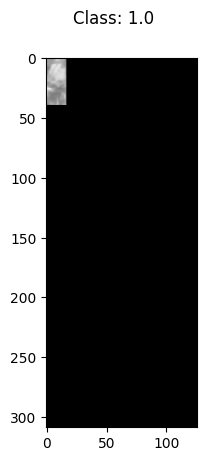

In [91]:
BASE_PATH = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops'

train_generator = Generator(os.path.join(BASE_PATH, 'train'))
val_generator = Generator(os.path.join(BASE_PATH, 'val'))
train_image, train_label = train_generator.__getitem__(5)
print(train_image[0].shape)
plt.imshow(train_image[0], cmap=plt.cm.gray)
plt.suptitle(f"Class: {train_label[0][0]}")
plt.show()

# Testing splitfolder

In [43]:
import splitfolders

In [15]:
image_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops'

In [45]:
splitfolders.fixed(image_path, output="output",
    seed=1337, fixed=(3825), oversample=False, group_prefix=None, move=False)

Copying files: 43911 files [07:31, 97.34 files/s] 


In [12]:
import torch
import torch.nn as nn

# Define a tensor representing raw scores/logits
logits = torch.tensor([[[[0.1148]],
                        [[0.3442]]]])

# Initialize Softmax module
softmax = nn.Softmax(dim = 1)

# Apply softmax to the logits
probabilities = softmax(logits)

print("Original logits:")
print(logits)
print("\nProbabilities after applying softmax:")
print(probabilities)
print(torch.max(probabilities))

Original logits:
tensor([[[[0.1148]],

         [[0.3442]]]])

Probabilities after applying softmax:
tensor([[[[0.4429]],

         [[0.5571]]]])
tensor(0.5571)


In [9]:
tensor = torch.tensor([[[[0.1148]],
                        [[0.3442]]]])

In [10]:
sigmoid = nn.Sigmoid()
probabilities = sigmoid(tensor)
print(probabilities)
print(torch.max(probabilities))

tensor([[[[0.5287]],

         [[0.5852]]]])
tensor(0.5852)


In [31]:
tensor = torch.tensor([[[1]]])

In [41]:
tensor = torch.tensor([0])

In [42]:
tensor.dim()

1

In [43]:
tensor = torch.reshape(tensor, (1,1,1))

In [ ]:
labels = torch.reshape(labels, (1,1,1))

In [44]:
tensor.size()

torch.Size([1, 1, 1])

In [45]:
tensor

tensor([[[0]]])

In [12]:
tensor[1:]

tensor([], size=(0, 2, 1, 1))

In [46]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


/Users/frankygeorge/miniconda3/lib/python3.10/site-packages/torch/_tensor_str.py:103: UserWarning: The operator 'aten::bitwise_and.Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at  /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1659484612588/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0))


In [47]:
device = torch.device('mps:0' if torch.backends.mps.is_available() else "cpu")
print(device)

mps:0


# Testting Ultralytics 

In [14]:
from ultralytics import YOLO

In [16]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)

  0%|          | 0.00/5.30M [00:00<?, ?B/s]

In [17]:
results = model.train(data=image_path, epochs=1, imgsz=20)


Ultralytics YOLOv8.1.29 🚀 Python-3.10.9 torch-1.12.1 CPU (Apple M1 Pro)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops, epochs=1, time=None, patience=100, batch=16, imgsz=20, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

train: Scanning /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianP

train: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/train/negative/neg_bremen_000100_000019_1.png: ignoring corrupt image/label: image size (83, 9) <10 pixels
train: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/train/negative/neg_bremen_000139_000019_4.png: ignoring corrupt image/label: image size (56, 6) <10 pixels
train: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/train/negative/neg_dusseldorf_000013_000019_2.png: ignoring corrupt image/label: image size (40, 8) <10 pixels
train: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/train/negative/neg_dusseldorf_000025_000019_1.png: ignoring corrupt image/label: image size (40, 8) <10 pixels
train: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/train/negative/neg_dusseldorf_000037_000019_5.png: ignoring corr

train: New cache created: /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/train.cache


val: Scanning /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianPro

val: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/val/negative/neg_bremen_000090_000019_10.png: ignoring corrupt image/label: image size (46, 9) <10 pixels
val: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/val/negative/neg_hanover_000000_005288_4.png: ignoring corrupt image/label: image size (71, 6) <10 pixels
val: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/val/positive/pos_dusseldorf_000067_000019_8.png: ignoring corrupt image/label: image size (49, 7) <10 pixels
val: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/val/positive/pos_dusseldorf_000072_000019_9.png: ignoring corrupt image/label: image size (55, 9) <10 pixels
val: WARNING ⚠️ /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/val/positive/pos_hamburg_000000_044747_25.png: ignoring corrupt image/label: ima

val: New cache created: /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


  0%|          | 0/2264 [00:00<?, ?it/s]/Users/frankygeorge/miniconda3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
        1/1         0G     0.6943         16         32:   0%|          | 1/2264/Users/frankygeorge/miniconda3/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
        1/1         0G     0.5225         15         32: 100%|██████████| 2264/2
               classes   top1_acc   top5_acc: 100%|██████████| 239/239 [00:25<00


                   all      0.855          1

1 epochs completed in 0.085 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.9 torch-1.12.1 CPU (Apple M1 Pro)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/train... found 36259 images in 2 classes ✅ 
val: /Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/val... found 7650 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 239/239 [00:25<00


                   all      0.856          1
Speed: 0.0ms preprocess, 2.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


# Selecting filtered image names from annotations

In [26]:
import json
import os

In [22]:
ann_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/annotations'
winter_filtered_list = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/translated images/winter/winter.json'

In [24]:
with open(winter_filtered_list) as jobject:
    filt_list = json.load(jobject)
    filt_list = filt_list['winter']

In [28]:
annotations = os.listdir(ann_path)
len(annotations)


2500

In [32]:
'erfurt_000103_000019'+'_gtBboxCityPersons.json'

'erfurt_000103_000019_gtBboxCityPersons.json'

In [33]:
filt_list = [image.replace('_leftImg8bit.png','') for image in filt_list ]
filt_annot = [image+'_gtBboxCityPersons.json' for image in filt_list]
filt_annot

['bremen_000256_000019_gtBboxCityPersons.json',
 'strasbourg_000001_065214_gtBboxCityPersons.json',
 'hamburg_000000_105123_gtBboxCityPersons.json',
 'cologne_000123_000019_gtBboxCityPersons.json',
 'hamburg_000000_073758_gtBboxCityPersons.json',
 'tubingen_000001_000019_gtBboxCityPersons.json',
 'bremen_000297_000019_gtBboxCityPersons.json',
 'bremen_000071_000019_gtBboxCityPersons.json',
 'stuttgart_000043_000019_gtBboxCityPersons.json',
 'strasbourg_000001_031582_gtBboxCityPersons.json',
 'dusseldorf_000174_000019_gtBboxCityPersons.json',
 'krefeld_000000_020033_gtBboxCityPersons.json',
 'bremen_000004_000019_gtBboxCityPersons.json',
 'bremen_000177_000019_gtBboxCityPersons.json',
 'tubingen_000107_000019_gtBboxCityPersons.json',
 'zurich_000069_000019_gtBboxCityPersons.json',
 'stuttgart_000145_000019_gtBboxCityPersons.json',
 'strasbourg_000001_039446_gtBboxCityPersons.json',
 'bochum_000000_003674_gtBboxCityPersons.json',
 'dusseldorf_000072_000019_gtBboxCityPersons.json',
 'brem

In [34]:
i=0
for image in filt_annot:
    if image in annotations:
        i+=1
print(i)

1810


In [31]:
annotations


['dusseldorf_000081_000019_gtBboxCityPersons.json',
 'bremen_000060_000019_gtBboxCityPersons.json',
 'dusseldorf_000015_000019_gtBboxCityPersons.json',
 'hanover_000000_002458_gtBboxCityPersons.json',
 'hamburg_000000_080878_gtBboxCityPersons.json',
 'hamburg_000000_044747_gtBboxCityPersons.json',
 'hanover_000000_053027_gtBboxCityPersons.json',
 'monchengladbach_000000_035083_gtBboxCityPersons.json',
 'cologne_000136_000019_gtBboxCityPersons.json',
 'stuttgart_000091_000019_gtBboxCityPersons.json',
 'stuttgart_000005_000019_gtBboxCityPersons.json',
 'aachen_000131_000019_gtBboxCityPersons.json',
 'monchengladbach_000000_028883_gtBboxCityPersons.json',
 'cologne_000018_000019_gtBboxCityPersons.json',
 'darmstadt_000048_000019_gtBboxCityPersons.json',
 'bremen_000025_000019_gtBboxCityPersons.json',
 'cologne_000092_000019_gtBboxCityPersons.json',
 'monchengladbach_000000_017950_gtBboxCityPersons.json',
 'cologne_000006_000019_gtBboxCityPersons.json',
 'darmstadt_000056_000019_gtBboxCity

# Using YOLO to select best images

In [46]:
import pandas as pd
import re

In [36]:
image_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/crops/translated crops/winter'

In [39]:
crops = os.listdir(image_path)
crops_series = pd.Series(crops)
selected_images = []  # list of selected images

# for crop in crops:
#     image_crops = []  # a list to hold all crops from a single image
#     img_name = re.sub(r'_\d+\.png$', '', crop)


In [42]:
filt = crops_series.str.contains('png')

In [77]:
crop = crops[112]
crop

'hamburg_000000_088783_17.png'

In [78]:
img_name = re.sub(r'_\d+\.png$', '', crop)
img_name

'hamburg_000000_088783'

In [79]:
filt = crops_series.str.contains(img_name)

In [82]:
list(crops_series[filt].values)

['hamburg_000000_088783_17.png',
 'hamburg_000000_088783_16.png',
 'hamburg_000000_088783_14.png',
 'hamburg_000000_088783_15.png',
 'hamburg_000000_088783_11.png',
 'hamburg_000000_088783_10.png',
 'hamburg_000000_088783_12.png',
 'hamburg_000000_088783_13.png',
 'hamburg_000000_088783_7.png',
 'hamburg_000000_088783_6.png',
 'hamburg_000000_088783_4.png',
 'hamburg_000000_088783_5.png',
 'hamburg_000000_088783_1.png',
 'hamburg_000000_088783_2.png',
 'hamburg_000000_088783_3.png',
 'hamburg_000000_088783_8.png',
 'hamburg_000000_088783_9.png',
 'hamburg_000000_088783_20.png',
 'hamburg_000000_088783_18.png',
 'hamburg_000000_088783_19.png']

In [83]:
crops_series[~filt]

0        strasbourg_000000_013863_7.png
1           hanover_000000_035606_4.png
2          hanover_000000_027766_22.png
3          hamburg_000000_065604_16.png
4           hanover_000000_011170_2.png
                      ...              
14093        bremen_000179_000019_1.png
14094    strasbourg_000001_060061_2.png
14095       zurich_000063_000019_14.png
14096       hamburg_000000_028608_4.png
14097       hamburg_000000_045437_2.png
Length: 14078, dtype: object

In [81]:
image_info.get_ped_count(img_name)

20

In [61]:
import numpy as np
import json
import os


class ImagesInfo:
    def __init__(self):
        self.__annotations_path = None
        self.__bbox_list = []
        self.__image_info = {}
        self.__pedestrian_count = None

    @staticmethod
    def filter_bboxes(coordinates, threshold_area=300):
        """This function is to discard any bounding boxes that have negative x,y coordinates and are below
        a certain area i.e., h*w"""

        x, y, w, h = coordinates
        if w * h >= threshold_area and x >= 0 and y >= 0 and x + w <= 2048 and y + h <= 1024:
            return True
        else:
            return False

    @staticmethod
    def read_annotation(filepath):
        """This is a static method to read in the annotation file"""

        with open(filepath) as jobject:
            bounding_box = json.load(jobject)
            return bounding_box

    @staticmethod
    def area_taken(coordinates):
        """this class level function calculates the area taken by a single bbox"""

        area = 0
        for coord in coordinates:
            h, w = coord[-2], coord[-1]
            a = h * w
            area += a
        return area

    def initialize(self, anno_path, bbox_parameter='bbox'):
        """This method reads in the annotation file for each image and stores the relevant information in
        the instance attribute, which can be retrieved using the method - get_image_info()"""

        self.__annotations_path = anno_path

        files = os.listdir(self.__annotations_path)

        count = []

        for file in files:
            imageinfo = {}
            filepath = os.path.join(self.__annotations_path, file)

            # print(filepath) -- debug print statement

            bounding_box = self.read_annotation(filepath)
            objects = bounding_box['objects']
            ped_coords = [obj[bbox_parameter] for obj in objects if obj['label'] != 'ignore']

            # populating the instance attribute with relevant information pertaining to each image
            n = len(ped_coords)
            count.append(n)
            imageinfo['count'] = n

            area = self.area_taken(ped_coords)
            imageinfo['area'] = area

            imageinfo['bboxes'] = ped_coords
            for ped_coord in ped_coords:
                if self.filter_bboxes(ped_coord):
                    self.__bbox_list.append(ped_coord)

            key = file.replace('_gtBboxCityPersons.json', '')
            self.__image_info[key] = imageinfo

        self.__pedestrian_count = np.array(list(count))

    def get_image_info(self):
        """This method retrieves the information pertaining to the pedestrians for each image in the dataset"""
        return self.__image_info

    def get_ped_count(self, filename=None):
        """This method return the total number of pedestrians in all images in the dataset if the filename
        parameter is not specified, if specified pedestrian count for that image will be returned"""

        count_list = {file: count['count'] for file, count in self.__image_info.items()}

        if filename is None:
            return count_list
        else:
            return count_list[filename]

    def get_area(self, filename=None, threshold=0):
        """This method returns a dictionary containing file name and the area taken by all pedestrian in that image."""

        area_list = {file: info['area'] for file, info in self.__image_info.items()}
        if filename is None:
            return area_list
        else:
            return area_list[filename]

    def get_bbox(self, filename=None):
        """This method returns a dictionary with filename and the bounding box information for the entire dataset
        if filename parameter is not specified. If specified returns a list of all coordinates for that particular image."""

        bbox_list = {file: count['bboxes'] for file, count in self.__image_info.items()}
        if filename is None:
            return bbox_list
        else:
            key = filename.replace('_leftImg8bit.png', '')
            return bbox_list[key]

    def max_count(self):
        return self.__pedestrian_count.max()

    def min_count(self):
        return self.__pedestrian_count.min()

    def total_count(self):
        return np.sum(self.__pedestrian_count)

    def average(self):
        return self.__pedestrian_count.mean()

    def count_above_theta(self, theta):
        """This method is to identify images having certain number(theta parameter) of pedestrians or more in it.
        The only purpose of the method is to investigate and identify certain parameters for cropping, if required """

        filt_list = {file: count['count'] for file, count in self.__image_info.items() if count['count'] > theta}
        if len(filt_list) > 0:
            print(f'There are {len(filt_list)} images with pedestrian count more than {theta}')
        else:
            print(f'There are no images in the dataset with pedestrian count more than {theta}')
        return filt_list

    def get_bbox_list(self):
        """This method return the list that holds all the bounding boxes that satisfied the required criterion"""

        return self.__bbox_list    

In [62]:
bbox_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/annotations'

image_info = ImagesInfo()

image_info.initialize(bbox_path)

In [113]:
crops = os.listdir(image_path)
crops_series = pd.Series(crops)
selected_images = []  # list of selected images

i = 0
while len(crops_series) >0:
    print(f'Before removing crops length of crops_series is {len(crops_series)}')
    print()
    img_name = re.sub(r'_\d+\.png$', '', crops_series[0])

    filt = crops_series.str.contains(img_name)
    image_crops = list(crops_series[filt].values)  # a list to hold all crops from a single image
    print(f'Length of crops: {len(image_crops)}')
    print()    
    if len(image_crops) == 1:
        print(img_name)
    print()
    crops_series = crops_series[~filt]
    crops_series.reset_index(drop = True, inplace = True)
    print(f'After removing crops, length of crops_series is {len(crops_series)}')
    print()
    

Before removing crops length of crops_series is 14098

Length of crops: 27


After removing crops, length of crops_series is 14071

Before removing crops length of crops_series is 14071

Length of crops: 16


After removing crops, length of crops_series is 14055

Before removing crops length of crops_series is 14055

Length of crops: 30


After removing crops, length of crops_series is 14025

Before removing crops length of crops_series is 14025

Length of crops: 22


After removing crops, length of crops_series is 14003

Before removing crops length of crops_series is 14003

Length of crops: 4


After removing crops, length of crops_series is 13999

Before removing crops length of crops_series is 13999

Length of crops: 30


After removing crops, length of crops_series is 13969

Before removing crops length of crops_series is 13969

Length of crops: 12


After removing crops, length of crops_series is 13957

Before removing crops length of crops_series is 13957

Length of crops: 30




After removing crops, length of crops_series is 12767

Before removing crops length of crops_series is 12767

Length of crops: 10


After removing crops, length of crops_series is 12757

Before removing crops length of crops_series is 12757

Length of crops: 16


After removing crops, length of crops_series is 12741

Before removing crops length of crops_series is 12741

Length of crops: 12


After removing crops, length of crops_series is 12729

Before removing crops length of crops_series is 12729

Length of crops: 8


After removing crops, length of crops_series is 12721

Before removing crops length of crops_series is 12721

Length of crops: 10


After removing crops, length of crops_series is 12711

Before removing crops length of crops_series is 12711

Length of crops: 24


After removing crops, length of crops_series is 12687

Before removing crops length of crops_series is 12687

Length of crops: 38


After removing crops, length of crops_series is 12649

Before removing crops 

After removing crops, length of crops_series is 11365

Before removing crops length of crops_series is 11365

Length of crops: 10


After removing crops, length of crops_series is 11355

Before removing crops length of crops_series is 11355

Length of crops: 25


After removing crops, length of crops_series is 11330

Before removing crops length of crops_series is 11330

Length of crops: 20


After removing crops, length of crops_series is 11310

Before removing crops length of crops_series is 11310

Length of crops: 3


After removing crops, length of crops_series is 11307

Before removing crops length of crops_series is 11307

Length of crops: 18


After removing crops, length of crops_series is 11289

Before removing crops length of crops_series is 11289

Length of crops: 42


After removing crops, length of crops_series is 11247

Before removing crops length of crops_series is 11247

Length of crops: 25


After removing crops, length of crops_series is 11222

Before removing crops 

After removing crops, length of crops_series is 9468

Before removing crops length of crops_series is 9468

Length of crops: 36


After removing crops, length of crops_series is 9432

Before removing crops length of crops_series is 9432

Length of crops: 2


After removing crops, length of crops_series is 9430

Before removing crops length of crops_series is 9430

Length of crops: 5


After removing crops, length of crops_series is 9425

Before removing crops length of crops_series is 9425

Length of crops: 11


After removing crops, length of crops_series is 9414

Before removing crops length of crops_series is 9414

Length of crops: 48


After removing crops, length of crops_series is 9366

Before removing crops length of crops_series is 9366

Length of crops: 24


After removing crops, length of crops_series is 9342

Before removing crops length of crops_series is 9342

Length of crops: 4


After removing crops, length of crops_series is 9338

Before removing crops length of crops_s

Length of crops: 4


After removing crops, length of crops_series is 8163

Before removing crops length of crops_series is 8163

Length of crops: 5


After removing crops, length of crops_series is 8158

Before removing crops length of crops_series is 8158

Length of crops: 16


After removing crops, length of crops_series is 8142

Before removing crops length of crops_series is 8142

Length of crops: 10


After removing crops, length of crops_series is 8132

Before removing crops length of crops_series is 8132

Length of crops: 1

bremen_000196_000019

After removing crops, length of crops_series is 8131

Before removing crops length of crops_series is 8131

Length of crops: 4


After removing crops, length of crops_series is 8127

Before removing crops length of crops_series is 8127

Length of crops: 1

stuttgart_000058_000019

After removing crops, length of crops_series is 8126

Before removing crops length of crops_series is 8126

Length of crops: 20


After removing crops, length

After removing crops, length of crops_series is 6988

Before removing crops length of crops_series is 6988

Length of crops: 10


After removing crops, length of crops_series is 6978

Before removing crops length of crops_series is 6978

Length of crops: 2


After removing crops, length of crops_series is 6976

Before removing crops length of crops_series is 6976

Length of crops: 1

bochum_000000_020899

After removing crops, length of crops_series is 6975

Before removing crops length of crops_series is 6975

Length of crops: 3


After removing crops, length of crops_series is 6972

Before removing crops length of crops_series is 6972

Length of crops: 2


After removing crops, length of crops_series is 6970

Before removing crops length of crops_series is 6970

Length of crops: 1

dusseldorf_000098_000019

After removing crops, length of crops_series is 6969

Before removing crops length of crops_series is 6969

Length of crops: 12


After removing crops, length of crops_series is 6

After removing crops, length of crops_series is 5530

Before removing crops length of crops_series is 5530

Length of crops: 23


After removing crops, length of crops_series is 5507

Before removing crops length of crops_series is 5507

Length of crops: 8


After removing crops, length of crops_series is 5499

Before removing crops length of crops_series is 5499

Length of crops: 8


After removing crops, length of crops_series is 5491

Before removing crops length of crops_series is 5491

Length of crops: 7


After removing crops, length of crops_series is 5484

Before removing crops length of crops_series is 5484

Length of crops: 8


After removing crops, length of crops_series is 5476

Before removing crops length of crops_series is 5476

Length of crops: 10


After removing crops, length of crops_series is 5466

Before removing crops length of crops_series is 5466

Length of crops: 25


After removing crops, length of crops_series is 5441

Before removing crops length of crops_se

After removing crops, length of crops_series is 3244

Before removing crops length of crops_series is 3244

Length of crops: 2


After removing crops, length of crops_series is 3242

Before removing crops length of crops_series is 3242

Length of crops: 4


After removing crops, length of crops_series is 3238

Before removing crops length of crops_series is 3238

Length of crops: 4


After removing crops, length of crops_series is 3234

Before removing crops length of crops_series is 3234

Length of crops: 1

stuttgart_000136_000019

After removing crops, length of crops_series is 3233

Before removing crops length of crops_series is 3233

Length of crops: 5


After removing crops, length of crops_series is 3228

Before removing crops length of crops_series is 3228

Length of crops: 2


After removing crops, length of crops_series is 3226

Before removing crops length of crops_series is 3226

Length of crops: 1

aachen_000166_000019

After removing crops, length of crops_series is 3225

After removing crops, length of crops_series is 1156

Before removing crops length of crops_series is 1156

Length of crops: 1

bremen_000027_000019

After removing crops, length of crops_series is 1155

Before removing crops length of crops_series is 1155

Length of crops: 5


After removing crops, length of crops_series is 1150

Before removing crops length of crops_series is 1150

Length of crops: 5


After removing crops, length of crops_series is 1145

Before removing crops length of crops_series is 1145

Length of crops: 1

tubingen_000028_000019

After removing crops, length of crops_series is 1144

Before removing crops length of crops_series is 1144

Length of crops: 5


After removing crops, length of crops_series is 1139

Before removing crops length of crops_series is 1139

Length of crops: 4


After removing crops, length of crops_series is 1135

Before removing crops length of crops_series is 1135

Length of crops: 5


After removing crops, length of crops_series is 1130


In [109]:
crops = os.listdir(image_path)
crops_series = pd.Series(crops)
img_name = re.sub(r'_\d+\.png$', '', crops_series[0])
print(img_name)
filt = crops_series.str.contains(img_name)
print(len(filt))
crops_series = crops_series[~filt]
crops_series.reset_index(drop = True, inplace = True)
print(len(crops_series))

img_name = re.sub(r'_\d+\.png$', '', crops_series[0])
print(img_name)
filt = crops_series.str.contains(img_name)
crops_series = crops_series[~filt]
crops_series.reset_index(drop = True, inplace = True)
print(len(crops_series))


img_name = re.sub(r'_\d+\.png$', '', crops_series[0])
print(img_name)
filt = crops_series.str.contains(img_name)
crops_series = crops_series[~filt]
crops_series.reset_index(drop = True, inplace = True)
print(len(crops_series))


img_name = re.sub(r'_\d+\.png$', '', crops_series[0])
print(img_name)
filt = crops_series.str.contains(img_name)
crops_series = crops_series[~filt]
crops_series.reset_index(drop = True, inplace = True)
print(len(crops_series))


strasbourg_000000_013863
14098
14071
hanover_000000_035606
14055
hanover_000000_027766
14025
hamburg_000000_065604
14003


In [136]:
count = 1
round(count/2)

0

In [131]:
import decimal

In [137]:
int(decimal.Decimal(count/2).quantize(decimal.Decimal('1'), rounding=decimal.ROUND_HALF_UP))

1

In [139]:
round(0.6 *92)

55

# Pedestron Annotations for CityPersons Dataset:

In [19]:
import pandas as pd
import json

In [51]:
pedestron_annotations = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/train/pedestron_train.json'
with open(pedestron_annotations) as jobject:
    ann = json.load(jobject)

In [52]:
ann

{'info': {'description': 'Example Dataset',
  'url': 'https://github.com/waspinator/pycococreator',
  'version': '0.1.0',
  'year': 2019,
  'contributor': 'ljp',
  'date_created': '2019-07-25 11:20:43.195866'},
 'licenses': [{'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License',
   'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'}],
 'categories': [{'id': 1,
   'name': 'pedestrain',
   'supercategory': 'pedestrain'}],
 'images': [{'id': 1,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000117_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 2,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000080_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 3,
   '

In [54]:
 pd.DataFrame(ann['images'])

id                                          file_name  width  height  \
0        1  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
1        2  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
2        3  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
3        4  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
4        5  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
...    ...                                                ...    ...     ...   
2970  2971  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2971  2972  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2972  2973  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2973  2974  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2974  2975  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   

                   date_captured  license coco_url flickr_url  
0     2019-07-25 11:20:43.195846        1                      
1     2019-07-25 11:20:43.195846        1                      
2     2019-07-25 11:20:43.195846        1                      
3     2019-07-25 11:20:43.195846        1                      
4     2019-07-25 11:20:43.195846        1                      
...                          ...      ...      ...        ...  
2970  2019-07-25 11:20:43.195846        1                      
2971  2019-07-25 11:20:43.195846        1                      
2972  2019-07-25 11:20:43.195846        1                      
2973  2019-07-25 11:20:43.195846        1                      
2974  2019-07-25 11:20:43.195846        1                      

[2975 rows x 8 columns]

In [27]:
 pd.DataFrame(ann['images'])['license'].unique()

array([1])

In [63]:
image_ann = {}
image_ann['images'] = ann['images']
image_ann['annotations'] = ann['annotations']
image_ann

{'images': [{'id': 1,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000117_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 2,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000080_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 3,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000113_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 4,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000128_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.1

In [64]:
image_df = pd.DataFrame(image_ann['images'])

In [65]:
ann_df = pd.DataFrame(image_ann['annotations'])

In [66]:
image_df

id                                          file_name  width  height  \
0        1  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
1        2  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
2        3  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
3        4  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
4        5  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
...    ...                                                ...    ...     ...   
2970  2971  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2971  2972  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2972  2973  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2973  2974  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2974  2975  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   

                   date_captured  license coco_url flickr_url  
0     2019-07-25 11:20:43.195846        1                      
1     2019-07-25 11:20:43.195846        1                      
2     2019-07-25 11:20:43.195846        1                      
3     2019-07-25 11:20:43.195846        1                      
4     2019-07-25 11:20:43.195846        1                      
...                          ...      ...      ...        ...  
2970  2019-07-25 11:20:43.195846        1                      
2971  2019-07-25 11:20:43.195846        1                      
2972  2019-07-25 11:20:43.195846        1                      
2973  2019-07-25 11:20:43.195846        1                      
2974  2019-07-25 11:20:43.195846        1                      

[2975 rows x 8 columns]

In [190]:
image_df[image_df['file_name'].str.contains('cologne_000035_000019')]

id                                          file_name  width  height  \
765  766  leftImg8bit_trainvaltest//leftImg8bit/train/co...   2048    1024   

                  date_captured  license coco_url flickr_url  
765  2019-07-25 11:20:43.195846        1

In [191]:
765+0.5

765.5

In [136]:
int(image_df[image_df['file_name'].str.contains('cologne_000045_000019')].id.values)

775

In [138]:
image_df[image_df['file_name'].str.contains('cologne_000045_000019')].index

Int64Index([774], dtype='int64')

In [113]:
image_df.loc[765,'file_name']

'leftImg8bit_trainvaltest//leftImg8bit/train/cologne/cologne_000035_000019_leftImg8bit.png'

In [98]:
imgage_id = image_df.loc[765,'id']

In [192]:

original_path = 'leftImg8bit_trainvaltest/leftImg8bit/train/cologne/cologne_000035_000019_leftImg8bit.png'
new_filename = re.sub(r'_leftImg8bit\.png$', 'w_leftImg8bit.png', original_path)

entry = {'id': imgage_id +1,
   'file_name': new_filename,
   'width': 512,
   'height': 256,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''}

image_df.loc[765.5] = entry

In [193]:
image_df = image_df.sort_index().reset_index(drop=True)

In [195]:
image_df.loc[766,'file_name']

'leftImg8bit_trainvaltest/leftImg8bit/train/cologne/cologne_000035_000019w_leftImg8bit.png'

In [110]:
image_df['id'][767:] = image_df['id'][767:].apply(lambda x: x+1)

/var/folders/__/j2f52rdn0s3_66fsf8gl25919_49rm/T/ipykernel_4046/900699040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_df['id'][767:] = image_df['id'][767:].apply(lambda x: x+1)


In [147]:
image_df

id                                          file_name  width  height  \
0        1  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
1        2  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
2        3  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
3        4  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
4        5  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
...    ...                                                ...    ...     ...   
2971  2972  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2972  2973  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2973  2974  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2974  2975  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2975  2976  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   

                   date_captured  license coco_url flickr_url  
0     2019-07-25 11:20:43.195846        1                      
1     2019-07-25 11:20:43.195846        1                      
2     2019-07-25 11:20:43.195846        1                      
3     2019-07-25 11:20:43.195846        1                      
4     2019-07-25 11:20:43.195846        1                      
...                          ...      ...      ...        ...  
2971  2019-07-25 11:20:43.195846        1                      
2972  2019-07-25 11:20:43.195846        1                      
2973  2019-07-25 11:20:43.195846        1                      
2974  2019-07-25 11:20:43.195846        1                      
2975  2019-07-25 11:20:43.195846        1                      

[2976 rows x 8 columns]

In [171]:
import numpy as np
np.max(ann_df[ann_df['image_id']==43].index)

268

In [172]:
ann_df.loc[268, 'id']

269

In [170]:
ann_df[ann_df['image_id']==43]

id  image_id  category_id  iscrowd                          bbox  width  \
262  263        43            1    False   [224.0, 370.0, 70.0, 171.0]   2048   
263  264        43            1    False  [1855.0, 413.0, 53.0, 130.0]   2048   
264  265        43            1    False  [1917.0, 410.0, 55.0, 134.0]   2048   
265  266        43            1    False  [1975.0, 395.0, 61.0, 150.0]   2048   
266  267        43            1    False   [1554.0, 421.0, 34.0, 84.0]   2048   
267  268        43            1    False  [1415.0, 421.0, 45.0, 109.0]   2048   
268  269        43            1    False  [1460.0, 414.0, 47.0, 117.0]   2048   

     height  
262    1024  
263    1024  
264    1024  
265    1024  
266    1024  
267    1024  
268    1024

In [156]:
ann_df

id  image_id  category_id  iscrowd                         bbox  \
0          1         1            1     True  [1034.0, 366.0, 31.0, 75.0]   
1          2         1            1     True  [1911.0, 359.0, 10.0, 54.0]   
2          3         1            1     True    [1137.0, 307.0, 8.0, 9.0]   
3          4         2            1    False  [602.0, 413.0, 60.0, 146.0]   
4          5         2            1    False  [491.0, 396.0, 65.0, 158.0]   
...      ...       ...          ...      ...                          ...   
27765  27766      2975            1     True  [1558.0, 380.0, 18.0, 43.0]   
27766  27767      2975            1     True  [1679.0, 361.0, 27.0, 59.0]   
27767  27768      2975            1     True   [416.0, 300.0, 15.0, 58.0]   
27768  27769      2975            1     True    [446.0, 351.0, 8.0, 65.0]   
27769  27770      2975            1     True    [492.0, 315.0, 8.0, 95.0]   

       width  height  
0       2048    1024  
1       2048    1024  
2       2048    1024  
3       2048    1024  
4       2048    1024  
...      ...     ...  
27765   2048    1024  
27766   2048    1024  
27767   2048    1024  
27768   2048    1024  
27769   2048    1024  

[27770 rows x 7 columns]

In [18]:
ann_df.to_dict(orient = 'records')

[{'id': 1,
  'image_id': 1,
  'category_id': 1,
  'iscrowd': True,
  'bbox': [1034.0, 366.0, 31.0, 75.0],
  'width': 2048,
  'height': 1024},
 {'id': 2,
  'image_id': 1,
  'category_id': 1,
  'iscrowd': True,
  'bbox': [1911.0, 359.0, 10.0, 54.0],
  'width': 2048,
  'height': 1024},
 {'id': 3,
  'image_id': 1,
  'category_id': 1,
  'iscrowd': True,
  'bbox': [1137.0, 307.0, 8.0, 9.0],
  'width': 2048,
  'height': 1024},
 {'id': 4,
  'image_id': 2,
  'category_id': 1,
  'iscrowd': False,
  'bbox': [602.0, 413.0, 60.0, 146.0],
  'width': 2048,
  'height': 1024},
 {'id': 5,
  'image_id': 2,
  'category_id': 1,
  'iscrowd': False,
  'bbox': [491.0, 396.0, 65.0, 158.0],
  'width': 2048,
  'height': 1024},
 {'id': 6,
  'image_id': 2,
  'category_id': 1,
  'iscrowd': False,
  'bbox': [281.0, 381.0, 89.0, 216.0],
  'width': 2048,
  'height': 1024},
 {'id': 7,
  'image_id': 3,
  'category_id': 1,
  'iscrowd': True,
  'bbox': [942.0, 406.0, 18.0, 44.0],
  'width': 2048,
  'height': 1024},
 {'id'

In [162]:
entry = {'id': 4,
  'image_id': 2,
  'category_id': 1,
  'iscrowd': True,
  'bbox': [11.0, 37.0, 8.0, 1.0],
  'width': 2048,
  'height': 1024}

ann_df.loc[2.5] = entry
# df = df.sort_index().reset_index(drop=True)

In [163]:
ann_df = ann_df.sort_index().reset_index(drop=True)

In [173]:
ann_df.head(15)

id  image_id  category_id  iscrowd                          bbox  width  \
0    1         1            1     True   [1034.0, 366.0, 31.0, 75.0]   2048   
1    2         1            1     True   [1911.0, 359.0, 10.0, 54.0]   2048   
2    3         1            1     True     [1137.0, 307.0, 8.0, 9.0]   2048   
3    4         2            1    False   [602.0, 413.0, 60.0, 146.0]   2048   
4    5         2            1    False   [491.0, 396.0, 65.0, 158.0]   2048   
5    6         2            1    False   [281.0, 381.0, 89.0, 216.0]   2048   
6    7         3            1     True    [942.0, 406.0, 18.0, 44.0]   2048   
7    8         3            1     True    [925.0, 404.0, 19.0, 46.0]   2048   
8    9         3            1     True    [856.0, 415.0, 35.0, 83.0]   2048   
9   10         4            1    False   [484.0, 338.0, 76.0, 185.0]   2048   
10  11         4            1    False   [425.0, 345.0, 71.0, 172.0]   2048   
11  12         4            1    False   [1183.0, 404.0, 31.0, 75.0]   2048   
12  13         5            1     True   [821.0, 383.0, 56.0, 137.0]   2048   
13  14         5            1     True    [923.0, 389.0, 27.0, 38.0]   2048   
14  15         6            1    False  [1244.0, 449.0, 80.0, 195.0]   2048   

    height  
0     1024  
1     1024  
2     1024  
3     1024  
4     1024  
5     1024  
6     1024  
7     1024  
8     1024  
9     1024  
10    1024  
11    1024  
12    1024  
13    1024  
14    1024

In [165]:
ann_df['id'][4:] = ann_df['id'][4:].apply(lambda x: x+1)

/var/folders/__/j2f52rdn0s3_66fsf8gl25919_49rm/T/ipykernel_4046/875884805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann_df['id'][4:] = ann_df['id'][4:].apply(lambda x: x+1)


In [166]:
ann_df['image_id'][4:] = ann_df['image_id'][4:] .apply(lambda x: x+1)

/var/folders/__/j2f52rdn0s3_66fsf8gl25919_49rm/T/ipykernel_4046/3717388994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann_df['image_id'][4:] = ann_df['image_id'][4:] .apply(lambda x: x+1)


In [167]:
ann_df

id  image_id  category_id  iscrowd                         bbox  \
0          1         1            1     True  [1034.0, 366.0, 31.0, 75.0]   
1          2         1            1     True  [1911.0, 359.0, 10.0, 54.0]   
2          3         1            1     True    [1137.0, 307.0, 8.0, 9.0]   
3          4         2            1     True       [11.0, 37.0, 8.0, 1.0]   
4          5         3            1    False  [602.0, 413.0, 60.0, 146.0]   
...      ...       ...          ...      ...                          ...   
27766  27767      2976            1     True  [1558.0, 380.0, 18.0, 43.0]   
27767  27768      2976            1     True  [1679.0, 361.0, 27.0, 59.0]   
27768  27769      2976            1     True   [416.0, 300.0, 15.0, 58.0]   
27769  27770      2976            1     True    [446.0, 351.0, 8.0, 65.0]   
27770  27771      2976            1     True    [492.0, 315.0, 8.0, 95.0]   

       width  height  
0       2048    1024  
1       2048    1024  
2       2048    1024  
3       2048    1024  
4       2048    1024  
...      ...     ...  
27766   2048    1024  
27767   2048    1024  
27768   2048    1024  
27769   2048    1024  
27770   2048    1024  

[27771 rows x 7 columns]

In [51]:
ann_fp = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/winter/annotation/dusseldorf_000010_000019_gtBboxCityPersons.json'

In [52]:
with open(ann_fp) as jobject:
    bboxes = json.load(jobject)

In [64]:
anns = bboxes['objects']
anns

[{'instanceId': 24000,
  'bbox': [138, 106, 8, 20],
  'bboxVis': [555, 427, 30, 78],
  'label': 'pedestrian'},
 {'instanceId': 24001,
  'bbox': [69, 101, 15, 36],
  'bboxVis': [286, 405, 44, 146],
  'label': 'pedestrian'},
 {'instanceId': 24002,
  'bbox': [362, 72, 36, 87],
  'bboxVis': [1471, 290, 107, 348],
  'label': 'pedestrian'},
 {'instanceId': 24003,
  'bbox': [417, 71, 37, 90],
  'bboxVis': [1699, 285, 95, 359],
  'label': 'pedestrian'},
 {'instanceId': 24004,
  'bbox': [433, 71, 41, 101],
  'bboxVis': [1751, 287, 126, 401],
  'label': 'pedestrian'},
 {'instanceId': 0,
  'bbox': [92, 103, 2, 9],
  'bboxVis': [369, 414, 10, 37],
  'label': 'ignore'}]

In [65]:
coords = [ann['bbox'] for ann in anns]
coords

[[138, 106, 8, 20],
 [69, 101, 15, 36],
 [362, 72, 36, 87],
 [417, 71, 37, 90],
 [433, 71, 41, 101],
 [92, 103, 2, 9]]

In [61]:
image_ann['annotations'][:4]

[{'id': 1,
  'image_id': 1,
  'category_id': 1,
  'iscrowd': True,
  'bbox': [1034.0, 366.0, 31.0, 75.0],
  'width': 2048,
  'height': 1024},
 {'id': 2,
  'image_id': 1,
  'category_id': 1,
  'iscrowd': True,
  'bbox': [1911.0, 359.0, 10.0, 54.0],
  'width': 2048,
  'height': 1024},
 {'id': 3,
  'image_id': 1,
  'category_id': 1,
  'iscrowd': True,
  'bbox': [1137.0, 307.0, 8.0, 9.0],
  'width': 2048,
  'height': 1024},
 {'id': 4,
  'image_id': 2,
  'category_id': 1,
  'iscrowd': False,
  'bbox': [602.0, 413.0, 60.0, 146.0],
  'width': 2048,
  'height': 1024}]

In [422]:
img_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/winter/winter'
ann_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/winter/annotation'
pedstron = 'pedestron_train.json'

In [307]:
image_df = pd.DataFrame(image_ann['images'])

In [308]:
ann_df = pd.DataFrame(image_ann['annotations'])

In [312]:
image_df.iloc[765]

id                                                             766
file_name        leftImg8bit_trainvaltest//leftImg8bit/train/co...
width                                                         2048
height                                                        1024
date_captured                           2019-07-25 11:20:43.195846
license                                                          1
coco_url                                                          
flickr_url                                                        
Name: 765, dtype: object

In [311]:
image_df.loc[765,'file_name']

'leftImg8bit_trainvaltest//leftImg8bit/train/cologne/cologne_000035_000019_leftImg8bit.png'

In [313]:
ann_df[ann_df['image_id'] ==766]

id  image_id  category_id  iscrowd                           bbox  \
5750  5751       766            1    False    [424.0, 395.0, 49.0, 120.0]   
5751  5752       766            1    False    [384.0, 388.0, 53.0, 129.0]   
5752  5753       766            1     True  [1403.0, 392.0, 154.0, 124.0]   
5753  5754       766            1     True     [793.0, 401.0, 28.0, 30.0]   

      width  height  
5750   2048    1024  
5751   2048    1024  
5752   2048    1024  
5753   2048    1024

In [374]:
ann_df

id  image_id  category_id  iscrowd                         bbox  \
0          1         1            1     True  [1034.0, 366.0, 31.0, 75.0]   
1          2         1            1     True  [1911.0, 359.0, 10.0, 54.0]   
2          3         1            1     True    [1137.0, 307.0, 8.0, 9.0]   
3          4         2            1    False  [602.0, 413.0, 60.0, 146.0]   
4          5         2            1    False  [491.0, 396.0, 65.0, 158.0]   
...      ...       ...          ...      ...                          ...   
27765  27766      2975            1     True  [1558.0, 380.0, 18.0, 43.0]   
27766  27767      2975            1     True  [1679.0, 361.0, 27.0, 59.0]   
27767  27768      2975            1     True   [416.0, 300.0, 15.0, 58.0]   
27768  27769      2975            1     True    [446.0, 351.0, 8.0, 65.0]   
27769  27770      2975            1     True    [492.0, 315.0, 8.0, 95.0]   

       width  height  
0       2048    1024  
1       2048    1024  
2       2048    1024  
3       2048    1024  
4       2048    1024  
...      ...     ...  
27765   2048    1024  
27766   2048    1024  
27767   2048    1024  
27768   2048    1024  
27769   2048    1024  

[27770 rows x 7 columns]

In [375]:
27770 + 7784

35554

In [423]:
import warnings
warnings.filterwarnings("ignore")


ped_ann = prepare_translated_images_for_da(img_path,ann_path, pedstron,img_path,style = 'winter')

cologne_000035_000019


In [319]:
i_df.iloc[765]

id                                                             766
file_name        leftImg8bit_trainvaltest//leftImg8bit/train/co...
width                                                         2048
height                                                        1024
date_captured                           2019-07-25 11:20:43.195846
license                                                          1
coco_url                                                          
flickr_url                                                        
Name: 765, dtype: object

In [320]:
i_df.loc[765,'file_name']

'leftImg8bit_trainvaltest//leftImg8bit/train/cologne/cologne_000035_000019_leftImg8bit.png'

In [321]:
i_df.iloc[766]

id                                                             767
file_name        leftImg8bit_trainvaltest//leftImg8bit/train/co...
width                                                          512
height                                                         256
date_captured                           2019-07-25 11:20:43.195846
license                                                          1
coco_url                                                          
flickr_url                                                        
Name: 766, dtype: object

In [322]:
i_df.loc[766,'file_name']

'leftImg8bit_trainvaltest//leftImg8bit/train/cologne/cologne_000035_000019w_leftImg8bit.png'

In [382]:
i_df

id                                          file_name  width  height  \
0        1  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
1        2  leftImg8bit_trainvaltest//leftImg8bit/train/we...    512     256   
2        3  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
3        4  leftImg8bit_trainvaltest//leftImg8bit/train/we...    512     256   
4        5  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
...    ...                                                ...    ...     ...   
4345  4346  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
4346  4347  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
4347  4348  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
4348  4349  leftImg8bit_trainvaltest//leftImg8bit/train/tu...    512     256   
4349  4350  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   

                   date_captured  license coco_url flickr_url  
0     2019-07-25 11:20:43.195846        1                      
1     2019-07-25 11:20:43.195846        1                      
2     2019-07-25 11:20:43.195846        1                      
3     2019-07-25 11:20:43.195846        1                      
4     2019-07-25 11:20:43.195846        1                      
...                          ...      ...      ...        ...  
4345  2019-07-25 11:20:43.195846        1                      
4346  2019-07-25 11:20:43.195846        1                      
4347  2019-07-25 11:20:43.195846        1                      
4348  2019-07-25 11:20:43.195846        1                      
4349  2019-07-25 11:20:43.195846        1                      

[4350 rows x 8 columns]

In [341]:
2975+1375

4350

In [383]:
a_df

id  image_id  category_id  iscrowd                         bbox  \
0          1         1            1     True  [1034.0, 366.0, 31.0, 75.0]   
1          2         1            1     True  [1911.0, 359.0, 10.0, 54.0]   
2          3         1            1     True    [1137.0, 307.0, 8.0, 9.0]   
3          4         2            1     True             [258, 91, 8, 19]   
4          5         2            1     True             [477, 89, 3, 14]   
...      ...       ...          ...      ...                          ...   
35549  35550      4350            1     True  [1558.0, 380.0, 18.0, 43.0]   
35550  35551      4350            1     True  [1679.0, 361.0, 27.0, 59.0]   
35551  35552      4350            1     True   [416.0, 300.0, 15.0, 58.0]   
35552  35553      4350            1     True    [446.0, 351.0, 8.0, 65.0]   
35553  35554      4350            1     True    [492.0, 315.0, 8.0, 95.0]   

       width  height  
0       2048    1024  
1       2048    1024  
2       2048    1024  
3        512     256  
4        512     256  
...      ...     ...  
35549   2048    1024  
35550   2048    1024  
35551   2048    1024  
35552   2048    1024  
35553   2048    1024  

[35554 rows x 7 columns]

In [337]:
a_df[a_df['width'] == 512]

id  image_id  category_id  iscrowd               bbox  width  height
5754  5755       767            1    False  [106, 98, 12, 30]    512     256
5755  5756       767            1    False   [96, 97, 13, 32]    512     256
5756  5757       767            1     True  [350, 98, 39, 31]    512     256
5757  5758       767            1     True   [198, 100, 7, 7]    512     256

In [277]:
i_df.iloc[887]

id                                                             888
file_name        leftImg8bit_trainvaltest//leftImg8bit/train/je...
width                                                         2048
height                                                        1024
date_captured                           2019-07-25 11:20:43.195846
license                                                          1
coco_url                                                          
flickr_url                                                        
Name: 887, dtype: object

In [278]:
i_df.loc[887,'file_name']

'leftImg8bit_trainvaltest//leftImg8bit/train/jena/jena_000088_000019_leftImg8bit.png'

In [280]:
a_df[a_df['image_id'] ==888]

id  image_id  category_id  iscrowd                           bbox  \
6935  6936       888            1    False  [1175.0, 381.0, 106.0, 260.0]   
6936  6937       888            1    False  [1033.0, 361.0, 122.0, 298.0]   
6937  6938       888            1    False     [665.0, 402.0, 30.0, 74.0]   
6938  6939       888            1    False     [685.0, 409.0, 27.0, 65.0]   
6939  6940       888            1    False     [471.0, 397.0, 39.0, 94.0]   
6940  6941       888            1    False     [499.0, 410.0, 38.0, 94.0]   
6941  6942       888            1    False    [518.0, 404.0, 42.0, 103.0]   
6942  6943       888            1     True      [785.0, 373.0, 9.0, 23.0]   
6943  6944       888            1     True     [773.0, 368.0, 13.0, 28.0]   
6944  6945       888            1     True     [758.0, 369.0, 10.0, 23.0]   
6945  6946       888            1     True     [912.0, 374.0, 11.0, 27.0]   
6946  6947       888            1     True     [900.0, 373.0, 12.0, 27.0]   
6947  6948       888            1     True    [1042.0, 476.0, 22.0, 54.0]   
6948  6949       888            1     True     [593.0, 419.0, 22.0, 38.0]   
6949  6950       888            1     True     [429.0, 411.0, 29.0, 34.0]   
6950  6951       888            1     True     [397.0, 411.0, 29.0, 33.0]   
6951  6952       888            1     True     [448.0, 419.0, 68.0, 85.0]   
6952  6953       888            1     True     [393.0, 416.0, 58.0, 96.0]   
6953  6954       888            1     True    [852.0, 413.0, 47.0, 113.0]   
6954  6955       888            1     True   [1453.0, 489.0, 45.0, 132.0]   
6955  6956       888            1     True   [1827.0, 301.0, 55.0, 239.0]   
6956  6957       888            1     True    [1359.0, 355.0, 26.0, 51.0]   

      width  height  
6935   2048    1024  
6936   2048    1024  
6937   2048    1024  
6938   2048    1024  
6939   2048    1024  
6940   2048    1024  
6941   2048    1024  
6942   2048    1024  
6943   2048    1024  
6944   2048    1024  
6945   2048    1024  
6946   2048    1024  
6947   2048    1024  
6948   2048    1024  
6949   2048    1024  
6950   2048    1024  
6951   2048    1024  
6952   2048    1024  
6953   2048    1024  
6954   2048    1024  
6955   2048    1024  
6956   2048    1024

In [327]:
filt = ann_df['image_id'] == 766  # getting the annotations for the corresponding original image to get the ann for timage being processed
org_annotations = ann_df[filt]
cat_id = org_annotations['category_id']  # information to fill in for the timage annotations
iscrowd = org_annotations['iscrowd']

In [338]:
iscrowd

5750    False
5751    False
5752     True
5753     True
Name: iscrowd, dtype: bool

In [384]:
with open(pedstron) as jobject:
    pedestron_annotation = json.load(jobject)

In [385]:
pedestron_annotation

{'info': {'description': 'Example Dataset',
  'url': 'https://github.com/waspinator/pycococreator',
  'version': '0.1.0',
  'year': 2019,
  'contributor': 'ljp',
  'date_created': '2019-07-25 11:20:43.195866'},
 'licenses': [{'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License',
   'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'}],
 'categories': [{'id': 1,
   'name': 'pedestrain',
   'supercategory': 'pedestrain'}],
 'images': [{'id': 1,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000117_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 2,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000080_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 3,
   '

In [388]:
len(pedestron_annotation['images'])

2975

In [389]:
len(pedestron_annotation['annotations'])

27770

In [391]:
ped_ann

{'info': {'description': 'Example Dataset',
  'url': 'https://github.com/waspinator/pycococreator',
  'version': '0.1.0',
  'year': 2019,
  'contributor': 'ljp',
  'date_created': '2019-07-25 11:20:43.195866'},
 'licenses': [{'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License',
   'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'}],
 'categories': [{'id': 1,
   'name': 'pedestrain',
   'supercategory': 'pedestrain'}],
 'images': [{'id': 1,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000117_000019_leftImg8bit.png',
   'width': 2048,
   'height': 1024,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 2,
   'file_name': 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000117_000019w_leftImg8bit.png',
   'width': 512,
   'height': 256,
   'date_captured': '2019-07-25 11:20:43.195846',
   'license': 1,
   'coco_url': '',
   'flickr_url': ''},
  {'id': 3,
   'f

In [392]:
len(ped_ann['images'])

4350

In [393]:
len(ped_ann['annotations'])

35554

In [508]:
4350+1053+935

6338

## Adding Rain image annotations

In [427]:
i_df[i_df['file_name'].str.contains('krefeld_000000_034156')]

id                                          file_name  width  height  \
3288  3289  leftImg8bit_trainvaltest//leftImg8bit/train/kr...   2048    1024   

                   date_captured  license coco_url flickr_url  
3288  2019-07-25 11:20:43.195846        1

In [428]:
i_df[(i_df['file_name'].str.contains('cologne_000035_000019')) & (i_df['width'] == 2048)]

id                                          file_name  width  height  \
1139  1140  leftImg8bit_trainvaltest//leftImg8bit/train/co...   2048    1024   

                   date_captured  license coco_url flickr_url  
1139  2019-07-25 11:20:43.195846        1

In [57]:
import pandas as pd
import json
import os
from tqdm import tqdm
import re
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")


def prepare_translated_images_for_data_aug(filepath, pedestron_annotation_path, orgimage_path, ratio=1.0):
    """This function prepare the translated images for it to be used for data augmentation.
    It sorts all the images to the corresponding city names and returns and saves an annotation file in the format used to train Pedestron"""

    styles = ['rain', 'night']
    
    timage_width = 2048
    timage_height = 1024

    for style in styles:
        print(style)
        timage_path = os.path.join(filepath, style)
        timage_path = os.path.join(timage_path, style)
        timage_annotations_path = os.path.join(filepath, style)
        timage_annotations_path = os.path.join(timage_annotations_path,'annotation')

        timages = os.listdir(timage_path)  # translated images
        tannotations = os.listdir(timage_annotations_path)  # translated image annotations

        with open(pedestron_annotation_path) as jobject:
            pedestron_annotation = json.load(jobject)

        image_df = pd.DataFrame(pedestron_annotation['images'])  # df containing the information of the images
        ann_df = pd.DataFrame(pedestron_annotation['annotations'])  # df containing the information of annotations for the images

        if style == 'winter':
            pattern = r'w_leftImg8bit\.png$'
        elif style == 'rain':
            pattern = r'_turbor_leftImg8bit.png$'
        elif style == 'night':
            pattern = r'_turbon_leftImg8bit.png$'

        for image in timages:
            img_name = re.sub(pattern, '', image)
            for annotation in tannotations:
                if img_name in annotation:  # when the image namae matches the annotation file, that ann file is removed from annotations list. To avoid redundant iterations
                    ann_file = annotation
                    tannotations.remove(annotation)
                    break  # When the annotation file is found there is no need to continue the iteration
            ann_path = os.path.join(timage_annotations_path, ann_file)

            with open(ann_path) as jobject:
                bboxes = json.load(jobject)
            bboxes = bboxes['objects']
            bboxes = [item['bbox'] for item in bboxes]  # bboxes for the image being processed

            # Adding image being processed to the image_df
            filt = (image_df['file_name'].str.contains(img_name)) & (image_df['license'] == 1)  # getting image information for the corresponding original image(2048 condition because in the next iteration(style) there was already an image with same image name + the condition prefix)
            orgimage = image_df[filt]
            image_id = int(orgimage['id'])
            orgindex = orgimage.index[0]  # zero index because the value returned is an array irrespective of number of items 
            image_filepath = orgimage['file_name'].values[0]

            if style == 'winter':
                rpattern = 'w_leftImg8bit.png'
            elif style == 'rain':
                rpattern = '_turbor_leftImg8bit.png'
            elif style == 'night':
                rpattern = '_turbon_leftImg8bit.png'

            timage_filepath = re.sub(r'_leftImg8bit\.png$', rpattern, image_filepath)  # getting filepath for the translated image from original filepath

            entry = {'id': image_id + 1,
                     'file_name': timage_filepath,
                     'width': timage_width,
                     'height': timage_height,
                     'date_captured': '2019-07-25 11:20:43.195846',
                     'license': 'translated',
                     'coco_url': '',
                     'flickr_url': ''}

            index = orgindex + 0.5
            image_df.loc[index] = entry
            image_df = image_df.sort_index().reset_index(drop=True)

            image_df['id'][orgindex+2 : ] = image_df['id'][orgindex + 2:].apply(lambda x: x + 1)

            # Adding annotations of image being processed to ann_df
            filt = ann_df['image_id'] == image_id  # getting the annotations for the corresponding original image, to get the meta details for the ann of timage being processed
            org_annotations = ann_df[filt]
            cat_id = org_annotations['category_id']  # information to fill in for the timage annotations
            iscrowd = org_annotations['iscrowd']

            ann_start_index = np.min(org_annotations.index)  # getting the first index of the entry with image_id matching the original image
            ann_end_index = np.max(org_annotations.index)  # getting the last index of the entry with image_id matching the original image, to insert ann for timage
            t_ann_index = ann_end_index + 1  # to be used later to get the last index of the annotations inserted for the translated image
            id = ann_df.loc[ann_end_index, 'id']  # getting id of pedestrian instances, inorder to adjust the ids following timage anns after insertion
            timage_id = image_id + 1  # image index for the translated image

            ann_count = len(bboxes)
            for bbox in bboxes:
                entry = {'id': id + 1,
                         'image_id': timage_id,
                         'category_id': cat_id[ann_start_index],
                         'iscrowd': iscrowd[ann_start_index],
                         'bbox': bbox,
                         'width': timage_width,
                         'height': timage_height}
                index = ann_end_index + 0.5
                ann_df.loc[index] = entry
                ann_df = ann_df.sort_index().reset_index(drop=True)
                ann_df['id'][ann_end_index+2 :] = ann_df['id'][ann_end_index + 2:].apply(lambda x: x + 1)
                id += 1
                ann_end_index += 1
                ann_start_index += 1

            t_ann_index += ann_count  # index of the last entry for the translated image annotation
            ann_df['image_id'][t_ann_index:] = ann_df['image_id'][t_ann_index:].apply(lambda x: x + 1)

        # Converting the dfs to image dict and annotations dict to modify pedestron annotations file
        modified_image_info = image_df.to_dict(orient='records')
        modified_annotations = ann_df.to_dict(orient='records')

        pedestron_annotation['images'] = modified_image_info
        pedestron_annotation['annotations'] = modified_annotations

        # Saving the modified annotation file
        with open(pedestron_annotation_path, 'w') as jfile:
            json.dump(pedestron_annotation, jfile)

    return pedestron_annotation, image_df, ann_df

In [72]:
file_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/i2i-turbo'
pedestron_annotations = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/i2i-turbo/pedestron_train.json'
augmented_data_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train'

ped_ann, img_df, ann_df = prepare_translated_images_for_data_aug(file_path, pedestron_annotations, augmented_data_path, ratio=0.35)


rain
night


In [35]:
img_df['license'].value_counts()

1             2975
translated     723
Name: license, dtype: int64

In [73]:
len(ped_ann['images'])

6129

In [74]:
len(ped_ann['annotations'])

52368

In [510]:
'cologne' in 'cologne_000035_000019w_leftImg8bit.png'

True

In [91]:
img_df.loc[img_df['file_name'].str.contains('cologne_000036_000019')]['file_name'][2105]

'leftImg8bit_trainvaltest//leftImg8bit/train/cologne/cologne_000036_000019_turbon_leftImg8bit.png'

In [82]:
ann_df[ann_df['image_id'] == 2105]

id  image_id  category_id  iscrowd                         bbox  \
16191  16192      2105            1     True   [731.0, 404.0, 17.0, 39.0]   
16192  16193      2105            1     True  [1860.0, 414.0, 83.0, 64.0]   
16193  16194      2105            1     True   [521.0, 405.0, 30.0, 74.0]   
16194  16195      2105            1     True   [564.0, 395.0, 30.0, 75.0]   
16195  16196      2105            1     True   [611.0, 398.0, 26.0, 65.0]   
16196  16197      2105            1     True  [1703.0, 389.0, 40.0, 61.0]   
16197  16198      2105            1     True  [1985.0, 407.0, 46.0, 72.0]   

       width  height  
16191   2048    1024  
16192   2048    1024  
16193   2048    1024  
16194   2048    1024  
16195   2048    1024  
16196   2048    1024  
16197   2048    1024

In [84]:
ann_df[ann_df['image_id'] == 2109]

id  image_id  category_id  iscrowd                 bbox  width  \
16219  16220      2109            1     True   [731, 404, 17, 39]   2048   
16220  16221      2109            1     True  [1860, 414, 83, 64]   2048   
16221  16222      2109            1     True   [521, 405, 30, 74]   2048   
16222  16223      2109            1     True   [564, 395, 30, 75]   2048   
16223  16224      2109            1     True   [611, 398, 26, 65]   2048   
16224  16225      2109            1     True  [1703, 389, 40, 61]   2048   
16225  16226      2109            1     True  [1985, 407, 46, 72]   2048   

       height  
16219    1024  
16220    1024  
16221    1024  
16222    1024  
16223    1024  
16224    1024  
16225    1024

In [512]:
l = os.listdir('/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/night/night')

In [513]:
import random

In [514]:
random.sample(l,20)

['tubingen_000010_000019n_leftImg8bit.png',
 'cologne_000096_000019n_leftImg8bit.png',
 'zurich_000011_000019n_leftImg8bit.png',
 'bremen_000190_000019n_leftImg8bit.png',
 'zurich_000094_000019n_leftImg8bit.png',
 'bochum_000000_029203n_leftImg8bit.png',
 'ulm_000028_000019n_leftImg8bit.png',
 'dusseldorf_000019_000019n_leftImg8bit.png',
 'strasbourg_000000_033747n_leftImg8bit.png',
 'krefeld_000000_018747n_leftImg8bit.png',
 'dusseldorf_000094_000019n_leftImg8bit.png',
 'hanover_000000_014713n_leftImg8bit.png',
 'bochum_000000_023174n_leftImg8bit.png',
 'krefeld_000000_034686n_leftImg8bit.png',
 'bremen_000298_000019n_leftImg8bit.png',
 'krefeld_000000_024921n_leftImg8bit.png',
 'ulm_000011_000019n_leftImg8bit.png',
 'dusseldorf_000158_000019n_leftImg8bit.png',
 'zurich_000009_000019n_leftImg8bit.png',
 'bremen_000306_000019n_leftImg8bit.png']

In [515]:
pedestron_annotations = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train/pedestron_train.json'

In [516]:
with open(pedestron_annotations) as jobject:
    ped_ann = json.load(jobject)

In [520]:
len(ped_ann['annotations'])

48407

# Filtering images from already filtered image(Dinov2 Threshold = 90)

In [7]:
import os
import shutil
import json
from tqdm import tqdm

translated_path_night = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/night/night'

# -- cosine filtered list (JSON file) --
night_cosine_filtered_list = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/night/night/night.json'

save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/aug-data2/night'

def filter_images(translated_path, ann_path, json_path, save_path=save_path, style=None):
    """ This function selects images in the json file, which contains images that poss the cosine similarity using DINOv2
    and place each images into corresponding folder named based on the style along with annotations for these files
    the style parameter accepts values from - ('winter', 'rain', 'night')"""

    with open(json_path) as jobject:
        filtered_list = json.load(jobject)
        filtered_list = filtered_list[style]

    img_save_path = os.path.join(save_path, style)
    os.makedirs(img_save_path)

    print('-' * 20)
    print('Coping images:')
    for image in tqdm(filtered_list):
        image_path = os.path.join(translated_path,image)
        image_save_path = os.path.join(img_save_path,image)
        shutil.copyfile(image_path, image_save_path)
    print(f'Copied {len(filtered_list)}')


filter_images(translated_path_night, ann_path, night_cosine_filtered_list, style='night')


--------------------
Coping images:


100%|████████████████████████████████████████| 935/935 [00:01<00:00, 718.56it/s]

Copied 935


## Move 640 images from rain and night

In [12]:
import os
import shutil
from tqdm import tqdm
import random

images = os.listdir('/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/aug-data2/night/night_')

images = random.sample(images,640)

source_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/aug-data2/night/night_'
des_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/aug-data2/night/night'

for image in tqdm(images):
    image_path = os.path.join(source_path,image)
    image_save_path = os.path.join(des_path,image)
    shutil.copyfile(image_path, image_save_path)
print(f'Copied {len(images)}')


100%|█████████████████████████████████████████| 640/640 [00:06<00:00, 91.76it/s]

Copied 640


In [92]:
0.4 * 723

289.2

In [93]:
0.4*854

341.6

In [94]:
342 +289

631

# Pedestron Validation Set

In [847]:
with open('val_gt.json') as jobject:
    val = json.load(jobject)

In [414]:
val.keys()

dict_keys(['categories', 'images', 'annotations'])

In [415]:
len(val['images'])

500

In [416]:
len(val['annotations'])

5795

In [848]:
with open('val_gt_for_mmdetction.json') as jobject:
    val2 = json.load(jobject)

In [102]:
val2.keys()

dict_keys(['categories', 'images', 'annotations'])

In [103]:
len(val2['images'])

500

In [104]:
len(val2['annotations'])

5795

In [874]:
image_df = pd.DataFrame(val['images'])  # df containing the information of the images
ann_df = pd.DataFrame(val['annotations']) 

image_df2 = pd.DataFrame(val2['images'])
ann_df2 = pd.DataFrame(val2['annotations']) 

In [877]:
np.all(ann_df.values == ann_df2.values)

True

In [876]:
ann_df2

id  image_id  category_id  iscrowd  ignore                 bbox  \
0        1         1            1        0       0   [947, 406, 17, 40]   
1        2         1            1        0       0  [1157, 375, 41, 99]   
2        3         1            1        0       0  [1195, 381, 35, 84]   
3        4         1            1        0       0  [1223, 379, 38, 91]   
4        5         1            1        0       1  [1839, 382, 31, 71]   
...    ...       ...          ...      ...     ...                  ...   
5790  5791       498            1        0       1  [1351, 402, 28, 68]   
5791  5792       499            1        0       1  [1370, 391, 26, 18]   
5792  5793       499            1        0       1  [1468, 338, 11, 13]   
5793  5794       499            1        0       1   [925, 434, 27, 18]   
5794  5795       499            1        0       1   [877, 435, 28, 17]   

                 vis_bbox  height  vis_ratio  
0      [950, 407, 14, 39]      40   0.802941  
1     [1158, 375, 40, 99]      99   0.975610  
2     [1198, 381, 29, 84]      84   0.828571  
3     [1223, 379, 35, 91]      91   0.921053  
4     [1839, 382, 31, 71]      71   1.000000  
...                   ...     ...        ...  
5790  [1351, 402, 28, 68]      68   1.000000  
5791  [1370, 391, 26, 18]      18   1.000000  
5792  [1468, 338, 11, 13]      13   1.000000  
5793   [925, 434, 27, 18]      18   1.000000  
5794   [877, 435, 28, 17]      17   1.000000  

[5795 rows x 9 columns]

In [252]:
test = ann_df[ann_df['image_id'] == 499]
test

id  image_id  category_id  iscrowd  ignore                 bbox  \
5791  5792       499            1        0       1  [1370, 391, 26, 18]   
5792  5793       499            1        0       1  [1468, 338, 11, 13]   
5793  5794       499            1        0       1   [925, 434, 27, 18]   
5794  5795       499            1        0       1   [877, 435, 28, 17]   

                 vis_bbox  height  vis_ratio  
5791  [1370, 391, 26, 18]      18        1.0  
5792  [1468, 338, 11, 13]      13        1.0  
5793   [925, 434, 27, 18]      18        1.0  
5794   [877, 435, 28, 17]      17        1.0

In [253]:
test['id'] = test['id']+len(test)

In [262]:
test['image_id'] = 500

In [263]:
test

id  image_id  category_id  iscrowd  ignore                 bbox  \
5791  5796       500            1        0       1  [1370, 391, 26, 18]   
5792  5797       500            1        0       1  [1468, 338, 11, 13]   
5793  5798       500            1        0       1   [925, 434, 27, 18]   
5794  5799       500            1        0       1   [877, 435, 28, 17]   

                 vis_bbox  height  vis_ratio  
5791  [1370, 391, 26, 18]      18        1.0  
5792  [1468, 338, 11, 13]      13        1.0  
5793   [925, 434, 27, 18]      18        1.0  
5794   [877, 435, 28, 17]      17        1.0

In [259]:
pd.concat([ann_df, test])

id  image_id  category_id  iscrowd  ignore                 bbox  \
0        1         1            1        0       0   [947, 406, 17, 40]   
1        2         1            1        0       0  [1157, 375, 41, 99]   
2        3         1            1        0       0  [1195, 381, 35, 84]   
3        4         1            1        0       0  [1223, 379, 38, 91]   
4        5         1            1        0       1  [1839, 382, 31, 71]   
...    ...       ...          ...      ...     ...                  ...   
5794  5795       499            1        0       1   [877, 435, 28, 17]   
5791  5796       499            1        0       1  [1370, 391, 26, 18]   
5792  5797       499            1        0       1  [1468, 338, 11, 13]   
5793  5798       499            1        0       1   [925, 434, 27, 18]   
5794  5799       499            1        0       1   [877, 435, 28, 17]   

                 vis_bbox  height  vis_ratio  
0      [950, 407, 14, 39]      40   0.802941  
1     [1158, 375, 40, 99]      99   0.975610  
2     [1198, 381, 29, 84]      84   0.828571  
3     [1223, 379, 35, 91]      91   0.921053  
4     [1839, 382, 31, 71]      71   1.000000  
...                   ...     ...        ...  
5794   [877, 435, 28, 17]      17   1.000000  
5791  [1370, 391, 26, 18]      18   1.000000  
5792  [1468, 338, 11, 13]      13   1.000000  
5793   [925, 434, 27, 18]      18   1.000000  
5794   [877, 435, 28, 17]      17   1.000000  

[5799 rows x 9 columns]

In [722]:
image_df

id                                file_name  height  width
0      1  frankfurt_000000_000294_leftImg8bit.png    1024   2048
1      2  frankfurt_000000_000576_leftImg8bit.png    1024   2048
2      3  frankfurt_000000_001016_leftImg8bit.png    1024   2048
3      4  frankfurt_000000_001236_leftImg8bit.png    1024   2048
4      5  frankfurt_000000_001751_leftImg8bit.png    1024   2048
..   ...                                      ...     ...    ...
495  496    munster_000169_000019_leftImg8bit.png    1024   2048
496  497    munster_000170_000019_leftImg8bit.png    1024   2048
497  498    munster_000171_000019_leftImg8bit.png    1024   2048
498  499    munster_000172_000019_leftImg8bit.png    1024   2048
499  500    munster_000173_000019_leftImg8bit.png    1024   2048

[500 rows x 4 columns]

In [214]:
image_df.iloc[len(image_df)-1]

id                                             500
file_name    munster_000173_000019_leftImg8bit.png
height                                        1024
width                                         2048
Name: 499, dtype: object

In [215]:
new_entry = {
                'id' : 501,
                'file_name' : 'img',
                'im_name': 'dsdsd',
                'height' : 1024,
                'width' : 2048
            }

In [197]:
val_ann_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data preparation- DA/validation data prep/CityPersons'
os.listdir(val_ann_path)

['val_gt_for_mmdetction.json', 'val_gt.json']

In [816]:
def prepare_validation_set(org_val_path, translated_val_path, val_annotation_path, ratio = 0.1):
    val_images = os.listdir(translated_val_path)
    image_num = int(len(val_images)*ratio)  # selecting the ratio of images from translated images
    val_set = random.sample(val_images, image_num)
    
    val_ann_files = ['val_gt_for_mmdetction.json', 'val_gt.json']
    val_ann_path = os.path.join(val_annotation_path, val_ann_files[1])
    mmdet_ann_path = os.path.join(val_annotation_path, val_ann_files[0])
    
    #gt_val        
    with open(val_ann_path) as jobject:
        val_ann = json.load(jobject)

    val_image_df = pd.DataFrame(val_ann['images'])
    val_image_df = val_image_df[:-1]
    val_ann_df = pd.DataFrame(val_ann['annotations'])
    
    last_img_index = len(val_image_df)
    last_ann_index = len(val_ann_df)
    
    print('[INFO]: preparing validation dataset')
    for img in tqdm(val_set):
#         print(img)
        if '.png' not in img:
            continue
            
        if 'w_leftImg8bit.png' in img:
            pattern = r'w_leftImg8bit\.png$'
        elif '_turbor_leftImg8bit.png' in img:
            pattern = r'_turbor_leftImg8bit.png$'
        elif '_turbon_leftImg8bit.png' in img:
            pattern = r'_turbon_leftImg8bit.png$'
        
        image_name = re.sub(pattern, '', img)
        filt = val_image_df['im_name'].str.contains(image_name)
        org_img = val_image_df[filt]
        org_img_id = org_img['id'].values[0]
                
        # Inserting items to val_image_df
        img_id = len(val_image_df)+1

        new_entry = {
            'id' : img_id,
            'im_name' : img,
            'height' : 1024,
            'width' : 2048
        }
        val_image_df.loc[len(val_image_df)] = new_entry

        # Inserting items to val_ann_df
        last_annotation_id = val_ann_df.iloc[-1,0]
        
        filt = (val_ann_df['image_id'] == org_img_id)
        tannotation = val_ann_df[filt]
        
        tannotation['image_id'] = img_id
        
        increament_array = np.array(range(1,len(tannotation)+1))
        tannotation['id'] = last_annotation_id
        tannotation['id'] = (tannotation['id'] + increament_array).apply(int)
        val_ann_df = pd.concat([val_ann_df,tannotation], ignore_index = True)
        
#         #Copying the translated val images into original val images
#         timage_path = os.path.join(translated_val_path, img)
#         val_image_path = os.path.join(org_val_path, img)

#         shutil.copyfile(timage_path, val_image_path)

    
    #mmdet_val         
    with open(mmdet_ann_path) as jobject:
        mmdet_ann = json.load(jobject)

    mmdet_image_df = pd.DataFrame(mmdet_ann['images'])
    mmdet_image_df = mmdet_image_df[:-1]
    mmdet_ann_df = pd.DataFrame(mmdet_ann['annotations'])  
    
#     last_mmdet_img_index = len(mmdet_image_df)-1
#     last_mmdet_ann_index = len(mmdet_ann_df)-1
    
    image_to_concat = val_image_df[last_img_index:]
    image_to_concat.columns = mmdet_image_df.columns
    annotations_to_concat = val_ann_df[last_ann_index:]
    mmdet_image_df = pd.concat([mmdet_image_df,image_to_concat], ignore_index = True)
    mmdet_ann_df = pd.concat([mmdet_ann_df,annotations_to_concat], ignore_index = True)
    
    #Converting the dataframes to dictionay
    modified_image_info = val_image_df.to_dict(orient='records')
    modified_annotations = val_ann_df.to_dict(orient='records')

    val_ann['images'] = modified_image_info
    val_ann['annotations'] = modified_annotations
    
#     #Writing the modified val_gt info in the json file
#     save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val'
#     os.makedirs(save_path, exist_ok = True)
    
#     val_gt_save_path = os.path.join(save_path,val_ann_files[0])
#     with open(val_gt_save_path, 'w') as jfile:
#         json.dump(val_ann, jfile)
        
#     #Writing the modified val_gt_mmdet info in the json file
#     save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val'
    
#     mmdet_save_path = os.path.join(save_path,val_ann_files[1])
#     with open(mmdet_save_path, 'w') as jfile:
#         json.dump(mmdet_ann, jfile)
    
    return mmdet_image_df, mmdet_ann_df
    

In [657]:
val_org = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val'
val_trans = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/val/translated val'
val_ann = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data preparation- DA/validation data prep/CityPersons'

In [817]:
i,a = prepare_validation_set(val_org, val_trans, val_ann, ratio = 0.1)

[INFO]: preparing validation dataset


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 553.58it/s]


In [768]:
a

id  image_id  category_id  iscrowd  ignore                 bbox  \
0        1.0         1            1        0       0   [947, 406, 17, 40]   
1        2.0         1            1        0       0  [1157, 375, 41, 99]   
2        3.0         1            1        0       0  [1195, 381, 35, 84]   
3        4.0         1            1        0       0  [1223, 379, 38, 91]   
4        5.0         1            1        0       1  [1839, 382, 31, 71]   
...      ...       ...          ...      ...     ...                  ...   
6877  6878.0       599            1        0       1  [1023, 376, 13, 10]   
6878  6879.0       599            1        0       1  [1455, 352, 11, 33]   
6879  6880.0       599            1        0       1   [1362, 357, 9, 39]   
6880  6881.0       599            1        0       1  [1495, 349, 11, 41]   
6881  6882.0       599            1        1       1  [1299, 358, 29, 50]   

                 vis_bbox  height  vis_ratio  
0      [950, 407, 14, 39]      40   0.802941  
1     [1158, 375, 40, 99]      99   0.975610  
2     [1198, 381, 29, 84]      84   0.828571  
3     [1223, 379, 35, 91]      91   0.921053  
4     [1839, 382, 31, 71]      71   1.000000  
...                   ...     ...        ...  
6877  [1023, 376, 13, 10]      10   1.000000  
6878  [1455, 352, 11, 33]      33   1.000000  
6879   [1362, 357, 9, 39]      39   1.000000  
6880  [1495, 349, 11, 41]      41   1.000000  
6881         [0, 0, 0, 0]      50   0.000000  

[6882 rows x 9 columns]

In [818]:
i[497:]

id                                       file_name  height  width
497  498           munster_000171_000019_leftImg8bit.png    1024   2048
498  499           munster_000172_000019_leftImg8bit.png    1024   2048
499  500    munster_000062_000019_turbor_leftImg8bit.png    1024   2048
500  501  frankfurt_000001_040732_turbon_leftImg8bit.png    1024   2048
501  502  frankfurt_000001_043564_turbor_leftImg8bit.png    1024   2048
..   ...                                             ...     ...    ...
594  595    munster_000030_000019_turbon_leftImg8bit.png    1024   2048
595  596     lindau_000040_000019_turbor_leftImg8bit.png    1024   2048
596  597  frankfurt_000001_030067_turbor_leftImg8bit.png    1024   2048
597  598    munster_000130_000019_turbor_leftImg8bit.png    1024   2048
598  599  frankfurt_000001_020046_turbon_leftImg8bit.png    1024   2048

[102 rows x 4 columns]

In [885]:
['val_gt_for_mmdetction.json', 'val_gt.json']

ann ='/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val_gt.json'

with open(ann) as jfile:
    val = json.load(jfile)

In [886]:
image_df = pd.DataFrame(val['images'])  # df containing the information of the images
ann_df = pd.DataFrame(val['annotations']) 

In [887]:
image_df

id                                         im_name  height  width
0    500  frankfurt_000001_007973_turbor_leftImg8bit.png    1024   2048
1    501    munster_000160_000019_turbor_leftImg8bit.png    1024   2048
2    502  frankfurt_000001_054884_turbon_leftImg8bit.png    1024   2048
3    503     lindau_000044_000019_turbon_leftImg8bit.png    1024   2048
4    504    munster_000024_000019_turbor_leftImg8bit.png    1024   2048
..   ...                                             ...     ...    ...
493  993  frankfurt_000001_071288_turbon_leftImg8bit.png    1024   2048
494  994  frankfurt_000001_058914_turbon_leftImg8bit.png    1024   2048
495  995     lindau_000037_000019_turbon_leftImg8bit.png    1024   2048
496  996    munster_000146_000019_turbon_leftImg8bit.png    1024   2048
497  997  frankfurt_000001_046779_turbor_leftImg8bit.png    1024   2048

[498 rows x 4 columns]

In [888]:
ann_df

id  image_id  category_id  iscrowd  ignore                  bbox  \
0      5796.0       500            1        0       0    [122, 397, 38, 92]   
1      5797.0       500            1        0       0   [303, 385, 43, 105]   
2      5798.0       500            1        0       0   [258, 360, 60, 144]   
3      5799.0       500            1        0       0   [267, 355, 72, 176]   
4      5800.0       500            1        0       0   [374, 361, 73, 177]   
...       ...       ...          ...      ...     ...                   ...   
5568  11364.0       997            1        0       0   [-21, 364, 87, 214]   
5569  11365.0       997            1        0       0  [232, 368, 124, 301]   
5570  11366.0       997            1        0       0    [922, 386, 31, 75]   
5571  11367.0       997            1        0       0    [892, 380, 34, 84]   
5572  11368.0       997            1        0       1    [1382, 379, 11, 5]   

                  vis_bbox  height  vis_ratio  
0       [134, 397, 20, 48]      92   0.274600  
1       [317, 387, 24, 61]     105   0.324252  
2       [261, 360, 29, 56]     144   0.187963  
3      [267, 355, 72, 176]     176   1.000000  
4      [374, 362, 73, 176]     177   0.994350  
...                    ...     ...        ...  
5568     [7, 364, 49, 110]     214   0.289505  
5569  [232, 368, 124, 301]     301   1.000000  
5570    [922, 389, 31, 72]      75   0.960000  
5571    [895, 381, 31, 83]      84   0.900910  
5572    [1382, 379, 11, 5]       5   1.000000  

[5573 rows x 9 columns]

In [819]:
i[497:]

id                                       file_name  height  width
497  498           munster_000171_000019_leftImg8bit.png    1024   2048
498  499           munster_000172_000019_leftImg8bit.png    1024   2048
499  500    munster_000062_000019_turbor_leftImg8bit.png    1024   2048
500  501  frankfurt_000001_040732_turbon_leftImg8bit.png    1024   2048
501  502  frankfurt_000001_043564_turbor_leftImg8bit.png    1024   2048
..   ...                                             ...     ...    ...
594  595    munster_000030_000019_turbon_leftImg8bit.png    1024   2048
595  596     lindau_000040_000019_turbor_leftImg8bit.png    1024   2048
596  597  frankfurt_000001_030067_turbor_leftImg8bit.png    1024   2048
597  598    munster_000130_000019_turbor_leftImg8bit.png    1024   2048
598  599  frankfurt_000001_020046_turbon_leftImg8bit.png    1024   2048

[102 rows x 4 columns]

In [846]:
i_filtered

id                                       file_name  height  width
0   500    munster_000062_000019_turbor_leftImg8bit.png    1024   2048
1   501  frankfurt_000001_040732_turbon_leftImg8bit.png    1024   2048
2   502  frankfurt_000001_043564_turbor_leftImg8bit.png    1024   2048
3   503    munster_000065_000019_turbon_leftImg8bit.png    1024   2048
4   504    munster_000129_000019_turbon_leftImg8bit.png    1024   2048
..  ...                                             ...     ...    ...
95  595    munster_000030_000019_turbon_leftImg8bit.png    1024   2048
96  596     lindau_000040_000019_turbor_leftImg8bit.png    1024   2048
97  597  frankfurt_000001_030067_turbor_leftImg8bit.png    1024   2048
98  598    munster_000130_000019_turbor_leftImg8bit.png    1024   2048
99  599  frankfurt_000001_020046_turbon_leftImg8bit.png    1024   2048

[100 rows x 4 columns]

In [826]:
columns = i.columns
i_filtered = i.merge(image_df, on='file_name', how='left', indicator=True)
filt = (i_filtered['_merge'] == 'left_only')
i_filtered = i_filtered.loc[filt, ['id_x','file_name','height_x','width_x']]
i_filtered.reset_index(drop=True, inplace = True)
i_filtered.columns = columns

In [840]:
i_copy = i_filtered.copy()

In [844]:
i_copy['id'][0] = 42

In [845]:
i_copy

id                                       file_name  height  width
0    42    munster_000062_000019_turbor_leftImg8bit.png    1024   2048
1   501  frankfurt_000001_040732_turbon_leftImg8bit.png    1024   2048
2   502  frankfurt_000001_043564_turbor_leftImg8bit.png    1024   2048
3   503    munster_000065_000019_turbon_leftImg8bit.png    1024   2048
4   504    munster_000129_000019_turbon_leftImg8bit.png    1024   2048
..  ...                                             ...     ...    ...
95  595    munster_000030_000019_turbon_leftImg8bit.png    1024   2048
96  596     lindau_000040_000019_turbor_leftImg8bit.png    1024   2048
97  597  frankfurt_000001_030067_turbor_leftImg8bit.png    1024   2048
98  598    munster_000130_000019_turbor_leftImg8bit.png    1024   2048
99  599  frankfurt_000001_020046_turbon_leftImg8bit.png    1024   2048

[100 rows x 4 columns]

In [838]:
columns = a.columns
a_filtered = a.merge(ann_df, on='id', how='left', indicator=True)
filt = (a_filtered['_merge'] == 'left_only')
a_filtered = a_filtered.loc[filt, ['id','image_id_x','category_id_x','iscrowd_x','ignore_x','bbox_x','vis_bbox_x','height_x','vis_ratio_x']]
a_filtered.reset_index(drop=True, inplace = True)
a_filtered.columns = columns
a_filtered

id  image_id  category_id  iscrowd  ignore                  bbox  \
0     5796.0       500            1        0       1    [509, 432, 25, 23]   
1     5797.0       500            1        0       0    [419, 451, 16, 38]   
2     5798.0       500            1        0       1     [443, 441, 8, 18]   
3     5799.0       500            1        0       1    [450, 438, 11, 25]   
4     5800.0       500            1        0       0   [319, 413, 43, 107]   
...      ...       ...          ...      ...     ...                   ...   
1173  6969.0       597            1        0       0    [826, 395, 28, 68]   
1174  6970.0       597            1        0       0    [285, 396, 30, 73]   
1175  6971.0       598            1        0       0   [1665, 382, 14, 34]   
1176  6972.0       598            1        0       1   [1777, 275, 12, 18]   
1177  6973.0       599            1        0       0  [1092, 371, 47, 114]   

                  vis_bbox  height  vis_ratio  
0       [509, 432, 25, 23]      23   1.000000  
1       [420, 451, 15, 38]      38   0.937500  
2        [443, 441, 8, 18]      18   1.000000  
3       [450, 438, 11, 25]      25   1.000000  
4       [319, 420, 31, 95]     107   0.640078  
...                    ...     ...        ...  
1173    [833, 395, 21, 18]      68   0.198529  
1174    [293, 396, 16, 29]      73   0.211872  
1175   [1665, 382, 14, 34]      34   1.000000  
1176   [1777, 275, 12, 18]      18   1.000000  
1177  [1096, 371, 43, 114]     114   0.914894  

[1178 rows x 9 columns]

In [833]:
a[a['image_id']==1]

id  image_id  category_id  iscrowd  ignore                 bbox  \
0    1.0         1            1        0       0   [947, 406, 17, 40]   
1    2.0         1            1        0       0  [1157, 375, 41, 99]   
2    3.0         1            1        0       0  [1195, 381, 35, 84]   
3    4.0         1            1        0       0  [1223, 379, 38, 91]   
4    5.0         1            1        0       1  [1839, 382, 31, 71]   
5    6.0         1            1        0       1  [1617, 354, 24, 31]   
6    7.0         1            1        0       1  [1940, 455, 30, 54]   
7    8.0         1            1        0       1  [1150, 347, 11, 14]   
8    9.0         1            1        0       1     [963, 378, 6, 8]   
9   10.0         1            1        0       1  [1834, 101, 65, 58]   
10  11.0         1            1        0       1   [1914, 73, 88, 90]   
11  12.0         1            1        0       1   [990, 374, 14, 17]   

               vis_bbox  height  vis_ratio  
0    [950, 407, 14, 39]      40   0.802941  
1   [1158, 375, 40, 99]      99   0.975610  
2   [1198, 381, 29, 84]      84   0.828571  
3   [1223, 379, 35, 91]      91   0.921053  
4   [1839, 382, 31, 71]      71   1.000000  
5   [1617, 354, 24, 31]      31   1.000000  
6   [1940, 455, 30, 54]      54   1.000000  
7   [1150, 347, 11, 14]      14   1.000000  
8      [963, 378, 6, 8]       8   1.000000  
9   [1834, 101, 65, 58]      58   1.000000  
10   [1914, 73, 88, 90]      90   1.000000  
11   [990, 374, 14, 17]      17   1.000000

In [ ]:
#mmdet translation only code

    if translated_only:
        columns = mmdet_image_df.columns
        mmdet_image_df = mmdet_image_df.merge(org_mmdet_image_df, on='file_name', how='left', indicator=True)
        filt = (mmdet_image_df['_merge'] == 'left_only')
        mmdet_image_df = mmdet_image_df.loc[filt, ['id_x', 'file_name', 'height_x', 'width_x']]
        mmdet_image_df.reset_index(drop=True, inplace=True)
        mmdet_image_df.columns = columns

        columns = mmdet_ann_df.columns
        mmdet_ann_df = mmdet_ann_df.merge(org_mmdet_ann_df, on='id', how='left', indicator=True)
        filt = (mmdet_ann_df['_merge'] == 'left_only')
        val_ann_df = mmdet_ann_df.loc[
            filt, ['id', 'image_id_x', 'category_id_x', 'iscrowd_x', 'ignore_x', 'bbox_x', 'vis_bbox_x', 'height_x',
                   'vis_ratio_x']]
        mmdet_ann_df.reset_index(drop=True, inplace=True)
        mmdet_ann_df.columns = columns

## Draw BBox

In [138]:
import cv2
import json
import numpy as np

def draw_bboxes(image_path, coords, x_dim = None, y_dim = None, scale = False):
    
    img = cv2.imread(image_path)
    
    def _get_coordinates(coords, x_dim = None, y_dim = None, scale = False):
        if scale:
            x_scale = self._imagex/x_dim
            y_scale = self._imagey/y_dim
        print(coords)
        coordinates = []
        
        for coord in coords:
            x,y,w,h = coord
            if scale:
                x = x * x_scale
                y = y * y_scale
                x1 = (x + w) * x_scale
                y1 = (y + h ) * y_scale
            else:    
                x1 = x + w 
                y1 = y + h
                
            _coord = list((x,y,x1,y1))
            coordinates.append(_coord)
        return coordinates
    
    coordinates = _get_coordinates(coords, x_dim, y_dim, scale)
    print()
    print(coordinates)
    
    for coord in coordinates:
        x0,y0,x1,y1 = coord
        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        image = cv2.rectangle(img, start_point, end_point, color=(0,255,0), thickness=2)
    if cv2.imwrite(image_path, image):
        print('Bounding boxes added successfully')
    else:
        print('There was error, bounding boxes were not added to the image')

    

In [223]:
image_df['file_name'][420]

'leftImg8bit_trainvaltest//leftImg8bit/train/jena/jena_000086_000019r_leftImg8bit.png'

In [228]:
img = 'jena_000086_000019r_leftImg8bit.png'

In [224]:
image_df[image_df['file_name'].str.contains('jena_000086_000019r_leftImg8bit.png')]

id                                          file_name  width  height  \
420  421  leftImg8bit_trainvaltest//leftImg8bit/train/je...    512     256   

                  date_captured     license coco_url flickr_url  
420  2019-07-25 11:20:43.195846  translated

In [225]:
bbox = list(ann_df[(ann_df['image_id'] == 421)]['bbox'].values)

In [226]:
bbox

[[274, 98, 10, 23],
 [348, 81, 32, 77],
 [242, 98, 10, 23],
 [239, 97, 11, 26],
 [247, 101, 6, 16],
 [323, 41, 23, 38],
 [268, 103, 4, 8]]

In [229]:
draw_bboxes(img, bbox,2048, 1024)

[[274, 98, 10, 23], [348, 81, 32, 77], [242, 98, 10, 23], [239, 97, 11, 26], [247, 101, 6, 16], [323, 41, 23, 38], [268, 103, 4, 8]]

[[274, 98, 284, 121], [348, 81, 380, 158], [242, 98, 252, 121], [239, 97, 250, 123], [247, 101, 253, 117], [323, 41, 346, 79], [268, 103, 272, 111]]
Bounding boxes added successfully


In [231]:
ann_df

id  image_id  category_id  iscrowd                bbox  width  height
0        1         1            1    False  [150, 103, 15, 36]    512     256
1        2         1            1    False   [122, 99, 17, 39]    512     256
2        3         1            1    False    [70, 95, 22, 54]    512     256
3        4         2            1    False    [305, 103, 3, 9]    512     256
4        5         2            1    False    [314, 106, 3, 7]    512     256
...    ...       ...          ...      ...                 ...    ...     ...
8872  8873      1280            1    False   [421, 92, 19, 48]    512     256
8873  8874      1280            1     True   [226, 96, 18, 43]    512     256
8874  8875      1281            1    False    [264, 124, 3, 7]    512     256
8875  8876      1281            1    False  [111, 108, 13, 32]    512     256
8876  8877      1281            1     True  [116, 111, 12, 30]    512     256

[8877 rows x 7 columns]

# Modified translated file preparation.py

In [125]:
import pandas as pd
import json
import os
import shutil
from tqdm import tqdm
import re
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")


def prepare_translated_images_for_data_aug(filepath, pedestron_annotation_path, da_image_path, translate_only = False, ratio=1.0):
    """This function prepare the translated images for it to be used for data augmentation.
    It sorts all the images to the corresponding city names and returns and saves an annotation file in the format used to train Pedestron
    Note: This function expects to have a folder named train in 'da_image_path' parameter with only the original images(city vise)
    and a pedestron annotation json file. Additionally, change the filename parameter wherever needed"""

    styles = ['rain', 'night']

    timage_width = 2048
    timage_height = 1024

    for style in styles:
        print(f'The style being processed: {style}')
        timage_path = os.path.join(filepath, style)
        timage_path = os.path.join(timage_path, style)
        timage_annotations_path = os.path.join(filepath, style)
        timage_annotations_path = os.path.join(timage_annotations_path,'annotation')

        timages = os.listdir(timage_path)  # translated images
        image_num = int(len(timages)*ratio)  # selecting the ratio of images from translated images
        if image_num == len(timages):
            pass
        else:
            timages = random.sample(timages, image_num)

        tannotations = os.listdir(timage_annotations_path)  # translated image annotations

        with open(pedestron_annotation_path) as jobject:
            pedestron_annotation = json.load(jobject)

        image_df = pd.DataFrame(pedestron_annotation['images'])  # df containing the information of the images
        org_image_df = image_df.copy()
        ann_df = pd.DataFrame(
            pedestron_annotation['annotations'])  # df containing the information of annotations for the images

        if style == 'winter':
            pattern = r'w_leftImg8bit\.png$'
        elif style == 'rain':
            pattern = r'_turbor_leftImg8bit.png$'
        elif style == 'night':
            pattern = r'_turbon_leftImg8bit.png$'

        for image in tqdm(timages):
            img_name = re.sub(pattern, '', image)
            for annotation in tannotations:
                if img_name in annotation:  # when the image name matches the annotation file, that ann file is removed from annotations list. To avoid redundant iterations
                    ann_file = annotation
                    tannotations.remove(annotation)
                    break  # When the annotation file is found there is no need to continue the iteration
            ann_path = os.path.join(timage_annotations_path, ann_file)

            with open(ann_path) as jobject:
                bboxes = json.load(jobject)
            bboxes = bboxes['objects']
            bboxes = [item['bbox'] for item in bboxes]  # bboxes for the image being processed

            # Adding image being processed to the image_df
            filt = (image_df['file_name'].str.contains(img_name)) & (image_df['license'] == 1)  # getting image information for the corresponding original image(license ==1 condition because in the next iteration(style) there will already be an image with same image name + the condition prefix)
            orgimage = image_df[filt]
            image_id = int(orgimage['id'])
            orgindex = orgimage.index[0]
            image_filepath = orgimage['file_name'].values[0]

            if style == 'winter':
                rpattern = 'w_leftImg8bit.png'
            elif style == 'rain':
                rpattern = '_turbor_leftImg8bit.png'
            elif style == 'night':
                rpattern = '_turbon_leftImg8bit.png'

            timage_filepath = re.sub(r'_leftImg8bit\.png$', rpattern, image_filepath)  # getting filepath for the translated image from original filepath

            entry = {'id': image_id + 1,
                     'file_name': timage_filepath,
                     'width': timage_width,
                     'height': timage_height,
                     'date_captured': '2019-07-25 11:20:43.195846',
                     'license': 'translated',
                     'coco_url': '',
                     'flickr_url': ''}

            index = orgindex + 0.5
            image_df.loc[index] = entry
            image_df = image_df.sort_index().reset_index(drop=True)

            image_df['id'][orgindex + 2:] = image_df['id'][orgindex + 2:].apply(lambda x: x + 1)

            # Adding annotations of image being processed to ann_df
            filt = ann_df['image_id'] == image_id  # getting the annotations for the corresponding original image to get the ann for timage being processed
            org_annotations = ann_df[filt]
            cat_id = org_annotations['category_id']  # information to fill in for the timage annotations
            iscrowd = org_annotations['iscrowd']

            ann_start_index = np.min(org_annotations.index)  # getting the first index of the entry with image_id matching the original image
            ann_end_index = np.max(org_annotations.index)  # getting the last index of the entry with image_id matching the original image, to insert ann for timage
            t_ann_index = ann_end_index + 1  # to be used later to get the last index of the annotations inserted for the translated image
            id = ann_df.loc[ann_end_index, 'id']  # getting id of pedestrian instances, inorder to adjust the ids following timage anns after insertion
            timage_id = image_id + 1  # image index for the translated image

            ann_count = len(bboxes)
            for bbox in bboxes:
                entry = {'id': id + 1,
                         'image_id': timage_id,
                         'category_id': cat_id[ann_start_index],
                         'iscrowd': iscrowd[ann_start_index],
                         'bbox': bbox,
                         'width': timage_width,
                         'height': timage_height}
                index = ann_end_index + 0.5
                ann_df.loc[index] = entry
                ann_df = ann_df.sort_index().reset_index(drop=True)
                ann_df['id'][ann_end_index+2:] = ann_df['id'][ann_end_index+2:].apply(lambda x: x + 1)
                id += 1
                ann_end_index += 1
                ann_start_index += 1

            t_ann_index += ann_count  # index of the last entry for the translated image annotation
            ann_df['image_id'][t_ann_index:] = ann_df['image_id'][t_ann_index:].apply(lambda x: x + 1)

            # Copying the translated image being processed to the data augmentation directory
            
            if translate_only:
                def skip_files(dir, files):
                    return [f for f in files if os.path.isfile(os.path.join(dir, f))]

                src = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/train'
                des = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train'

                shutil.copytree(src, des, ignore = skip_files)

            cities = os.listdir(da_image_path)
            for city in cities:  # Checking what city translated images belongs to
                if city in image:  # When there is a match the loops breaks and the value of city will be the one used
                    break

            translated_image_location = os.path.join(timage_path, image)
            da_img_save_path = os.path.join(da_image_path, city)
            da_img_save_path = os.path.join(da_img_save_path,image)

            shutil.copyfile(translated_image_location, da_img_save_path)

        # Converting the dfs to image dict and annotations dict to modify pedestron annotations file   
        if translate_only:
            columns = image_df.columns
            image_df = image_df.merge(org_image_df, on='file_name', how='left', indicator=True)
            filt = (image_df['_merge'] == 'left_only')
            image_df = image_df.loc[filt, ['id_x','file_name','width_x','height_x','date_captured_x','license_x','coco_url_x','flickr_url_x']]
            image_df.columns = columns
            _id = list(range(1,len(image_df['id'])+1))
            index = {k:v for k,v in zip(image_df['id'],_id)}
            image_df['id'] = _id
            image_df.reset_index(drop=True, inplace = True)
            
            filt = ann_df['image_id'].isin(np.array(list(index.keys())))
            ann_df = ann_df[filt]
            ann_df.reset_index(drop=True, inplace = True)
            ann_id = list(range(1,len(ann_df['id'])+1))
            ann_df['id'] = ann_id
            ann_df['image_id'] = ann_df['image_id'].apply(lambda x: index[x])

        modified_image_info = image_df.to_dict(orient='records')
        modified_annotations = ann_df.to_dict(orient='records')

        pedestron_annotation['images'] = modified_image_info
        pedestron_annotation['annotations'] = modified_annotations

        # Saving the modified annotation file
        with open(pedestron_annotation_path, 'w') as jfile:
            json.dump(pedestron_annotation, jfile)

    print('[INFO]: finished processing')
    


file_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/i2i-turbo'
pedestron_annotations = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train/pedestron_train.json'
augmented_data_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train'

i, a = prepare_translated_images_for_data_aug(file_path, pedestron_annotations, augmented_data_path, translate_only = True, ratio=0.90)


The style being processed: rain


100%|█████████████████████████████████████████| 768/768 [00:46<00:00, 16.44it/s]


In [ ]:
import pandas as pd
import json
import os
import shutil
from tqdm import tqdm
import re
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")


def prepare_translated_images_for_data_aug(filepath, pedestron_annotation_path, da_image_path, ratio=1.0):
    """This function prepare the translated images for it to be used for data augmentation.
    It sorts all the images to the corresponding city names and returns and saves an annotation file in the format used to train Pedestron
    Note: This function expects to have a folder named train in 'da_image_path' parameter with only the original images(city vise)
    and a pedestron annotation json file. Additionally, change the filename parameter wherever needed"""

    styles = ['rain', 'night']

    timage_width = 2048
    timage_height = 1024

    for style in styles:
        print(f'The style being processed: {style}')
        timage_path = os.path.join(filepath, style)
        timage_path = os.path.join(timage_path, style)
        timage_annotations_path = os.path.join(filepath, style)
        timage_annotations_path = os.path.join(timage_annotations_path,'annotation')

        timages = os.listdir(timage_path)  # translated images
        image_num = int(len(timages)*ratio)  # selecting the ratio of images from translated images
        if image_num == len(timages):
            pass
        else:
            timages = random.sample(timages, image_num)

        tannotations = os.listdir(timage_annotations_path)  # translated image annotations

        with open(pedestron_annotation_path) as jobject:
            pedestron_annotation = json.load(jobject)

        image_df = pd.DataFrame(pedestron_annotation['images'])  # df containing the information of the images
        ann_df = pd.DataFrame(
            pedestron_annotation['annotations'])  # df containing the information of annotations for the images

        if style == 'winter':
            pattern = r'w_leftImg8bit\.png$'
        elif style == 'rain':
            pattern = r'_turbor_leftImg8bit.png$'
        elif style == 'night':
            pattern = r'_turbon_leftImg8bit.png$'

        for image in tqdm(timages):
            img_name = re.sub(pattern, '', image)
            for annotation in tannotations:
                if img_name in annotation:  # when the image name matches the annotation file, that ann file is removed from annotations list. To avoid redundant iterations
                    ann_file = annotation
                    tannotations.remove(annotation)
                    break  # When the annotation file is found there is no need to continue the iteration
            ann_path = os.path.join(timage_annotations_path, ann_file)

            with open(ann_path) as jobject:
                bboxes = json.load(jobject)
            bboxes = bboxes['objects']
            bboxes = [item['bbox'] for item in bboxes]  # bboxes for the image being processed

            # Adding image being processed to the image_df
            filt = (image_df['file_name'].str.contains(img_name)) & (image_df['license'] == 1)  # getting image information for the corresponding original image(license ==1 condition because in the next iteration(style) there will already be an image with same image name + the condition prefix)
            orgimage = image_df[filt]
            image_id = int(orgimage['id'])
            orgindex = orgimage.index[0]
            image_filepath = orgimage['file_name'].values[0]

            if style == 'winter':
                rpattern = 'w_leftImg8bit.png'
            elif style == 'rain':
                rpattern = '_turbor_leftImg8bit.png'
            elif style == 'night':
                rpattern = '_turbon_leftImg8bit.png'

            timage_filepath = re.sub(r'_leftImg8bit\.png$', rpattern, image_filepath)  # getting filepath for the translated image from original filepath

            entry = {'id': image_id + 1,
                     'file_name': timage_filepath,
                     'width': timage_width,
                     'height': timage_height,
                     'date_captured': '2019-07-25 11:20:43.195846',
                     'license': 'translated',
                     'coco_url': '',
                     'flickr_url': ''}

            index = orgindex + 0.5
            image_df.loc[index] = entry
            image_df = image_df.sort_index().reset_index(drop=True)

            image_df['id'][orgindex + 2:] = image_df['id'][orgindex + 2:].apply(lambda x: x + 1)

            # Adding annotations of image being processed to ann_df
            filt = ann_df['image_id'] == image_id  # getting the annotations for the corresponding original image to get the ann for timage being processed
            org_annotations = ann_df[filt]
            cat_id = org_annotations['category_id']  # information to fill in for the timage annotations
            iscrowd = org_annotations['iscrowd']

            ann_start_index = np.min(org_annotations.index)  # getting the first index of the entry with image_id matching the original image
            ann_end_index = np.max(org_annotations.index)  # getting the last index of the entry with image_id matching the original image, to insert ann for timage
            t_ann_index = ann_end_index + 1  # to be used later to get the last index of the annotations inserted for the translated image
            id = ann_df.loc[ann_end_index, 'id']  # getting id of pedestrian instances, inorder to adjust the ids following timage anns after insertion
            timage_id = image_id + 1  # image index for the translated image

            ann_count = len(bboxes)
            for bbox in bboxes:
                entry = {'id': id + 1,
                         'image_id': timage_id,
                         'category_id': cat_id[ann_start_index],
                         'iscrowd': iscrowd[ann_start_index],
                         'bbox': bbox,
                         'width': timage_width,
                         'height': timage_height}
                index = ann_end_index + 0.5
                ann_df.loc[index] = entry
                ann_df = ann_df.sort_index().reset_index(drop=True)
                ann_df['id'][ann_end_index+2:] = ann_df['id'][ann_end_index+2:].apply(lambda x: x + 1)
                id += 1
                ann_end_index += 1
                ann_start_index += 1

            t_ann_index += ann_count  # index of the last entry for the translated image annotation
            ann_df['image_id'][t_ann_index:] = ann_df['image_id'][t_ann_index:].apply(lambda x: x + 1)

            # Copying the translated image being processed to the data augmentation directory
            cities = os.listdir(da_image_path)
            for city in cities:  # Checking what city translated images belongs to
                if city in image:  # When there is a match the loops breaks and the value of city will be the one used
                    break

            translated_image_location = os.path.join(timage_path, image)
            da_img_save_path = os.path.join(da_image_path, city)
            da_img_save_path = os.path.join(da_img_save_path,image)

            shutil.copyfile(translated_image_location, da_img_save_path)

        # Converting the dfs to image dict and annotations dict to modify pedestron annotations file
        modified_image_info = image_df.to_dict(orient='records')
        modified_annotations = ann_df.to_dict(orient='records')

        pedestron_annotation['images'] = modified_image_info
        pedestron_annotation['annotations'] = modified_annotations

        # Saving the modified annotation file
        with open(pedestron_annotation_path, 'w') as jfile:
            json.dump(pedestron_annotation, jfile)

    print('[INFO]: finished processing')


file_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/i2i-turbo'
pedestron_annotations = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train/pedestron_train.json'
augmented_data_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train'

prepare_translated_images_for_data_aug(file_path, pedestron_annotations, augmented_data_path, ratio=0.40)


In [369]:
i['file_name'][0]

'leftImg8bit_trainvaltest//leftImg8bit/train/weimar/weimar_000117_000019_turbor_leftImg8bit.png'

In [184]:
pedestron_annotations = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/train/pedestron_train.json'
with open(pedestron_annotations) as jobject:
    ann = json.load(jobject)

In [185]:
org_image_df = pd.DataFrame(ann['images'])

In [186]:
org_ann_df = pd.DataFrame(ann['annotations'])

In [192]:
org_image_df

id                                          file_name  width  height  \
0        1  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
1        2  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
2        3  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
3        4  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
4        5  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
...    ...                                                ...    ...     ...   
2970  2971  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2971  2972  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2972  2973  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2973  2974  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
2974  2975  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   

                   date_captured  license coco_url flickr_url  
0     2019-07-25 11:20:43.195846        1                      
1     2019-07-25 11:20:43.195846        1                      
2     2019-07-25 11:20:43.195846        1                      
3     2019-07-25 11:20:43.195846        1                      
4     2019-07-25 11:20:43.195846        1                      
...                          ...      ...      ...        ...  
2970  2019-07-25 11:20:43.195846        1                      
2971  2019-07-25 11:20:43.195846        1                      
2972  2019-07-25 11:20:43.195846        1                      
2973  2019-07-25 11:20:43.195846        1                      
2974  2019-07-25 11:20:43.195846        1                      

[2975 rows x 8 columns]

In [188]:
org_ann_df

id  image_id  category_id  iscrowd                         bbox  \
0          1         1            1     True  [1034.0, 366.0, 31.0, 75.0]   
1          2         1            1     True  [1911.0, 359.0, 10.0, 54.0]   
2          3         1            1     True    [1137.0, 307.0, 8.0, 9.0]   
3          4         2            1    False  [602.0, 413.0, 60.0, 146.0]   
4          5         2            1    False  [491.0, 396.0, 65.0, 158.0]   
...      ...       ...          ...      ...                          ...   
27765  27766      2975            1     True  [1558.0, 380.0, 18.0, 43.0]   
27766  27767      2975            1     True  [1679.0, 361.0, 27.0, 59.0]   
27767  27768      2975            1     True   [416.0, 300.0, 15.0, 58.0]   
27768  27769      2975            1     True    [446.0, 351.0, 8.0, 65.0]   
27769  27770      2975            1     True    [492.0, 315.0, 8.0, 95.0]   

       width  height  
0       2048    1024  
1       2048    1024  
2       2048    1024  
3       2048    1024  
4       2048    1024  
...      ...     ...  
27765   2048    1024  
27766   2048    1024  
27767   2048    1024  
27768   2048    1024  
27769   2048    1024  

[27770 rows x 7 columns]

In [211]:
pedestron_annotations = 'train .json'
with open(pedestron_annotations) as jobject:
    ann2 = json.load(jobject)

In [215]:
image_df = pd.DataFrame(ann2['images'])

In [216]:
ann_df = pd.DataFrame(ann2['annotations'])

In [104]:
columns = image_df2.columns
image_df2_ = image_df2.merge(image_df, on='file_name', how='left', indicator=True)
filt = (image_df2_['_merge'] == 'left_only')
image_df2_ = image_df2_.loc[filt, ['id_x','file_name','width_x','height_x','date_captured_x','license_x','coco_url_x','flickr_url_x']]
image_df2_.columns = columns
_id = list(range(1,len(image_df2_['id'])+1))
index = {k:v for k,v in zip(image_df2_['id'],_id)}
image_df2_['id'] = _id
image_df2_.reset_index(drop=True, inplace = True)
image_df2_

id                                          file_name  width  height  \
0      1  leftImg8bit_trainvaltest//leftImg8bit/train/we...    512     256   
1      2  leftImg8bit_trainvaltest//leftImg8bit/train/we...    512     256   
2      3  leftImg8bit_trainvaltest//leftImg8bit/train/we...    512     256   
3      4  leftImg8bit_trainvaltest//leftImg8bit/train/we...    512     256   
4      5  leftImg8bit_trainvaltest//leftImg8bit/train/we...    512     256   
..   ...                                                ...    ...     ...   
443  444  leftImg8bit_trainvaltest//leftImg8bit/train/tu...    512     256   
444  445  leftImg8bit_trainvaltest//leftImg8bit/train/tu...    512     256   
445  446  leftImg8bit_trainvaltest//leftImg8bit/train/tu...    512     256   
446  447  leftImg8bit_trainvaltest//leftImg8bit/train/tu...    512     256   
447  448  leftImg8bit_trainvaltest//leftImg8bit/train/tu...    512     256   

                  date_captured  license coco_url flickr_url  
0    2019-07-25 11:20:43.195846        1                      
1    2019-07-25 11:20:43.195846        1                      
2    2019-07-25 11:20:43.195846        1                      
3    2019-07-25 11:20:43.195846        1                      
4    2019-07-25 11:20:43.195846        1                      
..                          ...      ...      ...        ...  
443  2019-07-25 11:20:43.195846        1                      
444  2019-07-25 11:20:43.195846        1                      
445  2019-07-25 11:20:43.195846        1                      
446  2019-07-25 11:20:43.195846        1                      
447  2019-07-25 11:20:43.195846        1                      

[448 rows x 8 columns]

In [120]:
filt = ann_df2['image_id'].isin(np.array(list(index.keys())))
ann_df2_ = ann_df2[filt]
ann_df2_.reset_index(drop=True, inplace = True)
ann_id = list(range(1,len(ann_df2_['id'])+1))
ann_df2_['id'] = ann_id
ann_df2_['image_id'] = ann_df2_['image_id'].apply(lambda x: index[x])


ann_df2_

/var/folders/__/j2f52rdn0s3_66fsf8gl25919_49rm/T/ipykernel_89943/1618527372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann_df2_['id'] = ann_id
/var/folders/__/j2f52rdn0s3_66fsf8gl25919_49rm/T/ipykernel_89943/1618527372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann_df2_['image_id'] = ann_df2_['image_id'].apply(lambda x: index[x])


id  image_id  category_id  iscrowd                bbox  width  height
0        1         1            1    False     [255, 96, 3, 7]    512     256
1        2         1            1    False     [257, 97, 4, 9]    512     256
2        3         1            1    False   [257, 101, 4, 11]    512     256
3        4         1            1    False   [106, 85, 30, 73]    512     256
4        5         1            1    False   [372, 83, 39, 94]    512     256
...    ...       ...          ...      ...                 ...    ...     ...
3024  3025       448            1     True    [66, 89, 20, 48]    512     256
3025  3026       448            1     True  [137, 121, 11, 13]    512     256
3026  3027       448            1     True    [123, 119, 8, 9]    512     256
3027  3028       448            1     True    [225, 107, 8, 6]    512     256
3028  3029       448            1     True    [252, 108, 7, 6]    512     256

[3029 rows x 7 columns]

In [158]:
def skip_files(dir, files):
    return [f for f in files if os.path.isfile(os.path.join(dir, f)) and f != 'pedestron_train.json']
               
src = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/train'
des = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train'

shutil.copytree(src, des, ignore = skip_files)

'/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/train'

In [197]:
pedestron_annotations = 'pedestron_train.json'
with open(pedestron_annotations) as jobject:
    ann = json.load(jobject)

In [198]:
image_df = pd.DataFrame(ann['images'])

In [199]:
ann_df = pd.DataFrame(ann['annotations'])

# Modified validation data preparation.py

In [ ]:
import pandas as pd
import numpy as np
import random
import os
from tqdm import tqdm
import json
import shutil
import re
import warnings

warnings.filterwarnings("ignore")


def prepare_validation_set(org_val_path, translated_val_path, val_annotation_path, translated_only=False, ratio=0.5,copy=False, scale=False):
    """This function modifies the validation annotation file and image folder to have translated image info and translated images
     - org_val_path parameter: path of the validation dataset(with or without the original images) folder i.e., destination folder
     - translated_val_path parameter: path of the translated validation images
     - val_annotation_path parameter: path of the annotation file for the (original) validation images
     - translated_only [boolean]: If true creates a validation dataset with only translated images
     - ration [0 - 1.0]: determines the ratio of translated image(per style) to be added to the original validation dataset
     - copy [boolean]: whether to copy the translated images to the original validation folder"""

    def _scale_coordinates(coord):
        """This is a helper function that scales the bbox coordinates of the original images to fit the translated images
        (x,y,w,h) --> (x',y',w',h')"""
        x, y, w, h = coord

        x1 = int(x * 0.25)
        y1 = int(y * 0.25)
        x2 = int((x + w) * 0.25)
        y2 = int((y + h) * 0.25)

        scaled_w = x2 - x1
        scaled_h = y2 - y1

        return [x1, y1, scaled_w, scaled_h]
    
    timage_width = 512
    timage_height = 256

    val_images = os.listdir(translated_val_path)  # translated validation images
    image_num = int(len(val_images) * ratio)  # selecting the ratio of images from translated images
    val_set = random.sample(val_images, image_num)

    val_ann_files = ['val_gt_for_mmdetction.json', 'val_gt.json']  # the two validation json file
    val_ann_path = os.path.join(val_annotation_path, val_ann_files[1])
    mmdet_ann_path = os.path.join(val_annotation_path, val_ann_files[0])

    # first modifying gt_val annotation
    with open(val_ann_path) as jobject:
        val_annotations = json.load(jobject)

    val_image_df = pd.DataFrame(val_annotations['images'])
    val_image_df = val_image_df[:-1]
    org_image_df = val_image_df.copy()
    val_ann_df = pd.DataFrame(val_annotations['annotations'])
    org_ann_df = val_ann_df.copy()

    last_img_index = len(val_image_df)
    last_ann_index = len(val_ann_df)

    print('[INFO]: preparing validation dataset')
    for img in tqdm(val_set):
        # print(img)
        if '.png' not in img:
            continue

        if 'w_leftImg8bit.png' in img:
            pattern = r'w_leftImg8bit.png$'
        elif 'r_leftImg8bit.png' in img:
            pattern = r'r_leftImg8bit.png$'
        elif '_turbon_leftImg8bit.png' in img:
            pattern = r'_turbon_leftImg8bit.png$'

        image_name = re.sub(pattern, '', img)
        filt = val_image_df['im_name'].str.contains(image_name)
        org_img = val_image_df[filt]
        org_img_id = org_img['id'].values[0]

        # Inserting items to val_image_df
        img_id = len(val_image_df) + 1

        new_entry = {
            'id': img_id,
            'im_name': img,
            'height': timage_height,
            'width': timage_width
        }
        val_image_df.loc[len(val_image_df)] = new_entry

        # Inserting items to val_ann_df
        last_annotation_id = val_ann_df.iloc[-1, 0]

        filt = (val_ann_df['image_id'] == org_img_id)
        tannotation = val_ann_df[filt]

        tannotation['image_id'] = img_id

        increment_array = np.array(range(1, len(tannotation) + 1))
        tannotation['id'] = last_annotation_id
        tannotation['id'] = (tannotation['id'] + increment_array).apply(int)
        val_ann_df = pd.concat([val_ann_df, tannotation], ignore_index=True)

        # copying the translated images into original validation image folder
        if copy:
            os.makedirs(org_val_path, exist_ok=True)
            timage_path = os.path.join(translated_val_path, img)
            val_image_path = os.path.join(org_val_path, img)

            shutil.copyfile(timage_path, val_image_path)

    # Taking a subset of val_image_df and val_ann_df to only have translated image info
    if translated_only:
        columns = val_image_df.columns
        val_image_df = val_image_df.merge(org_image_df, on='im_name', how='left', indicator=True)
        filt = (val_image_df['_merge'] == 'left_only')
        val_image_df = val_image_df.loc[filt, ['id_x', 'im_name', 'height_x', 'width_x']]
        val_image_df.reset_index(drop=True, inplace=True)
        val_image_df.columns = columns

        columns = val_ann_df.columns
        val_ann_df = val_ann_df.merge(org_ann_df, on='id', how='left', indicator=True)
        filt = (val_ann_df['_merge'] == 'left_only')
        val_ann_df = val_ann_df.loc[
            filt, ['id', 'image_id_x', 'category_id_x', 'iscrowd_x', 'ignore_x', 'bbox_x', 'vis_bbox_x', 'height_x',
                   'vis_ratio_x']]
        val_ann_df.reset_index(drop=True, inplace=True)
        val_ann_df.columns = columns
        
    if scale:
        val_image_df['height'] = val_image_df['height'].apply(lambda x : int(x/4))
        val_image_df['width'] = val_image_df['width'].apply(lambda x : int(x/4))
        
        val_ann_df['bbox'] = val_ann_df['bbox'].apply(_scale_coordinates)
        
        height = [bbox[-1] for bbox in val_ann_df['bbox']]
        val_ann_df['height'] = height
        

    #  modifying val_gt_mmdet annotations
    with open(mmdet_ann_path) as jobject:
        mmdet_annotations = json.load(jobject)

    mmdet_image_df = pd.DataFrame(mmdet_annotations['images'])
    mmdet_image_df = mmdet_image_df[:-1]
    # org_mmdet_image_df = mmdet_image_df.copy()
    mmdet_ann_df = pd.DataFrame(mmdet_annotations['annotations'])
    # org_mmdet_ann_df = mmdet_ann_df.copy()

    image_to_concat = val_image_df[last_img_index:]
    image_to_concat.columns = mmdet_image_df.columns
    annotations_to_concat = val_ann_df[last_ann_index:]
    mmdet_image_df = pd.concat([mmdet_image_df, image_to_concat], ignore_index=True)
    mmdet_ann_df = pd.concat([mmdet_ann_df, annotations_to_concat], ignore_index=True)

    # Taking a subset of mmdet_image_df and mmdet_ann_df to only have translated image info
    if translated_only and np.all(org_image_df.values == mmdet_image_df.values) and np.all(org_ann_df.values == mmdet_ann_df.values):
        columns = mmdet_image_df.columns  # The subset of val_image_df has already been taken, and it is same as mmdet_image_df except for column name
        mmdet_image_df = val_image_df.copy()
        mmdet_image_df.columns = columns

        columns = mmdet_ann_df.columns
        mmdet_ann_df = val_ann_df.copy()
        mmdet_ann_df.columns = columns

    # Converting the dataframes to dictionary
    modified_image_info = val_image_df.to_dict(orient='records')
    modified_annotations = val_ann_df.to_dict(orient='records')

    val_annotations['images'] = modified_image_info
    val_annotations['annotations'] = modified_annotations

    mmdet_modified_image_info = mmdet_image_df.to_dict(orient='records')
    mmdet_modified_annotation = mmdet_ann_df.to_dict(orient='records')

    mmdet_annotations['images'] = mmdet_modified_image_info
    mmdet_annotations['annotations'] = mmdet_modified_annotation

    # Writing the modified val_gt info in the json file
    save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val_all_in_folder'
    os.makedirs(save_path, exist_ok=True)

    val_gt_save_path = os.path.join(save_path, val_ann_files[1])
    with open(val_gt_save_path, 'w') as jfile:
        json.dump(val_annotations, jfile)

    # Writing the modified val_gt_mmdet info in the json file
    mmdet_save_path = os.path.join(save_path, val_ann_files[0])
    with open(mmdet_save_path, 'w') as jfile:
        json.dump(mmdet_annotations, jfile)

    print('[INFO]: finished processing')


val_org = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val_all_in_folder'
val_trans = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/val/translated val'
val_ann = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data preparation- DA/validation data prep/CityPersons'

prepare_validation_set(val_org, val_trans, val_ann, translated_only=True,copy=True)


In [258]:
def _scale_coordinates(coord):
    """This function scales the bbox coordinates of the original images to fit the translated images
    (x,y,w,h) --> (x',y',w',h')"""
    x, y, w, h = coord

    x1 = int(x * 0.25)
    y1 = int(y * 0.25)
    x2 = int((x + w) * 0.25)
    y2 = int((y + h) * 0.25)

    scaled_w = x2 - x1
    scaled_h = y2 - y1

    return [x1, y1, scaled_w, scaled_h]

In [ ]:
import pandas as pd
import numpy as np
import random
import os
from tqdm import tqdm
import json
import shutil
import re
import warnings

warnings.filterwarnings("ignore")


def prepare_validation_set(org_val_path, translated_val_path, val_annotation_path, translated_only=False, ratio=0.5,
                           copy=False):
    """This function modifies the validation annotation file and image folder to have translated image info and translated images
     - org_val_path parameter: path of the validation dataset(with or without the original images) folder i.e., destination folder
     - translated_val_path parameter: path of the translated validation images
     - val_annotation_path parameter: path of the annotation file for the (original) validation images
     - translated_only [boolean]: If true creates a validation dataset with only translated images
     - ration [0 - 1.0]: determines the ratio of translated image(per style) to be added to the original validation dataset
     - copy [boolean]: whether to copy the translated images to the original validation folder"""

    timage_width = 512
    timage_height = 256

    val_images = os.listdir(translated_val_path)  # translated validation images
    image_num = int(len(val_images) * ratio)  # selecting the ratio of images from translated images
    val_set = random.sample(val_images, image_num)

    val_ann_files = ['val_gt_for_mmdetction.json', 'val_gt.json']  # the two validation json file
    val_ann_path = os.path.join(val_annotation_path, val_ann_files[1])
    mmdet_ann_path = os.path.join(val_annotation_path, val_ann_files[0])

    # first modifying gt_val annotation
    with open(val_ann_path) as jobject:
        val_annotations = json.load(jobject)

    val_image_df = pd.DataFrame(val_annotations['images'])
    val_image_df = val_image_df[:-1]
    org_image_df = val_image_df.copy()
    val_ann_df = pd.DataFrame(val_annotations['annotations'])
    org_ann_df = val_ann_df.copy()

    last_img_index = len(val_image_df)
    last_ann_index = len(val_ann_df)

    print('[INFO]: preparing validation dataset')
    for img in tqdm(val_set):
        # print(img)
        if '.png' not in img:
            continue

        if 'w_leftImg8bit.png' in img:
            pattern = r'w_leftImg8bit.png$'
        elif 'r_leftImg8bit.png' in img:
            pattern = r'r_leftImg8bit.png$'
        elif '_turbon_leftImg8bit.png' in img:
            pattern = r'_turbon_leftImg8bit.png$'

        image_name = re.sub(pattern, '', img)
        filt = val_image_df['im_name'].str.contains(image_name)
        org_img = val_image_df[filt]
        org_img_id = org_img['id'].values[0]

        # Inserting items to val_image_df
        img_id = len(val_image_df) + 1

        new_entry = {
            'id': img_id,
            'im_name': img,
            'height': timage_height,
            'width': timage_width
        }
        val_image_df.loc[len(val_image_df)] = new_entry

        # Inserting items to val_ann_df
        last_annotation_id = val_ann_df.iloc[-1, 0]

        filt = (val_ann_df['image_id'] == org_img_id)
        tannotation = val_ann_df[filt]

        tannotation['image_id'] = img_id

        increment_array = np.array(range(1, len(tannotation) + 1))
        tannotation['id'] = last_annotation_id
        tannotation['id'] = (tannotation['id'] + increment_array).apply(int)
        val_ann_df = pd.concat([val_ann_df, tannotation], ignore_index=True)

        # copying the translated images into original validation image folder
        if copy:
            os.makedirs(org_val_path, exist_ok=True)
            timage_path = os.path.join(translated_val_path, img)
            val_image_path = os.path.join(org_val_path, img)

            shutil.copyfile(timage_path, val_image_path)

    # Taking a subset of val_image_df and val_ann_df to only have translated image info
    if translated_only:
        columns = val_image_df.columns
        val_image_df = val_image_df.merge(org_image_df, on='im_name', how='left', indicator=True)
        filt = (val_image_df['_merge'] == 'left_only')
        val_image_df = val_image_df.loc[filt, ['id_x', 'im_name', 'height_x', 'width_x']]
        val_image_df.reset_index(drop=True, inplace=True)
        val_image_df.columns = columns

        columns = val_ann_df.columns
        val_ann_df = val_ann_df.merge(org_ann_df, on='id', how='left', indicator=True)
        filt = (val_ann_df['_merge'] == 'left_only')
        val_ann_df = val_ann_df.loc[
            filt, ['id', 'image_id_x', 'category_id_x', 'iscrowd_x', 'ignore_x', 'bbox_x', 'vis_bbox_x', 'height_x',
                   'vis_ratio_x']]
        val_ann_df.reset_index(drop=True, inplace=True)
        val_ann_df.columns = columns

    #  modifying val_gt_mmdet annotations
    with open(mmdet_ann_path) as jobject:
        mmdet_annotations = json.load(jobject)

    mmdet_image_df = pd.DataFrame(mmdet_annotations['images'])
    mmdet_image_df = mmdet_image_df[:-1]
    # org_mmdet_image_df = mmdet_image_df.copy()
    mmdet_ann_df = pd.DataFrame(mmdet_annotations['annotations'])
    # org_mmdet_ann_df = mmdet_ann_df.copy()

    image_to_concat = val_image_df[last_img_index:]
    image_to_concat.columns = mmdet_image_df.columns
    annotations_to_concat = val_ann_df[last_ann_index:]
    mmdet_image_df = pd.concat([mmdet_image_df, image_to_concat], ignore_index=True)
    mmdet_ann_df = pd.concat([mmdet_ann_df, annotations_to_concat], ignore_index=True)

    # Taking a subset of mmdet_image_df and mmdet_ann_df to only have translated image info
    if translated_only and np.all(org_image_df.values == mmdet_image_df.values) and np.all(org_ann_df.values == mmdet_ann_df.values):
        columns = mmdet_image_df.columns  # The subset of val_image_df has already been taken, and it is same as mmdet_image_df except for column name
        mmdet_image_df = val_image_df.copy()
        mmdet_image_df.columns = columns

        columns = mmdet_ann_df.columns
        mmdet_ann_df = val_ann_df.copy()
        mmdet_ann_df.columns = columns

    # Converting the dataframes to dictionary
    modified_image_info = val_image_df.to_dict(orient='records')
    modified_annotations = val_ann_df.to_dict(orient='records')

    val_annotations['images'] = modified_image_info
    val_annotations['annotations'] = modified_annotations

    mmdet_modified_image_info = mmdet_image_df.to_dict(orient='records')
    mmdet_modified_annotation = mmdet_ann_df.to_dict(orient='records')

    mmdet_annotations['images'] = mmdet_modified_image_info
    mmdet_annotations['annotations'] = mmdet_modified_annotation

    # Writing the modified val_gt info in the json file
    save_path = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val_all_in_folder'
    os.makedirs(save_path, exist_ok=True)

    val_gt_save_path = os.path.join(save_path, val_ann_files[1])
    with open(val_gt_save_path, 'w') as jfile:
        json.dump(val_annotations, jfile)

    # Writing the modified val_gt_mmdet info in the json file
    mmdet_save_path = os.path.join(save_path, val_ann_files[0])
    with open(mmdet_save_path, 'w') as jfile:
        json.dump(mmdet_annotations, jfile)

    print('[INFO]: finished processing')


val_org = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val_all_in_folder'
val_trans = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/val/translated val'
val_ann = '/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data preparation- DA/validation data prep/CityPersons'

prepare_validation_set(val_org, val_trans, val_ann, translated_only=True,copy=True)


In [372]:
['val_gt_for_mmdetction.json', 'val_gt.json']

ann ='/Users/frankygeorge/PhD/PhD-Works/Pedestrian Project/PedestrianProject/data/augmentation data/leftImg8bit_trainvaltest/leftImg8bit/val_gt.json'

with open(ann) as jfile:
    val = json.load(jfile)

In [373]:
image_df = pd.DataFrame(val['images'])  # df containing the information of the images
ann_df = pd.DataFrame(val['annotations']) 

In [374]:
image_df

id                                  im_name  height  width
0      1  frankfurt_000000_000294_leftImg8bit.png    1024   2048
1      2  frankfurt_000000_000576_leftImg8bit.png    1024   2048
2      3  frankfurt_000000_001016_leftImg8bit.png    1024   2048
3      4  frankfurt_000000_001236_leftImg8bit.png    1024   2048
4      5  frankfurt_000000_001751_leftImg8bit.png    1024   2048
..   ...                                      ...     ...    ...
495  496    munster_000169_000019_leftImg8bit.png    1024   2048
496  497    munster_000170_000019_leftImg8bit.png    1024   2048
497  498    munster_000171_000019_leftImg8bit.png    1024   2048
498  499    munster_000172_000019_leftImg8bit.png    1024   2048
499  500    munster_000173_000019_leftImg8bit.png    1024   2048

[500 rows x 4 columns]

In [282]:
round((20*48)/(38*92),5)

0.2746

In [297]:
ann_df['ignore'].value_counts()

0    2993
1    2580
Name: ignore, dtype: int64

In [265]:
ann_df['bbox'] = ann_df['bbox'].apply(_scale_coordinates)

In [271]:
height = [h[-1] for h in ann_df['bbox']]
ann_df['height'] = height
ann_df

id  image_id  category_id  iscrowd  ignore              bbox  \
0      5796.0       500            1        0       0  [30, 99, 10, 23]   
1      5797.0       500            1        0       0  [75, 96, 11, 26]   
2      5798.0       500            1        0       0  [64, 90, 15, 36]   
3      5799.0       500            1        0       0  [66, 88, 18, 44]   
4      5800.0       500            1        0       0  [93, 90, 18, 44]   
...       ...       ...          ...      ...     ...               ...   
5568  11364.0       997            1        0       0  [-5, 91, 21, 53]   
5569  11365.0       997            1        0       0  [58, 92, 31, 75]   
5570  11366.0       997            1        0       0  [230, 96, 8, 19]   
5571  11367.0       997            1        0       0  [223, 95, 8, 21]   
5572  11368.0       997            1        0       1   [345, 94, 3, 2]   

                  vis_bbox  height  vis_ratio  
0       [134, 397, 20, 48]      23   0.274600  
1       [317, 387, 24, 61]      26   0.324252  
2       [261, 360, 29, 56]      36   0.187963  
3      [267, 355, 72, 176]      44   1.000000  
4      [374, 362, 73, 176]      44   0.994350  
...                    ...     ...        ...  
5568     [7, 364, 49, 110]      53   0.289505  
5569  [232, 368, 124, 301]      75   1.000000  
5570    [922, 389, 31, 72]      19   0.960000  
5571    [895, 381, 31, 83]      21   0.900910  
5572    [1382, 379, 11, 5]       2   1.000000  

[5573 rows x 9 columns]

id  image_id  category_id  iscrowd  ignore                  bbox  \
30816  30817     27719            1        1       1     [863, 600, 9, 28]   
30817  30818     27719            1        0       0    [866, 601, 11, 27]   
30818  30819     27719            1        1       1   [1119, 604, 18, 40]   
30819  30820     27720            1        0       0     [692, 539, 8, 22]   
30820  30821     27720            1        1       1     [728, 538, 6, 16]   
...      ...       ...          ...      ...     ...                   ...   
31666  31667     27897            1        1       1    [741, 524, 42, 80]   
31667  31668     27897            1        0       0    [808, 550, 15, 40]   
31668  31669     27897            1        1       1  [1794, 481, 41, 102]   
31669  31670     27897            1        1       1    [314, 564, 12, 32]   
31670  31671     27897            1        0       0    [412, 548, 14, 48]   

       height  vis_ratio  
30816      28        1.0  
30817      27        1.0  
30818      40        1.0  
30819      22        1.0  
30820      16        1.0  
...       ...        ...  
31666      80        1.0  
31667      40        1.0  
31668     102        1.0  
31669      32        1.0  
31670      48        0.7  

[855 rows x 8 columns]

# Checking ECP annotations file

In [354]:
pedestron_annotations = 'day_val_visT.json'
with open(pedestron_annotations) as jobject:
    ecp = json.load(jobject)

In [350]:
img_df2 = pd.DataFrame(ecp['images'])

In [351]:
img_df2

id                                      file_name  width  height  \
0     23893  ECP/day/img/val/wuerzburg/wuerzburg_00738.png   1920    1024   
1     23894  ECP/day/img/val/wuerzburg/wuerzburg_00769.png   1920    1024   
2     23895  ECP/day/img/val/wuerzburg/wuerzburg_00732.png   1920    1024   
3     23896  ECP/day/img/val/wuerzburg/wuerzburg_00673.png   1920    1024   
4     23897  ECP/day/img/val/wuerzburg/wuerzburg_00746.png   1920    1024   
...     ...                                            ...    ...     ...   
4261  28154      ECP/day/img/val/potsdam/potsdam_00536.png   1920    1024   
4262  28155      ECP/day/img/val/potsdam/potsdam_00636.png   1920    1024   
4263  28156      ECP/day/img/val/potsdam/potsdam_00576.png   1920    1024   
4264  28157      ECP/day/img/val/potsdam/potsdam_00550.png   1920    1024   
4265  28158      ECP/day/img/val/potsdam/potsdam_00620.png   1920    1024   

                   date_captured  license coco_url flickr_url  
0     2019-10-27 13:06:49.989301        1                      
1     2019-10-27 13:06:49.989301        1                      
2     2019-10-27 13:06:49.989301        1                      
3     2019-10-27 13:06:49.989301        1                      
4     2019-10-27 13:06:49.989301        1                      
...                          ...      ...      ...        ...  
4261  2019-10-27 13:06:49.989301        1                      
4262  2019-10-27 13:06:49.989301        1                      
4263  2019-10-27 13:06:49.989301        1                      
4264  2019-10-27 13:06:49.989301        1                      
4265  2019-10-27 13:06:49.989301        1                      

[4266 rows x 8 columns]

In [353]:
ann_df2 = pd.DataFrame(ecp['annotations'])
ann_df2.head(25)
# ann_df2

id  image_id  category_id  iscrowd                           bbox  \
0   201324     23893            1    False     [37.0, 524.0, 60.0, 149.0]   
1   201325     23893            1    False   [1331.0, 540.0, 38.0, 132.0]   
2   201326     23893            1     True    [1294.0, 570.0, 40.0, 40.0]   
3   201327     23893            1     True  [1497.0, 548.0, 385.0, 178.0]   
4   201328     23894            1    False    [278.0, 487.0, 52.0, 113.0]   
5   201329     23894            1    False     [921.0, 535.0, 10.0, 25.0]   
6   201330     23894            1    False     [935.0, 536.0, 16.0, 38.0]   
7   201331     23894            1    False     [957.0, 529.0, 14.0, 45.0]   
8   201332     23894            1    False   [1140.0, 521.0, 44.0, 120.0]   
9   201333     23894            1    False   [1177.0, 515.0, 54.0, 122.0]   
10  201334     23894            1    False   [1237.0, 514.0, 68.0, 150.0]   
11  201335     23894            1    False     [904.0, 534.0, 15.0, 34.0]   
12  201336     23894            1     True      [930.0, 536.0, 9.0, 23.0]   
13  201337     23895            1    False     [541.0, 485.0, 19.0, 50.0]   
14  201338     23895            1    False     [603.0, 479.0, 21.0, 45.0]   
15  201339     23895            1     True  [1752.0, 538.0, 149.0, 153.0]   
16  201340     23896            1    False     [805.0, 535.0, 15.0, 42.0]   
17  201341     23896            1    False     [895.0, 538.0, 14.0, 33.0]   
18  201342     23896            1    False   [1302.0, 505.0, 61.0, 140.0]   
19  201343     23896            1    False   [1354.0, 518.0, 59.0, 134.0]   
20  201344     23896            1    False   [1458.0, 495.0, 58.0, 152.0]   
21  201345     23896            1     True     [740.0, 544.0, 66.0, 28.0]   
22  201346     23897            1    False    [316.0, 533.0, 42.0, 114.0]   
23  201347     23897            1    False     [727.0, 556.0, 12.0, 36.0]   
24  201348     23897            1    False    [1118.0, 551.0, 12.0, 29.0]   

    width  height  
0    1920    1024  
1    1920    1024  
2    1920    1024  
3    1920    1024  
4    1920    1024  
5    1920    1024  
6    1920    1024  
7    1920    1024  
8    1920    1024  
9    1920    1024  
10   1920    1024  
11   1920    1024  
12   1920    1024  
13   1920    1024  
14   1920    1024  
15   1920    1024  
16   1920    1024  
17   1920    1024  
18   1920    1024  
19   1920    1024  
20   1920    1024  
21   1920    1024  
22   1920    1024  
23   1920    1024  
24   1920    1024

In [361]:
ann_df2 = pd.DataFrame(ecp['annotations'])
ann_df2.head(25)
# ann_df2

id  image_id  category_id                  bbox  vis_ratio  height   area  \
0    1     23893            1    [37, 524, 60, 149]       0.25     149   8940   
1    2     23893            1  [1331, 540, 38, 132]       1.00     132   5016   
2    3     23894            1   [278, 487, 52, 113]       0.10     113   5876   
3    4     23894            1    [921, 535, 10, 25]       1.00      25    250   
4    5     23894            1     [930, 536, 9, 23]       0.70      23    207   
5    6     23894            1    [935, 536, 16, 38]       1.00      38    608   
6    7     23894            1    [957, 529, 14, 45]       0.70      45    630   
7    8     23894            1  [1140, 521, 44, 120]       0.70     120   5280   
8    9     23894            1  [1177, 515, 54, 122]       1.00     122   6588   
9   10     23894            1  [1237, 514, 68, 150]       1.00     150  10200   
10  11     23894            1    [904, 534, 15, 34]       0.70      34    510   
11  12     23895            1    [541, 485, 19, 50]       1.00      50    950   
12  13     23895            1    [603, 479, 21, 45]       1.00      45    945   
13  14     23896            1    [805, 535, 15, 42]       1.00      42    630   
14  15     23896            1    [895, 538, 14, 33]       0.70      33    462   
15  16     23896            1  [1302, 505, 61, 140]       0.25     140   8540   
16  17     23896            1  [1354, 518, 59, 134]       1.00     134   7906   
17  18     23896            1  [1458, 495, 58, 152]       1.00     152   8816   
18  19     23897            1   [316, 533, 42, 114]       1.00     114   4788   
19  20     23897            1    [727, 556, 12, 36]       0.25      36    432   
20  21     23897            1   [1118, 551, 12, 29]       0.70      29    348   
21  22     23897            1   [1140, 545, 13, 37]       0.25      37    481   
22  23     23897            1   [1155, 544, 13, 38]       0.25      38    494   
23  24     23897            1   [1190, 531, 22, 60]       0.25      60   1320   
24  25     23897            1   [1220, 534, 23, 61]       0.25      61   1403   

    iscrowd  ignore  
0         0       0  
1         0       0  
2         1       1  
3         0       0  
4         1       1  
5         0       0  
6         0       0  
7         0       0  
8         0       0  
9         0       0  
10        0       0  
11        0       0  
12        0       0  
13        0       0  
14        0       0  
15        0       0  
16        0       0  
17        0       0  
18        0       0  
19        0       0  
20        0       0  
21        0       0  
22        0       0  
23        0       0  
24        0       0

In [ ]:
fp = 'leftImg8bit_trainvaltest//leftImg8bit/train/weimar'

In [360]:
ann_df2['vis_ratio'].value_counts()

1.00    20099
0.25     6308
0.70     5698
0.10     1408
Name: vis_ratio, dtype: int64

In [319]:
img_df = pd.DataFrame(ecp['images'])

In [381]:
test_set = img_df[img_df['file_name'].str.contains('amsterdam')]

In [379]:
def reformat(x):
    pattern = r"ECP/day/img/val/amsterdam/"

    # Use re.sub() to replace the pattern with an empty string
    result = re.sub(pattern, "", x)
    return result


In [383]:
test_set['file_name'] = test_set['file_name'].apply(reformat)

In [384]:
test_set

id            file_name  width  height               date_captured  \
3826  27719  amsterdam_01224.png   1920    1024  2019-10-27 13:06:49.989301   
3827  27720  amsterdam_01232.png   1920    1024  2019-10-27 13:06:49.989301   
3828  27721  amsterdam_01083.png   1920    1024  2019-10-27 13:06:49.989301   
3829  27722  amsterdam_01227.png   1920    1024  2019-10-27 13:06:49.989301   
3830  27723  amsterdam_01146.png   1920    1024  2019-10-27 13:06:49.989301   
...     ...                  ...    ...     ...                         ...   
4000  27893  amsterdam_01121.png   1920    1024  2019-10-27 13:06:49.989301   
4001  27894  amsterdam_01223.png   1920    1024  2019-10-27 13:06:49.989301   
4002  27895  amsterdam_01099.png   1920    1024  2019-10-27 13:06:49.989301   
4003  27896  amsterdam_01100.png   1920    1024  2019-10-27 13:06:49.989301   
4004  27897  amsterdam_01081.png   1920    1024  2019-10-27 13:06:49.989301   

      license coco_url flickr_url  
3826        1                      
3827        1                      
3828        1                      
3829        1                      
3830        1                      
...       ...      ...        ...  
4000        1                      
4001        1                      
4002        1                      
4003        1                      
4004        1                      

[179 rows x 8 columns]

In [395]:
test_ann = ann_df2[(ann_df2['image_id'] >= 27719) & (ann_df2['image_id'] < 27898)]

In [413]:
test_ann = test_ann[['id','image_id','category_id','iscrowd','ignore','bbox','height','vis_ratio']]

In [397]:
ecp.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [414]:
new_img_info = test_set.to_dict(orient='records')
new_ann_info = test_ann.to_dict(orient='records')

In [415]:
ecp['images'] = new_img_info

In [416]:
ecp['annotations'] = new_ann_info

In [417]:
with open('val_gt.json', 'w') as jwriter:
    json.dump(ecp,jwriter)

In [343]:
# ann_df = pd.DataFrame(ecp['annotations'])
ann_df.head(25)
ann_df

id  image_id  category_id  iscrowd                           bbox  \
0      201324     23893            1    False     [37.0, 524.0, 60.0, 149.0]   
1      201325     23893            1    False   [1331.0, 540.0, 38.0, 132.0]   
2      201326     23893            1     True    [1294.0, 570.0, 40.0, 40.0]   
3      201327     23893            1     True  [1497.0, 548.0, 385.0, 178.0]   
4      201328     23894            1    False    [278.0, 487.0, 52.0, 113.0]   
...       ...       ...          ...      ...                            ...   
40294  241618     28158            1     True   [1154.0, 517.0, 58.0, 144.0]   
40295  241619     28158            1     True    [1276.0, 563.0, 59.0, 80.0]   
40296  241620     28158            1     True  [1668.0, 563.0, 141.0, 110.0]   
40297  241621     28158            1     True   [1830.0, 546.0, 90.0, 202.0]   
40298  241622     28158            1     True    [1035.0, 550.0, 22.0, 35.0]   

       width  height  
0       1920    1024  
1       1920    1024  
2       1920    1024  
3       1920    1024  
4       1920    1024  
...      ...     ...  
40294   1920    1024  
40295   1920    1024  
40296   1920    1024  
40297   1920    1024  
40298   1920    1024  

[40299 rows x 7 columns]

In [409]:
i

id                                          file_name  width  height  \
0      1  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
1      2  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
2      3  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
3      4  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
4      5  leftImg8bit_trainvaltest//leftImg8bit/train/we...   2048    1024   
..   ...                                                ...    ...     ...   
763  764  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
764  765  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
765  766  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
766  767  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   
767  768  leftImg8bit_trainvaltest//leftImg8bit/train/tu...   2048    1024   

                  date_captured     license coco_url flickr_url  
0    2019-07-25 11:20:43.195846  translated                      
1    2019-07-25 11:20:43.195846  translated                      
2    2019-07-25 11:20:43.195846  translated                      
3    2019-07-25 11:20:43.195846  translated                      
4    2019-07-25 11:20:43.195846  translated                      
..                          ...         ...      ...        ...  
763  2019-07-25 11:20:43.195846  translated                      
764  2019-07-25 11:20:43.195846  translated                      
765  2019-07-25 11:20:43.195846  translated                      
766  2019-07-25 11:20:43.195846  translated                      
767  2019-07-25 11:20:43.195846  translated                      

[768 rows x 8 columns]

In [418]:
with open('val_gt.json') as jobject:
    test = json.load(jobject)

In [420]:
 pd.DataFrame(test['annotations'])

id            file_name  width  height               date_captured  \
0    27719  amsterdam_01224.png   1920    1024  2019-10-27 13:06:49.989301   
1    27720  amsterdam_01232.png   1920    1024  2019-10-27 13:06:49.989301   
2    27721  amsterdam_01083.png   1920    1024  2019-10-27 13:06:49.989301   
3    27722  amsterdam_01227.png   1920    1024  2019-10-27 13:06:49.989301   
4    27723  amsterdam_01146.png   1920    1024  2019-10-27 13:06:49.989301   
..     ...                  ...    ...     ...                         ...   
174  27893  amsterdam_01121.png   1920    1024  2019-10-27 13:06:49.989301   
175  27894  amsterdam_01223.png   1920    1024  2019-10-27 13:06:49.989301   
176  27895  amsterdam_01099.png   1920    1024  2019-10-27 13:06:49.989301   
177  27896  amsterdam_01100.png   1920    1024  2019-10-27 13:06:49.989301   
178  27897  amsterdam_01081.png   1920    1024  2019-10-27 13:06:49.989301   

     license coco_url flickr_url  
0          1                      
1          1                      
2          1                      
3          1                      
4          1                      
..       ...      ...        ...  
174        1                      
175        1                      
176        1                      
177        1                      
178        1                      

[179 rows x 8 columns]

In [322]:
pedestron_annotations = 'wuerzburg_00769.json'
with open(pedestron_annotations) as jobject:
    a = json.load(jobject)

In [335]:
a['children'][0]

{'tags': ['occluded>80', 'sitting-lying', 'behind-glass'],
 'x0': 278,
 'children': [],
 'y1': 600,
 'y0': 487,
 'x1': 330,
 'Orient': 24.0,
 'identity': 'pedestrian'}

In [330]:
a

{'tags': [],
 'imageheight': 1024,
 'imagewidth': 1920,
 'children': [{'tags': ['occluded>80', 'sitting-lying', 'behind-glass'],
   'x0': 278,
   'children': [],
   'y1': 600,
   'y0': 487,
   'x1': 330,
   'Orient': 24.0,
   'identity': 'pedestrian'},
  {'tags': [],
   'x0': 921,
   'y1': 560,
   'y0': 535,
   'x1': 931,
   'children': [],
   'identity': 'pedestrian'},
  {'tags': ['occluded>10'],
   'x0': 930,
   'y1': 559,
   'y0': 536,
   'x1': 939,
   'children': [],
   'identity': 'person-group-far-away'},
  {'tags': [],
   'x0': 935,
   'y1': 574,
   'y0': 536,
   'x1': 951,
   'children': [],
   'identity': 'pedestrian'},
  {'tags': ['occluded>10'],
   'x0': 957,
   'children': [],
   'y1': 574,
   'y0': 529,
   'x1': 971,
   'Orient': 39.0,
   'identity': 'pedestrian'},
  {'tags': ['occluded>10'],
   'x0': 1140,
   'children': [],
   'y1': 641,
   'y0': 521,
   'x1': 1184,
   'Orient': 163.0,
   'identity': 'pedestrian'},
  {'tags': [],
   'x0': 1177,
   'children': [],
   'y1'

In [362]:
pedestron_annotations = 'dhd_train.json'
with open(pedestron_annotations) as jobject:
    dhd = json.load(jobject)

In [364]:
dhd_img =  pd.DataFrame(dhd['images'])

In [365]:
dhd_ann =  pd.DataFrame(dhd['annotations'])

In [366]:
dhd_img

id  width  height          file_name
0      1499600766570   1624    1200  1499600766570.jpg
1      1499588410454   1624    1200  1499588410454.jpg
2      1499678895512   1624    1200  1499678895512.jpg
3      1499563398242   1624    1200  1499563398242.jpg
4      1499504233435   1624    1200  1499504233435.jpg
...              ...    ...     ...                ...
13853  1497231303438   1624    1200  1497231303438.jpg
13854  1499581318501   1624    1200  1499581318501.jpg
13855  1499564320438   1624    1200  1499564320438.jpg
13856  1499658106966   1624    1200  1499658106966.jpg
13857  1499818475675   1624    1200  1499818475675.jpg

[13858 rows x 4 columns]

In [367]:
dhd_ann

id       image_id  \
0           2  1499600766570   
1           3  1499600766570   
2           5  1499600766570   
3           9  1499588410454   
4          11  1499588410454   
...       ...            ...   
44258  118844  1499658106966   
44259  118847  1499658106966   
44260  118855  1499818475675   
44261  118858  1499818475675   
44262  118859  1499818475675   

                                            segmentation  iscrowd  ignore  \
0      [[498.829, 638.157, 498.829, 709.4012, 582.113...        1       1   
1      [[445.506, 638.157, 445.506, 711.1213, 480.628...        0       0   
2      [[507.429, 651.918, 507.429, 695.6406, 528.790...        0       0   
3      [[1277.4, 628.131, 1277.4, 938.1769999999999, ...        1       1   
4      [[1100.74, 631.151, 1100.74, 681.4887, 1122.38...        0       0   
...                                                  ...      ...     ...   
44258  [[1384.76, 579.14, 1384.76, 849.915, 1490.529,...        0       0   
44259  [[694.536, 613.651, 694.536, 692.458, 729.1256...        0       0   
44260  [[1132.96, 629.629, 1132.96, 728.924, 1177.464...        0       0   
44261  [[538.62, 598.983, 538.62, 701.992, 579.4095, ...        1       1   
44262  [[481.972, 590.625, 481.972, 741.925, 541.3346...        1       1   

       category_id  vis          area  \
0                1    0   6089.095173   
1                1    1   2671.745841   
2                1    1   1000.055475   
3                1    0  79372.096188   
4                1    0   1162.747567   
...            ...  ...           ...   
44258            1    0  29017.144975   
44259            1    0   2840.299207   
44260            1    0   4563.833710   
44261            1    0   4346.484105   
44262            1    0   9193.223980   

                                                    bbox  height  vis_ratio  
0      [498.8290100097656, 638.156982421875, 84.28488...      72        1.0  
1      [445.5060119628906, 638.156982421875, 36.12210...      74        0.7  
2      [507.4289855957031, 651.9180297851562, 22.3612...      45        0.7  
3      [1277.4000244140625, 628.1309814453125, 255.17...     311        1.0  
4      [1100.739990234375, 631.1510009765625, 22.6490...      51        1.0  
...                                                  ...     ...        ...  
44258  [1384.760009765625, 579.1400146484375, 106.769...     272        1.0  
44259  [694.5360107421875, 613.6510009765625, 35.5895...      80        1.0  
44260  [1132.9599609375, 629.6290283203125, 45.504150...     100        1.0  
44261  [538.6199951171875, 598.9829711914062, 41.7894...     104        1.0  
44262  [481.97198486328125, 590.625, 60.3626098632812...     152        1.0  

[44263 rows x 11 columns]

In [422]:
import statistics
result = 42